<a href="https://colab.research.google.com/github/Zanifar/Recommending-colleges-for-each-category-of-students/blob/main/Testing_year_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
 

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts
import seaborn as sns
%matplotlib inline

In [ ]:
for i in range(1,14):
  print("t"+str(i),",",end=" ")

t1 , t2 , t3 , t4 , t5 , t6 , t7 , t8 , t9 , t10 , t11 , t12 , t13 , 

**All the Dataset load**

In [ ]:
t1 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC03.csv')
t2 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC04.csv')
t3 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC05.csv')
t4 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC06.csv')
t5 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC07.csv')
t6 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC08.csv')
t7 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC09.csv')
t8 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC10.csv')
t9 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC11.csv')
t10 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC12.csv')
t11 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC13.csv')
t12 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC14.csv')
t13 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC15.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
t1.shape

(6174, 23)

In [ ]:
t13.shape

(50300, 23)

In [ ]:
dataset = [t1 , t2 , t3 , t4 , t5 , t6 , t7 , t8 , t9 , t10 , t11 , t12 , t13]
t_df=pd.concat(dataset)
t_df.shape

(268374, 29)

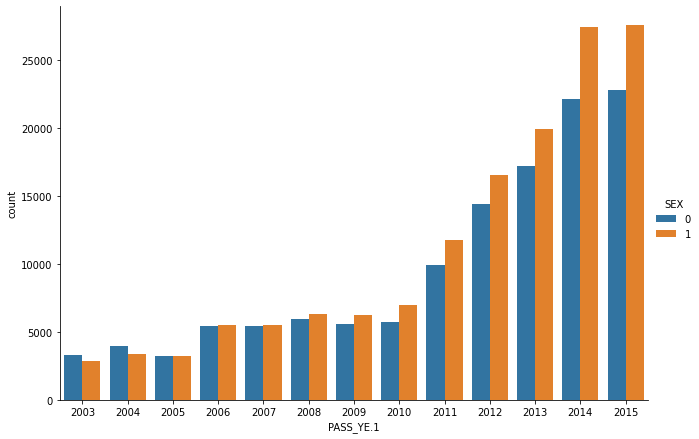

In [ ]:
g = sns.catplot(x="PASS_YE.1", hue="SEX",
                data=t_df, kind="count",
                height=6, aspect=1.5);

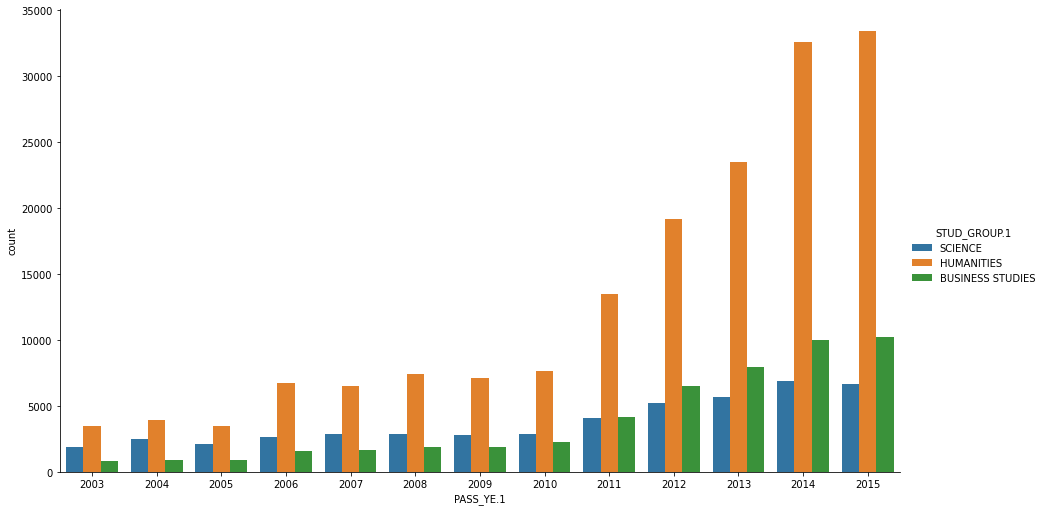

In [ ]:
g1 = sns.catplot(x="PASS_YE.1", hue="STUD_GROUP.1",
                data=t_df, kind="count",
                height=7, aspect=1.8);

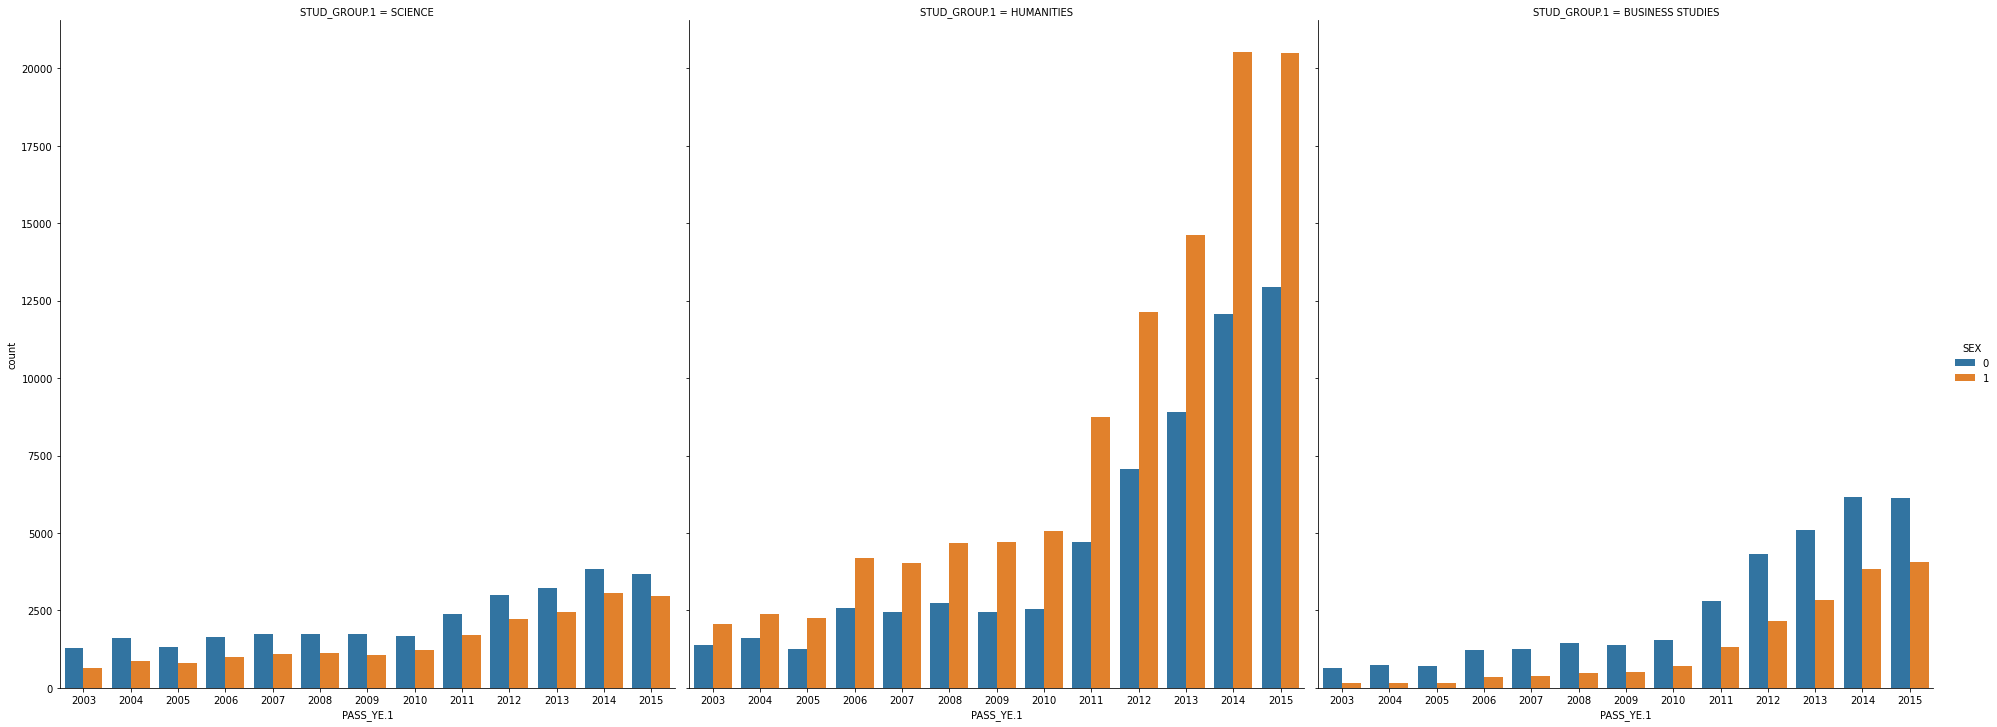

In [ ]:
g1 = sns.catplot(x="PASS_YE.1", hue="SEX",col="STUD_GROUP.1",
                data=t_df, kind="count",
                height=10, aspect=.9);

In [ ]:
train1 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC13.csv')
train1.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(37123, 23)

In [ ]:
train2 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC14.csv')
train2

,NAME,FATHER,MOTHER,SESSION,PASS_YE,GPA,RESULT,INST_,EXAM_,STUD_GROUP,STUD_TYPE,GRD_MARK,SEX,SESSION.1,PASS_YE.1,GPA.1,INST_.1,EXAM_.1,RESULT.1,STUD_GROUP.1,STUD_TYPE.1,LTRGRD,STUD_S
0,SABBIR AHMED,MD. ABDUL MOTALEB,SHAHIDA BEGUM,2010-11,2012,5.0000,P,1000,SSC,HUMANITIES,REGULAR,"101:A+,107:A+,109:A+,127:A ,111:A+,110:A+,139:...",0,2012-13,2014,5.0,1150,HSC,P,HUMANITIES,REGULAR,"101:A+,107:A+,109:A ,111:A+,125:A+,129:A+",0
1,SHAJIB MAHMUD ZAKIR,HAJI ABDUL KADIR MORAL,ZAKIA AKTER,2010-11,2012,5.0000,P,1000,SSC,HUMANITIES,REGULAR,"101:A+,107:A+,109:A+,127:A+,111:A+,110:A+,139:...",0,2012-13,2014,5.0,1150,HSC,P,HUMANITIES,REGULAR,"101:A+,107:A+,109:A+,111:A+,125:A+,129:A+",0
2,MAHMUDUL HASAN SADI,MD. ABDUL MANNAN,LIPI AKTAR,2010-11,2012,5.0000,P,1000,SSC,HUMANITIES,REGULAR,"101:A+,107:A ,109:B ,127:A+,111:A+,110:A+,139:...",0,2012-13,2014,5.0,1150,HSC,P,HUMANITIES,REGULAR,"101:A ,107:A+,109:A ,111:A ,125:A+,129:A+",0
3,MD. ZOBAIR BIN ZAHIR,MD. ZAHIRUL HAQUE,KAMRUNNAHAR,2010-11,2012,5.0000,P,1000,SSC,HUMANITIES,REGULAR,"101:A+,107:A ,109:A+,127:A+,111:A+,110:A+,139:...",0,2012-13,2014,5.0,1150,HSC,P,HUMANITIES,REGULAR,"101:A+,107:A+,109:A+,111:A+,125:A+,129:A+",0
4,ABRAR SHAHRIAR KHAN,SHAWKAT HAMID,SAEEDA AKHTER,2010-11,2012,5.0000,P,1000,SSC,HUMANITIES,REGULAR,"101:A ,107:A+,109:A+,127:A+,111:A+,110:A+,139:...",0,2012-13,2014,5.0,1150,HSC,P,HUMANITIES,REGULAR,"101:A+,107:A+,109:A ,111:A+,125:A+,129:A+",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49532,MD. HABIBUR RAHMAN,MD. ABDUL HANNAN,NaN,1998-99,2001,2.5000,GPA=2.50,1850,SSC,HUMANITIES,IRREGULAR,"101:C ,107:C ,109:A ,127:C ,111:B ,110:C ...",0,2014,2014,3.2,1000,HSC,P,HUMANITIES,PRIVATE,"101:B ,107:B ,111:A-,119:A-,209:B",0
49533,MD. AMINUL ISLAM,MD. ABDUS SHAHID,NaN,1999-00,2001,3.1300,GPA=3.13,2325,SSC,SCIENCE,REGULAR,"101:B ,107:C ,109:D ,145:B ,111:A ,136:A ...",0,2012-13,2014,3.3,2325,HSC,P,HUMANITIES,REGULAR,"101:B ,107:A-,109:C ,111:B ,242:B ,237:A",0
49534,ASMA BEGUM,MD. RAJAB ALI,NaN,1996-97,2001,3.0625,MARKS= 558(2nd Div.),2507,SSC,HUMANITIES,IRREGULAR,"101:B, 107:C, 109:C, 127:A-, 111:B, 110:B, 13...",1,2011-12,2014,1.9,1060,HSC,F1,HUMANITIES,IRREGULAR,"101:C ,107:F ,111:C ,117:C ,249:C ,131:A-",1
49535,GULA JANNAT,ABDUL KODDUS,NaN,1999-00,2001,3.0000,GPA=3.00,2516,SSC,HUMANITIES,REGULAR,"101:B ,107:D ,109:A ,127:C ,111:A ,110:B ...",1,2013,2014,2.9,1000,HSC,P,HUMANITIES,PRIVATE,"101:B ,107:D ,111:B ,209:A-,249:A",1


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/mapSSCHSC15.csv')
test.head()

,NAME,FATHER,MOTHER,SESSION,PASS_YE,GPA,RESULT,INST_,EXAM_,STUD_GROUP,STUD_TYPE,GRD_MARK,SEX,SESSION.1,PASS_YE.1,GPA.1,INST_.1,EXAM_.1,RESULT.1,STUD_GROUP.1,STUD_TYPE.1,LTRGRD,STUD_S
0,NADIA AKTER,SIDDIQUR RAHMAN,LAILA BEGUM,2011-12,2013,4.13,P,1001,SSC,HUMANITIES,REGULAR,"101:A ,107:A ,109:A-,127:A-,111:A+,110:A ,139:...",1,2013-14,2015,3.58,1050,HSC,P,HUMANITIES,REGULAR,"101:B ,107:C ,275:A ,109:B ,269:A ,271:A-,273:A",1
1,IMRAN AHMAD,MD. ANAM MIA,SELUFA BEGUM,2011-12,2013,3.88,P,1001,SSC,HUMANITIES,REGULAR,"101:A-,107:B ,109:A-,127:A-,111:A ,110:A ,139:...",0,2013-14,2015,1.40,1075,HSC,F1,HUMANITIES,REGULAR,"101:C ,107:D ,275:B ,109:D ,267:F ,271:C ,121:F",0
2,MOUMITA AKTER,MD. MOMIN MIA,MAHMUDA AKTER,2011-12,2013,3.88,P,1001,SSC,HUMANITIES,REGULAR,"101:A-,107:A ,109:B ,127:A ,111:A ,110:A-,139:...",1,2013-14,2015,2.33,2651,HSC,P,HUMANITIES,REGULAR,"101:B ,107:D ,275:C ,117:B ,269:B ,304:C ,121:F",1
3,RUMANA AKTER,LATE ABDUL KHALEK,ASIA KHATUN,2011-12,2013,4.00,P,1001,SSC,HUMANITIES,REGULAR,"101:A-,107:A ,109:A ,127:A-,111:A ,110:A-,139:...",1,2013-14,2015,2.70,1051,HSC,F1,BUSINESS STUDIES,REGULAR,"101:B ,107:D ,275:A-,253:F ,277:A-,286:A-,292:D",1
4,MEHERUN NESA ESHA,MD. MIZANUR RAHMAN,SHAHANA BEGUM,2011-12,2013,4.19,P,1001,SSC,HUMANITIES,REGULAR,"101:A-,107:A ,109:A-,127:A ,111:A ,110:A ,139:...",1,2013-14,2015,4.00,1050,HSC,P,HUMANITIES,REGULAR,"101:A-,107:B ,275:A+,109:A-,269:A ,271:A-,267:A-",1


In [ ]:
frame = [train1,train2]
train=pd.concat(frame)
train.shape

(86660, 23)

In [ ]:
tnd= train.loc[(train["GPA.1"]<1.0)]
tnd.shape



(2837, 23)

In [ ]:
tnd= train.loc[(train["GPA.1"]<1.0)].index

train.drop(tnd, inplace = True) 

In [ ]:
features_drop = ['NAME','FATHER','MOTHER','SESSION','PASS_YE','RESULT','EXAM_','STUD_TYPE','EXAM_.1','STUD_TYPE.1','PASS_YE.1','GRD_MARK','SESSION.1','RESULT.1','LTRGRD','STUD_S']
train = train.drop(features_drop, axis=1)

In [ ]:
train_data1 = [train] 
group_mapping = {"SCIENCE": 0, "HUMANITIES": 1, "BUSINESS STUDIES": 2}
for dataset in train_data1:
    dataset['STUD_GROUP'] = dataset['STUD_GROUP'].map(group_mapping)

In [ ]:
train_data2 = [train] 
group_mapping = {"SCIENCE": 0, "HUMANITIES": 1, "BUSINESS STUDIES": 2}
for dataset in train_data2:
    dataset['STUD_GROUP.1'] = dataset['STUD_GROUP.1'].map(group_mapping)

In [ ]:
train.shape

(81550, 7)

In [ ]:
train.isnull().sum()

GPA               0
INST_             0
STUD_GROUP        0
SEX               0
GPA.1           554
INST_.1           0
STUD_GROUP.1      0
dtype: int64

In [ ]:
train = train.dropna(axis = 0, how ='any') 

In [ ]:
train.shape

(80996, 7)

In [ ]:
test.shape

(50300, 23)

In [ ]:
tsd= test.loc[(test["GPA.1"]<1.0)].index

test.drop(tsd, inplace = True) 

In [ ]:
features_drop = ['NAME','FATHER','MOTHER','SESSION','PASS_YE','LTRGRD' ,'RESULT','EXAM_','STUD_TYPE','GRD_MARK','PASS_YE.1','SESSION.1','EXAM_.1','RESULT.1','STUD_TYPE.1','STUD_S']
test= test.drop(features_drop, axis=1)

In [ ]:
test.isnull().sum()

GPA               0
INST_             0
STUD_GROUP        0
SEX               0
GPA.1           328
INST_.1           0
STUD_GROUP.1      0
dtype: int64

In [ ]:
test_data1 = [test] 
group_mapping = {"SCIENCE": 0, "HUMANITIES": 1, "BUSINESS STUDIES": 2}
for dataset in test_data1:
    dataset['STUD_GROUP'] = dataset['STUD_GROUP'].map(group_mapping)

In [ ]:
test_data2 = [test] 
group_mapping = {"SCIENCE": 0, "HUMANITIES": 1, "BUSINESS STUDIES": 2}
for dataset in test_data2:
    dataset['STUD_GROUP.1'] = dataset['STUD_GROUP.1'].map(group_mapping)

In [ ]:
test = test.dropna(axis = 0, how ='any') 

In [ ]:
test.shape

(48939, 7)

In [ ]:
criteria = [train['GPA'].between(5.0,5.0), train['GPA'].between(4.5,5.0), train['GPA'].between(4.0,4.50), train['GPA'].between(3.5,4.0),train['GPA'].between(3.0,3.50),train['GPA'].between(2.5,3.0),train['GPA'].between(2.0,2.50),train['GPA'].between(1.5,2.0),train['GPA'].between(1.0,1.5)]
values = ['5.0','4.5-5.0', '4.0-4.5', '3.5-4.0', '3.0-3.5','2.5-3.0', '2.0-2.5','1.5-2.0','1.0-1.5']

train['SSC_GPA_CATEGORY'] = np.select(criteria, values)
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,GPA,INST_,STUD_GROUP,SEX,GPA.1,INST_.1,STUD_GROUP.1,SSC_GPA_CATEGORY
0,5.0,1000,0,0,5.0,1150,0,5.0
1,5.0,1000,0,0,5.0,1150,0,5.0
2,5.0,1000,0,0,5.0,1150,0,5.0
3,5.0,1000,0,0,5.0,1150,0,5.0
4,5.0,1000,0,0,5.0,1150,0,5.0


In [ ]:
criteria = [test['GPA'].between(5.0,5.0), test['GPA'].between(4.5,5.0), test['GPA'].between(4.0,4.50), test['GPA'].between(3.5,4.0),test['GPA'].between(3.0,3.50),test['GPA'].between(2.5,3.0),test['GPA'].between(2.0,2.50),test['GPA'].between(1.5,2.0),test['GPA'].between(1.0,1.5)]
values = ['5.0','4.5-5.0', '4.0-4.5', '3.5-4.0', '3.0-3.5','2.5-3.0', '2.0-2.5','1.5-2.0','1.0-1.5']

test['SSC_GPA_CATEGORY'] = np.select(criteria, values)
test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,GPA,INST_,STUD_GROUP,SEX,GPA.1,INST_.1,STUD_GROUP.1,SSC_GPA_CATEGORY
0,4.13,1001,1,1,3.58,1050,1,4.0-4.5
1,3.88,1001,1,0,1.40,1075,1,3.5-4.0
2,3.88,1001,1,1,2.33,2651,1,3.5-4.0
3,4.00,1001,1,1,2.70,1051,2,4.0-4.5
4,4.19,1001,1,1,4.00,1050,1,4.0-4.5


In [ ]:
test["SSC_GPA_CATEGORY"].value_counts()

3.0-3.5    12236
3.5-4.0    11572
2.5-3.0     7739
4.0-4.5     7713
4.5-5.0     3994
2.0-2.5     2689
5.0         2552
1.5-2.0      424
1.0-1.5       20
Name: SSC_GPA_CATEGORY, dtype: int64

In [ ]:
for i in range(1,25,9):
    print("train_category"+str(i+0)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='5.0')]","\n"+
 "train_category"+str(i+1)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')]","\n"+
"train_category"+str(i+2)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')]","\n"+
"train_category"+str(i+3)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')]","\n"+
"train_category"+str(i+4)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')]","\n"+
"train_category"+str(i+5)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')]","\n"+
"train_category"+str(i+6)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')]","\n"+ 
"train_category"+str(i+7)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')]","\n"+
"train_category"+str(i+8)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')]","\n")

train_category1  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category2  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category3  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category4  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category5  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category6  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category7  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category8  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category9  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SS

In [ ]:
for i in range(28,55,9):
    print("train_category"+str(i+0)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='5.0')]","\n"+
 "train_category"+str(i+1)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')]","\n"+
"train_category"+str(i+2)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')]","\n"+
"train_category"+str(i+3)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')]","\n"+
"train_category"+str(i+4)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')]","\n"+
"train_category"+str(i+5)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')]","\n"+
"train_category"+str(i+6)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')]","\n"+ 
"train_category"+str(i+7)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')]","\n"+
"train_category"+str(i+8)," = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')]","\n")

train_category28  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category29  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category30  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category31  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category32  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category33  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category34  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category35  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category36  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (

In [ ]:
train_category1  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category2  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category3  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category4  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category5  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category6  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category7  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category8  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category9  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')] 

train_category10  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category11  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category12  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category13  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category14  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category15  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category16  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category17  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category18  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')] 

train_category19  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category20  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category21  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category22  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category23  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category24  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category25  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category26  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category27  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==0)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')] 

train_category28  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category29  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category30  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category31  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category32  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category33  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category34  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category35  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category36  = train.loc[(train['STUD_GROUP']==0) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')] 

train_category37  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category38  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category39  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category40  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category41  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category42  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category43  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category44  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category45  = train.loc[(train['STUD_GROUP']==1) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')] 

train_category46  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='5.0')] 
train_category47  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.5-5.0')] 
train_category48  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='4.0-4.5')] 
train_category49  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.5-4.0')] 
train_category50  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='3.0-3.5')] 
train_category51  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.5-3.0')] 
train_category52  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='2.0-2.5')] 
train_category53  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.5-2.0')] 
train_category54  = train.loc[(train['STUD_GROUP']==2) &(train['SEX']==1)& (train['SSC_GPA_CATEGORY']=='1.0-1.5')] 
train_category54.shape

(0, 8)

In [ ]:
test_category1  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='5.0')] 
test_category2  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')] 
test_category3  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')] 
test_category4  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')] 
test_category5  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')] 
test_category6  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')] 
test_category7  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')] 
test_category8  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')] 
test_category9  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')] 

test_category10  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='5.0')] 
test_category11  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')] 
test_category12  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')] 
test_category13  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')] 
test_category14  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')] 
test_category15  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')] 
test_category16  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')] 
test_category17  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')] 
test_category18  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')] 

test_category19  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='5.0')] 
test_category20  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')] 
test_category21  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')] 
test_category22  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')] 
test_category23  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')] 
test_category24  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')] 
test_category25  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')] 
test_category26  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')] 
test_category27  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==0)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')] 

test_category28  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='5.0')] 
test_category29  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')] 
test_category30  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')] 
test_category31  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')] 
test_category32  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')] 
test_category33  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')] 
test_category34  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')] 
test_category35  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')] 
test_category36  = test.loc[(test['STUD_GROUP']==0) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')] 

test_category37  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='5.0')] 
test_category38  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')] 
test_category39  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')] 
test_category40  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')] 
test_category41  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')] 
test_category42  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')] 
test_category43  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')] 
test_category44  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')] 
test_category45  = test.loc[(test['STUD_GROUP']==1) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')] 

test_category46  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='5.0')] 
test_category47  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='4.5-5.0')] 
test_category48  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='4.0-4.5')] 
test_category49  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='3.5-4.0')] 
test_category50  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='3.0-3.5')] 
test_category51  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='2.5-3.0')] 
test_category52  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='2.0-2.5')] 
test_category53  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='1.5-2.0')] 
test_category54  = test.loc[(test['STUD_GROUP']==2) &(test['SEX']==1)& (test['SSC_GPA_CATEGORY']=='1.0-1.5')] 
test_category27.shape

(1, 8)

In [ ]:
for i in range(1,1):
  print("train_category"+str(i)+"['CATEGORY']="+str(i))
  
   

In [ ]:
for i in range(1,2):
    print("test_category"+str(i)+"['CATEGORY']="+str(i))

test_category1['CATEGORY']=1


In [ ]:
train_category1['CATEGORY']=1
train_category2['CATEGORY']=2
train_category3['CATEGORY']=3
train_category4['CATEGORY']=4
train_category5['CATEGORY']=5
train_category6['CATEGORY']=6
train_category7['CATEGORY']=7
train_category8['CATEGORY']=8
train_category9['CATEGORY']=9
train_category10['CATEGORY']=10
train_category11['CATEGORY']=11
train_category12['CATEGORY']=12
train_category13['CATEGORY']=13
train_category14['CATEGORY']=14
train_category15['CATEGORY']=15
train_category16['CATEGORY']=16
train_category17['CATEGORY']=17
train_category18['CATEGORY']=18
train_category19['CATEGORY']=19
train_category20['CATEGORY']=20
train_category21['CATEGORY']=21
train_category22['CATEGORY']=22
train_category23['CATEGORY']=23
train_category24['CATEGORY']=24
train_category25['CATEGORY']=25
train_category26['CATEGORY']=26
train_category27['CATEGORY']=27
train_category28['CATEGORY']=28
train_category29['CATEGORY']=29
train_category30['CATEGORY']=30
train_category31['CATEGORY']=31
train_category32['CATEGORY']=32
train_category33['CATEGORY']=33
train_category34['CATEGORY']=34
train_category35['CATEGORY']=35
train_category36['CATEGORY']=36
train_category37['CATEGORY']=37
train_category38['CATEGORY']=38
train_category39['CATEGORY']=39
train_category40['CATEGORY']=40
train_category41['CATEGORY']=41
train_category42['CATEGORY']=42
train_category43['CATEGORY']=43
train_category44['CATEGORY']=44
train_category45['CATEGORY']=45
train_category46['CATEGORY']=46
train_category47['CATEGORY']=47
train_category48['CATEGORY']=48
train_category49['CATEGORY']=49
train_category50['CATEGORY']=50
train_category51['CATEGORY']=51
train_category52['CATEGORY']=52
train_category53['CATEGORY']=53
train_category54['CATEGORY']=54

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
test_category1['CATEGORY']=1
test_category2['CATEGORY']=2
test_category3['CATEGORY']=3
test_category4['CATEGORY']=4
test_category5['CATEGORY']=5
test_category6['CATEGORY']=6
test_category7['CATEGORY']=7
test_category8['CATEGORY']=8
test_category9['CATEGORY']=9
test_category10['CATEGORY']=10
test_category11['CATEGORY']=11
test_category12['CATEGORY']=12
test_category13['CATEGORY']=13
test_category14['CATEGORY']=14
test_category15['CATEGORY']=15
test_category16['CATEGORY']=16
test_category17['CATEGORY']=17
test_category18['CATEGORY']=18
test_category19['CATEGORY']=19
test_category20['CATEGORY']=20
test_category21['CATEGORY']=21
test_category22['CATEGORY']=22
test_category23['CATEGORY']=23
test_category24['CATEGORY']=24
test_category25['CATEGORY']=25
test_category26['CATEGORY']=26
test_category27['CATEGORY']=27
test_category28['CATEGORY']=28
test_category29['CATEGORY']=29
test_category30['CATEGORY']=30
test_category31['CATEGORY']=31
test_category32['CATEGORY']=32
test_category33['CATEGORY']=33
test_category34['CATEGORY']=34
test_category35['CATEGORY']=35
test_category36['CATEGORY']=36
test_category37['CATEGORY']=37
test_category38['CATEGORY']=38
test_category39['CATEGORY']=39
test_category40['CATEGORY']=40
test_category41['CATEGORY']=41
test_category42['CATEGORY']=42
test_category43['CATEGORY']=43
test_category44['CATEGORY']=44
test_category45['CATEGORY']=45
test_category46['CATEGORY']=46
test_category47['CATEGORY']=47
test_category48['CATEGORY']=48
test_category49['CATEGORY']=49
test_category50['CATEGORY']=50
test_category51['CATEGORY']=51
test_category52['CATEGORY']=52
test_category53['CATEGORY']=53
test_category54['CATEGORY']=54

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
for i in range(43,55):
    print("test_category"+str(i)+",",end=" ")

test_category43, test_category44, test_category45, test_category46, test_category47, test_category48, test_category49, test_category50, test_category51, test_category52, test_category53, test_category54, 

In [ ]:
train.shape

(80996, 8)

In [ ]:
test.shape

(48939, 8)

In [ ]:
train_cate_frame =[train_category1, train_category2, train_category3, train_category4, train_category5, train_category6, train_category7, train_category8, train_category9, train_category10, train_category11, train_category12, train_category13, train_category14, train_category15, train_category16, train_category17, train_category18, train_category19, train_category20, train_category21, train_category22, train_category23, train_category24, train_category25, train_category26, train_category27, train_category28, train_category29, train_category30, train_category31, train_category32, train_category33, train_category34, train_category35, train_category36, train_category37, train_category38, train_category39, train_category40, train_category41, train_category42,train_category43, train_category44, train_category45, train_category46, train_category47, train_category48, train_category49, train_category50, train_category51, train_category52, train_category53, train_category54]
merge_cate_train =pd.concat(train_cate_frame)
merge_cate_train.shape

(80996, 9)

In [ ]:
test_cate_frame = [test_category1, test_category2, test_category3, test_category4, test_category5, test_category6, test_category7, test_category8, test_category9, test_category10, test_category11, test_category12, test_category13, test_category14, test_category15, test_category16, test_category17, test_category18, test_category19, test_category20, test_category21, test_category22, test_category23, test_category24, test_category25, test_category26, test_category27, test_category28, test_category29, test_category30, test_category31, test_category32, test_category33, test_category34, test_category35, test_category36, test_category37, test_category38, test_category39, test_category40, test_category41, test_category42,test_category43, test_category44, test_category45, test_category46, test_category47, test_category48, test_category49, test_category50, test_category51, test_category52, test_category53, test_category54]
merge_cate_test =pd.concat(test_cate_frame)
merge_cate_test.shape

(48939, 9)

In [ ]:
cat1 = merge_cate_train['CATEGORY'].value_counts()
cat1

41    9700
42    7685
40    7435
14    6774
13    5631
15    4526
39    3762
43    3438
12    2890
3     2281
2     2213
1     2136
30    1989
29    1899
16    1771
4     1538
28    1433
38    1378
31    1307
22    1173
21    1035
11     934
23     925
44     687
5      648
48     635
49     633
32     619
20     616
50     488
24     444
47     376
17     319
51     252
6      215
19     199
37     195
33     189
25     150
46     138
10     117
52      74
45      35
34      35
7       35
26      14
18      12
53      11
27       3
8        2
35       2
Name: CATEGORY, dtype: int64

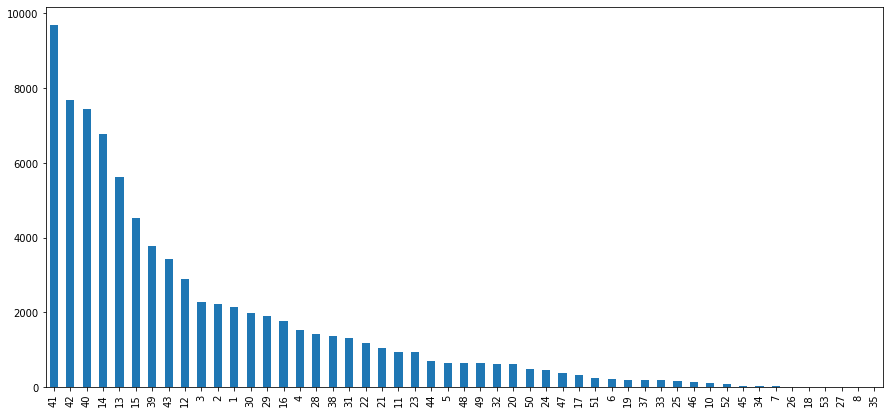

In [ ]:
cat1.plot(kind='bar',stacked=True, figsize=(15,7))

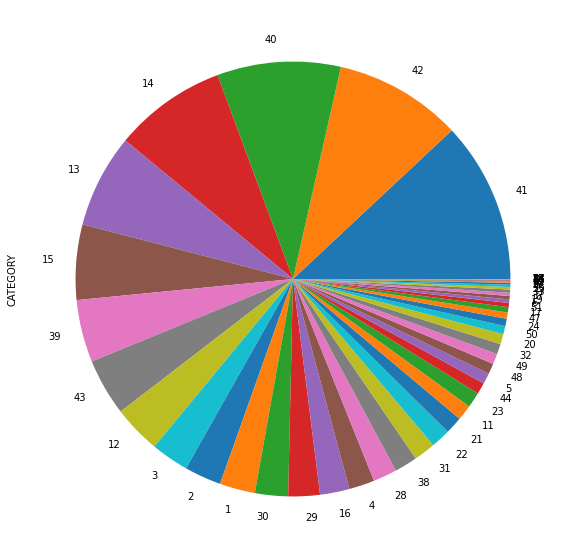

In [ ]:
cat1.plot(kind='pie', stacked=True, figsize=(15,10))

**Deviation**

In [ ]:
for number in range(1,1) :  
    print( 
        "train_count"+str(number),"=","train_category"+str(number)+"['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1')","\n"+
        "train_gpa"+str(number),"=" ,"train_category"+str(number)+".groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean()","\n"+
"train_gpa"+str(number), "=","train_gpa"+str(number)+".reset_index()","\n"+
"train_hsc"+str(number),"=","pd.merge(train_count"+str(number)+","+"train_gpa"+str(number)+")","\n"+
"train_hsc"+str(number),"=","train_hsc"+str(number)+".loc[(train_hsc"+str(number),"['Number of students in training year']>=40)]","\n"+
"train_hsc"+str(number)+"['Deviation of training year'] = train_hsc"+str(number),"['GPA.1'] - train_hsc"+str(number)+"['GPA']","\n"+
          
"train_hsc"+str(number),"=","pd.concat([train_hsc"+str(number)+"[train_hsc"+str(number),"['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False),","\n"+
                              "train_hsc"+str(number)+"[train_hsc"+str(number)+"['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)])","\n"+
"train_hsc"+str(number), "=","train_hsc"+str(number)+".reset_index()","\n"+
"features_drop"+str(number), "=","['GPA','GPA.1','index','Number of students in training year']","\n"+          
"train_hsc"+str(number), "=","train_hsc"+str(number)+".drop(features_drop"+str(number),",axis=1)","\n"+
"train_hsc"+str(number)+".head()","\n")        

In [ ]:
for number in range(1,1) :  
    print("test_count"+str(number),"=","test_category"+str(number)+"['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1')","\n"+
"test_gpa"+str(number),"=" ,"test_category"+str(number)+".groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean()","\n"+      
"test_gpa"+str(number), "=","test_gpa"+str(number)+".reset_index()","\n"+
          
"test_hsc"+str(number),"=","pd.merge(test_count"+str(number)+","+"test_gpa"+str(number)+")","\n"+
"test_hsc"+str(number),"=","test_hsc"+str(number)+".loc[(test_hsc"+str(number),"['Number of students in testing year']>=20)]","\n"+

"test_hsc"+str(number)+"['Deviation of testing year'] = test_hsc"+str(number)+"['GPA.1'] - test_hsc"+str(number)+"['GPA']","\n"+
          
"test_hsc"+str(number),"=","pd.concat([test_hsc"+str(number)+"[test_hsc"+str(number),"['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False),","\n"+
                              "test_hsc"+str(number)+"[test_hsc"+str(number)+"['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)])","\n"+
"test_hsc"+str(number), "=","test_hsc"+str(number)+".reset_index()","\n"+
"features_drop"+str(number), "=","['GPA','GPA.1','index','Number of students in testing year']","\n"+          
"test_hsc"+str(number), "=","test_hsc"+str(number)+".drop(features_drop"+str(number),",axis=1)","\n"+
"test_hsc"+str(number)+".head()","\n")


In [ ]:
train_count1 = train_category1['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa1 = train_category1.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa1 = train_gpa1.reset_index() 
train_hsc1 = pd.merge(train_count1,train_gpa1) 
train_hsc1 = train_hsc1.loc[(train_hsc1 ['Number of students in training year']>=40)] 
train_hsc1['Deviation of training year'] = train_hsc1 ['GPA.1'] - train_hsc1['GPA'] 
train_hsc1 = pd.concat([train_hsc1[train_hsc1 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc1[train_hsc1['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc1 = train_hsc1.reset_index() 
features_drop1 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc1 = train_hsc1.drop(features_drop1 ,axis=1) 
train_hsc1.head() 

train_count2 = train_category2['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa2 = train_category2.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa2 = train_gpa2.reset_index() 
train_hsc2 = pd.merge(train_count2,train_gpa2) 
train_hsc2 = train_hsc2.loc[(train_hsc2 ['Number of students in training year']>=40)] 
train_hsc2['Deviation of training year'] = train_hsc2 ['GPA.1'] - train_hsc2['GPA'] 
train_hsc2 = pd.concat([train_hsc2[train_hsc2 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc2[train_hsc2['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc2 = train_hsc2.reset_index() 
features_drop2 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc2 = train_hsc2.drop(features_drop2 ,axis=1) 
train_hsc2.head() 

train_count3 = train_category3['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa3 = train_category3.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa3 = train_gpa3.reset_index() 
train_hsc3 = pd.merge(train_count3,train_gpa3) 
train_hsc3 = train_hsc3.loc[(train_hsc3 ['Number of students in training year']>=40)] 
train_hsc3['Deviation of training year'] = train_hsc3 ['GPA.1'] - train_hsc3['GPA'] 
train_hsc3 = pd.concat([train_hsc3[train_hsc3 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc3[train_hsc3['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc3 = train_hsc3.reset_index() 
features_drop3 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc3 = train_hsc3.drop(features_drop3 ,axis=1) 
train_hsc3.head() 

train_count4 = train_category4['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa4 = train_category4.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa4 = train_gpa4.reset_index() 
train_hsc4 = pd.merge(train_count4,train_gpa4) 
train_hsc4 = train_hsc4.loc[(train_hsc4 ['Number of students in training year']>=40)] 
train_hsc4['Deviation of training year'] = train_hsc4 ['GPA.1'] - train_hsc4['GPA'] 
train_hsc4 = pd.concat([train_hsc4[train_hsc4 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc4[train_hsc4['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc4 = train_hsc4.reset_index() 
features_drop4 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc4 = train_hsc4.drop(features_drop4 ,axis=1) 
train_hsc4.head() 

train_count5 = train_category5['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa5 = train_category5.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa5 = train_gpa5.reset_index() 
train_hsc5 = pd.merge(train_count5,train_gpa5) 
train_hsc5 = train_hsc5.loc[(train_hsc5 ['Number of students in training year']>=40)] 
train_hsc5['Deviation of training year'] = train_hsc5 ['GPA.1'] - train_hsc5['GPA'] 
train_hsc5 = pd.concat([train_hsc5[train_hsc5 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc5[train_hsc5['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc5 = train_hsc5.reset_index() 
features_drop5 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc5 = train_hsc5.drop(features_drop5 ,axis=1) 
train_hsc5.head() 

train_count6 = train_category6['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa6 = train_category6.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa6 = train_gpa6.reset_index() 
train_hsc6 = pd.merge(train_count6,train_gpa6) 
train_hsc6 = train_hsc6.loc[(train_hsc6 ['Number of students in training year']>=40)] 
train_hsc6['Deviation of training year'] = train_hsc6 ['GPA.1'] - train_hsc6['GPA'] 
train_hsc6 = pd.concat([train_hsc6[train_hsc6 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc6[train_hsc6['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc6 = train_hsc6.reset_index() 
features_drop6 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc6 = train_hsc6.drop(features_drop6 ,axis=1) 
train_hsc6.head() 

train_count7 = train_category7['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa7 = train_category7.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa7 = train_gpa7.reset_index() 
train_hsc7 = pd.merge(train_count7,train_gpa7) 
train_hsc7 = train_hsc7.loc[(train_hsc7 ['Number of students in training year']>=40)] 
train_hsc7['Deviation of training year'] = train_hsc7 ['GPA.1'] - train_hsc7['GPA'] 
train_hsc7 = pd.concat([train_hsc7[train_hsc7 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc7[train_hsc7['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc7 = train_hsc7.reset_index() 
features_drop7 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc7 = train_hsc7.drop(features_drop7 ,axis=1) 
train_hsc7.head() 

train_count8 = train_category8['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa8 = train_category8.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa8 = train_gpa8.reset_index() 
train_hsc8 = pd.merge(train_count8,train_gpa8) 
train_hsc8 = train_hsc8.loc[(train_hsc8 ['Number of students in training year']>=40)] 
train_hsc8['Deviation of training year'] = train_hsc8 ['GPA.1'] - train_hsc8['GPA'] 
train_hsc8 = pd.concat([train_hsc8[train_hsc8 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc8[train_hsc8['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc8 = train_hsc8.reset_index() 
features_drop8 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc8 = train_hsc8.drop(features_drop8 ,axis=1) 
train_hsc8.head() 

train_count9 = train_category9['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa9 = train_category9.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa9 = train_gpa9.reset_index() 
train_hsc9 = pd.merge(train_count9,train_gpa9) 
train_hsc9 = train_hsc9.loc[(train_hsc9 ['Number of students in training year']>=40)] 
train_hsc9['Deviation of training year'] = train_hsc9 ['GPA.1'] - train_hsc9['GPA'] 
train_hsc9 = pd.concat([train_hsc9[train_hsc9 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc9[train_hsc9['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc9 = train_hsc9.reset_index() 
features_drop9 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc9 = train_hsc9.drop(features_drop9 ,axis=1) 
train_hsc9.head() 

train_count10 = train_category10['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa10 = train_category10.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa10 = train_gpa10.reset_index() 
train_hsc10 = pd.merge(train_count10,train_gpa10) 
train_hsc10 = train_hsc10.loc[(train_hsc10 ['Number of students in training year']>=40)] 
train_hsc10['Deviation of training year'] = train_hsc10 ['GPA.1'] - train_hsc10['GPA'] 
train_hsc10 = pd.concat([train_hsc10[train_hsc10 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc10[train_hsc10['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc10 = train_hsc10.reset_index() 
features_drop10 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc10 = train_hsc10.drop(features_drop10 ,axis=1) 
train_hsc10.head() 

train_count11 = train_category11['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa11 = train_category11.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa11 = train_gpa11.reset_index() 
train_hsc11 = pd.merge(train_count11,train_gpa11) 
train_hsc11 = train_hsc11.loc[(train_hsc11 ['Number of students in training year']>=40)] 
train_hsc11['Deviation of training year'] = train_hsc11 ['GPA.1'] - train_hsc11['GPA'] 
train_hsc11 = pd.concat([train_hsc11[train_hsc11 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc11[train_hsc11['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc11 = train_hsc11.reset_index() 
features_drop11 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc11 = train_hsc11.drop(features_drop11 ,axis=1) 
train_hsc11.head() 

train_count12 = train_category12['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa12 = train_category12.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa12 = train_gpa12.reset_index() 
train_hsc12 = pd.merge(train_count12,train_gpa12) 
train_hsc12 = train_hsc12.loc[(train_hsc12 ['Number of students in training year']>=40)] 
train_hsc12['Deviation of training year'] = train_hsc12 ['GPA.1'] - train_hsc12['GPA'] 
train_hsc12 = pd.concat([train_hsc12[train_hsc12 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc12[train_hsc12['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc12 = train_hsc12.reset_index() 
features_drop12 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc12 = train_hsc12.drop(features_drop12 ,axis=1) 
train_hsc12.head() 

train_count13 = train_category13['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa13 = train_category13.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa13 = train_gpa13.reset_index() 
train_hsc13 = pd.merge(train_count13,train_gpa13) 
train_hsc13 = train_hsc13.loc[(train_hsc13 ['Number of students in training year']>=40)] 
train_hsc13['Deviation of training year'] = train_hsc13 ['GPA.1'] - train_hsc13['GPA'] 
train_hsc13 = pd.concat([train_hsc13[train_hsc13 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc13[train_hsc13['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc13 = train_hsc13.reset_index() 
features_drop13 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc13 = train_hsc13.drop(features_drop13 ,axis=1) 
train_hsc13.head() 

train_count14 = train_category14['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa14 = train_category14.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa14 = train_gpa14.reset_index() 
train_hsc14 = pd.merge(train_count14,train_gpa14) 
train_hsc14 = train_hsc14.loc[(train_hsc14 ['Number of students in training year']>=40)] 
train_hsc14['Deviation of training year'] = train_hsc14 ['GPA.1'] - train_hsc14['GPA'] 
train_hsc14 = pd.concat([train_hsc14[train_hsc14 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc14[train_hsc14['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc14 = train_hsc14.reset_index() 
features_drop14 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc14 = train_hsc14.drop(features_drop14 ,axis=1) 
train_hsc14.head() 

train_count15 = train_category15['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa15 = train_category15.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa15 = train_gpa15.reset_index() 
train_hsc15 = pd.merge(train_count15,train_gpa15) 
train_hsc15 = train_hsc15.loc[(train_hsc15 ['Number of students in training year']>=40)] 
train_hsc15['Deviation of training year'] = train_hsc15 ['GPA.1'] - train_hsc15['GPA'] 
train_hsc15 = pd.concat([train_hsc15[train_hsc15 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc15[train_hsc15['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc15 = train_hsc15.reset_index() 
features_drop15 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc15 = train_hsc15.drop(features_drop15 ,axis=1) 
train_hsc15.head() 

train_count16 = train_category16['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa16 = train_category16.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa16 = train_gpa16.reset_index() 
train_hsc16 = pd.merge(train_count16,train_gpa16) 
train_hsc16 = train_hsc16.loc[(train_hsc16 ['Number of students in training year']>=40)] 
train_hsc16['Deviation of training year'] = train_hsc16 ['GPA.1'] - train_hsc16['GPA'] 
train_hsc16 = pd.concat([train_hsc16[train_hsc16 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc16[train_hsc16['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc16 = train_hsc16.reset_index() 
features_drop16 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc16 = train_hsc16.drop(features_drop16 ,axis=1) 
train_hsc16.head() 

train_count17 = train_category17['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa17 = train_category17.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa17 = train_gpa17.reset_index() 
train_hsc17 = pd.merge(train_count17,train_gpa17) 
train_hsc17 = train_hsc17.loc[(train_hsc17 ['Number of students in training year']>=40)] 
train_hsc17['Deviation of training year'] = train_hsc17 ['GPA.1'] - train_hsc17['GPA'] 
train_hsc17 = pd.concat([train_hsc17[train_hsc17 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc17[train_hsc17['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc17 = train_hsc17.reset_index() 
features_drop17 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc17 = train_hsc17.drop(features_drop17 ,axis=1) 
train_hsc17.head() 

train_count18 = train_category18['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa18 = train_category18.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa18 = train_gpa18.reset_index() 
train_hsc18 = pd.merge(train_count18,train_gpa18) 
train_hsc18 = train_hsc18.loc[(train_hsc18 ['Number of students in training year']>=40)] 
train_hsc18['Deviation of training year'] = train_hsc18 ['GPA.1'] - train_hsc18['GPA'] 
train_hsc18 = pd.concat([train_hsc18[train_hsc18 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc18[train_hsc18['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc18 = train_hsc18.reset_index() 
features_drop18 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc18 = train_hsc18.drop(features_drop18 ,axis=1) 
train_hsc18.head() 

train_count19 = train_category19['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa19 = train_category19.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa19 = train_gpa19.reset_index() 
train_hsc19 = pd.merge(train_count19,train_gpa19) 
train_hsc19 = train_hsc19.loc[(train_hsc19 ['Number of students in training year']>=40)] 
train_hsc19['Deviation of training year'] = train_hsc19 ['GPA.1'] - train_hsc19['GPA'] 
train_hsc19 = pd.concat([train_hsc19[train_hsc19 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc19[train_hsc19['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc19 = train_hsc19.reset_index() 
features_drop19 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc19 = train_hsc19.drop(features_drop19 ,axis=1) 
train_hsc19.head() 

train_count20 = train_category20['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa20 = train_category20.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa20 = train_gpa20.reset_index() 
train_hsc20 = pd.merge(train_count20,train_gpa20) 
train_hsc20 = train_hsc20.loc[(train_hsc20 ['Number of students in training year']>=40)] 
train_hsc20['Deviation of training year'] = train_hsc20 ['GPA.1'] - train_hsc20['GPA'] 
train_hsc20 = pd.concat([train_hsc20[train_hsc20 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc20[train_hsc20['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc20 = train_hsc20.reset_index() 
features_drop20 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc20 = train_hsc20.drop(features_drop20 ,axis=1) 
train_hsc20.head() 

train_count21 = train_category21['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa21 = train_category21.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa21 = train_gpa21.reset_index() 
train_hsc21 = pd.merge(train_count21,train_gpa21) 
train_hsc21 = train_hsc21.loc[(train_hsc21 ['Number of students in training year']>=40)] 
train_hsc21['Deviation of training year'] = train_hsc21 ['GPA.1'] - train_hsc21['GPA'] 
train_hsc21 = pd.concat([train_hsc21[train_hsc21 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc21[train_hsc21['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc21 = train_hsc21.reset_index() 
features_drop21 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc21 = train_hsc21.drop(features_drop21 ,axis=1) 
train_hsc21.head() 

train_count22 = train_category22['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa22 = train_category22.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa22 = train_gpa22.reset_index() 
train_hsc22 = pd.merge(train_count22,train_gpa22) 
train_hsc22 = train_hsc22.loc[(train_hsc22 ['Number of students in training year']>=40)] 
train_hsc22['Deviation of training year'] = train_hsc22 ['GPA.1'] - train_hsc22['GPA'] 
train_hsc22 = pd.concat([train_hsc22[train_hsc22 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc22[train_hsc22['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc22 = train_hsc22.reset_index() 
features_drop22 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc22 = train_hsc22.drop(features_drop22 ,axis=1) 
train_hsc22.head() 

train_count23 = train_category23['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa23 = train_category23.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa23 = train_gpa23.reset_index() 
train_hsc23 = pd.merge(train_count23,train_gpa23) 
train_hsc23 = train_hsc23.loc[(train_hsc23 ['Number of students in training year']>=40)] 
train_hsc23['Deviation of training year'] = train_hsc23 ['GPA.1'] - train_hsc23['GPA'] 
train_hsc23 = pd.concat([train_hsc23[train_hsc23 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc23[train_hsc23['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc23 = train_hsc23.reset_index() 
features_drop23 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc23 = train_hsc23.drop(features_drop23 ,axis=1) 
train_hsc23.head() 

train_count24 = train_category24['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa24 = train_category24.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa24 = train_gpa24.reset_index() 
train_hsc24 = pd.merge(train_count24,train_gpa24) 
train_hsc24 = train_hsc24.loc[(train_hsc24 ['Number of students in training year']>=40)] 
train_hsc24['Deviation of training year'] = train_hsc24 ['GPA.1'] - train_hsc24['GPA'] 
train_hsc24 = pd.concat([train_hsc24[train_hsc24 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc24[train_hsc24['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc24 = train_hsc24.reset_index() 
features_drop24 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc24 = train_hsc24.drop(features_drop24 ,axis=1) 
train_hsc24.head() 

train_count25 = train_category25['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa25 = train_category25.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa25 = train_gpa25.reset_index() 
train_hsc25 = pd.merge(train_count25,train_gpa25) 
train_hsc25 = train_hsc25.loc[(train_hsc25 ['Number of students in training year']>=40)] 
train_hsc25['Deviation of training year'] = train_hsc25 ['GPA.1'] - train_hsc25['GPA'] 
train_hsc25 = pd.concat([train_hsc25[train_hsc25 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc25[train_hsc25['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc25 = train_hsc25.reset_index() 
features_drop25 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc25 = train_hsc25.drop(features_drop25 ,axis=1) 
train_hsc25.head() 

train_count26 = train_category26['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa26 = train_category26.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa26 = train_gpa26.reset_index() 
train_hsc26 = pd.merge(train_count26,train_gpa26) 
train_hsc26 = train_hsc26.loc[(train_hsc26 ['Number of students in training year']>=40)] 
train_hsc26['Deviation of training year'] = train_hsc26 ['GPA.1'] - train_hsc26['GPA'] 
train_hsc26 = pd.concat([train_hsc26[train_hsc26 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc26[train_hsc26['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc26 = train_hsc26.reset_index() 
features_drop26 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc26 = train_hsc26.drop(features_drop26 ,axis=1) 
train_hsc26.head() 

train_count27 = train_category27['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa27 = train_category27.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa27 = train_gpa27.reset_index() 
train_hsc27 = pd.merge(train_count27,train_gpa27) 
train_hsc27 = train_hsc27.loc[(train_hsc27 ['Number of students in training year']>=40)] 
train_hsc27['Deviation of training year'] = train_hsc27 ['GPA.1'] - train_hsc27['GPA'] 
train_hsc27 = pd.concat([train_hsc27[train_hsc27 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc27[train_hsc27['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc27 = train_hsc27.reset_index() 
features_drop27 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc27 = train_hsc27.drop(features_drop27 ,axis=1) 
train_hsc27.head() 

train_count28 = train_category28['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa28 = train_category28.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa28 = train_gpa28.reset_index() 
train_hsc28 = pd.merge(train_count28,train_gpa28) 
train_hsc28 = train_hsc28.loc[(train_hsc28 ['Number of students in training year']>=40)] 
train_hsc28['Deviation of training year'] = train_hsc28 ['GPA.1'] - train_hsc28['GPA'] 
train_hsc28 = pd.concat([train_hsc28[train_hsc28 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc28[train_hsc28['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc28 = train_hsc28.reset_index() 
features_drop28 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc28 = train_hsc28.drop(features_drop28 ,axis=1) 
train_hsc28.head() 

train_count29 = train_category29['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa29 = train_category29.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa29 = train_gpa29.reset_index() 
train_hsc29 = pd.merge(train_count29,train_gpa29) 
train_hsc29 = train_hsc29.loc[(train_hsc29 ['Number of students in training year']>=40)] 
train_hsc29['Deviation of training year'] = train_hsc29 ['GPA.1'] - train_hsc29['GPA'] 
train_hsc29 = pd.concat([train_hsc29[train_hsc29 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc29[train_hsc29['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc29 = train_hsc29.reset_index() 
features_drop29 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc29 = train_hsc29.drop(features_drop29 ,axis=1) 
train_hsc29.head() 

train_count30 = train_category30['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa30 = train_category30.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa30 = train_gpa30.reset_index() 
train_hsc30 = pd.merge(train_count30,train_gpa30) 
train_hsc30 = train_hsc30.loc[(train_hsc30 ['Number of students in training year']>=40)] 
train_hsc30['Deviation of training year'] = train_hsc30 ['GPA.1'] - train_hsc30['GPA'] 
train_hsc30 = pd.concat([train_hsc30[train_hsc30 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc30[train_hsc30['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc30 = train_hsc30.reset_index() 
features_drop30 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc30 = train_hsc30.drop(features_drop30 ,axis=1) 
train_hsc30.head() 

train_count31 = train_category31['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa31 = train_category31.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa31 = train_gpa31.reset_index() 
train_hsc31 = pd.merge(train_count31,train_gpa31) 
train_hsc31 = train_hsc31.loc[(train_hsc31 ['Number of students in training year']>=40)] 
train_hsc31['Deviation of training year'] = train_hsc31 ['GPA.1'] - train_hsc31['GPA'] 
train_hsc31 = pd.concat([train_hsc31[train_hsc31 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc31[train_hsc31['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc31 = train_hsc31.reset_index() 
features_drop31 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc31 = train_hsc31.drop(features_drop31 ,axis=1) 
train_hsc31.head() 

train_count32 = train_category32['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa32 = train_category32.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa32 = train_gpa32.reset_index() 
train_hsc32 = pd.merge(train_count32,train_gpa32) 
train_hsc32 = train_hsc32.loc[(train_hsc32 ['Number of students in training year']>=40)] 
train_hsc32['Deviation of training year'] = train_hsc32 ['GPA.1'] - train_hsc32['GPA'] 
train_hsc32 = pd.concat([train_hsc32[train_hsc32 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc32[train_hsc32['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc32 = train_hsc32.reset_index() 
features_drop32 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc32 = train_hsc32.drop(features_drop32 ,axis=1) 
train_hsc32.head() 

train_count33 = train_category33['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa33 = train_category33.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa33 = train_gpa33.reset_index() 
train_hsc33 = pd.merge(train_count33,train_gpa33) 
train_hsc33 = train_hsc33.loc[(train_hsc33 ['Number of students in training year']>=40)] 
train_hsc33['Deviation of training year'] = train_hsc33 ['GPA.1'] - train_hsc33['GPA'] 
train_hsc33 = pd.concat([train_hsc33[train_hsc33 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc33[train_hsc33['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc33 = train_hsc33.reset_index() 
features_drop33 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc33 = train_hsc33.drop(features_drop33 ,axis=1) 
train_hsc33.head() 

train_count34 = train_category34['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa34 = train_category34.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa34 = train_gpa34.reset_index() 
train_hsc34 = pd.merge(train_count34,train_gpa34) 
train_hsc34 = train_hsc34.loc[(train_hsc34 ['Number of students in training year']>=40)] 
train_hsc34['Deviation of training year'] = train_hsc34 ['GPA.1'] - train_hsc34['GPA'] 
train_hsc34 = pd.concat([train_hsc34[train_hsc34 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc34[train_hsc34['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc34 = train_hsc34.reset_index() 
features_drop34 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc34 = train_hsc34.drop(features_drop34 ,axis=1) 
train_hsc34.head() 

train_count35 = train_category35['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa35 = train_category35.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa35 = train_gpa35.reset_index() 
train_hsc35 = pd.merge(train_count35,train_gpa35) 
train_hsc35 = train_hsc35.loc[(train_hsc35 ['Number of students in training year']>=40)] 
train_hsc35['Deviation of training year'] = train_hsc35 ['GPA.1'] - train_hsc35['GPA'] 
train_hsc35 = pd.concat([train_hsc35[train_hsc35 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc35[train_hsc35['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc35 = train_hsc35.reset_index() 
features_drop35 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc35 = train_hsc35.drop(features_drop35 ,axis=1) 
train_hsc35.head() 

train_count36 = train_category36['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa36 = train_category36.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa36 = train_gpa36.reset_index() 
train_hsc36 = pd.merge(train_count36,train_gpa36) 
train_hsc36 = train_hsc36.loc[(train_hsc36 ['Number of students in training year']>=40)] 
train_hsc36['Deviation of training year'] = train_hsc36 ['GPA.1'] - train_hsc36['GPA'] 
train_hsc36 = pd.concat([train_hsc36[train_hsc36 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc36[train_hsc36['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc36 = train_hsc36.reset_index() 
features_drop36 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc36 = train_hsc36.drop(features_drop36 ,axis=1) 
train_hsc36.head() 

train_count37 = train_category37['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa37 = train_category37.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa37 = train_gpa37.reset_index() 
train_hsc37 = pd.merge(train_count37,train_gpa37) 
train_hsc37 = train_hsc37.loc[(train_hsc37 ['Number of students in training year']>=40)] 
train_hsc37['Deviation of training year'] = train_hsc37 ['GPA.1'] - train_hsc37['GPA'] 
train_hsc37 = pd.concat([train_hsc37[train_hsc37 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc37[train_hsc37['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc37 = train_hsc37.reset_index() 
features_drop37 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc37 = train_hsc37.drop(features_drop37 ,axis=1) 
train_hsc37.head() 

train_count38 = train_category38['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa38 = train_category38.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa38 = train_gpa38.reset_index() 
train_hsc38 = pd.merge(train_count38,train_gpa38) 
train_hsc38 = train_hsc38.loc[(train_hsc38 ['Number of students in training year']>=40)] 
train_hsc38['Deviation of training year'] = train_hsc38 ['GPA.1'] - train_hsc38['GPA'] 
train_hsc38 = pd.concat([train_hsc38[train_hsc38 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc38[train_hsc38['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc38 = train_hsc38.reset_index() 
features_drop38 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc38 = train_hsc38.drop(features_drop38 ,axis=1) 
train_hsc38.head() 

train_count39 = train_category39['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa39 = train_category39.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa39 = train_gpa39.reset_index() 
train_hsc39 = pd.merge(train_count39,train_gpa39) 
train_hsc39 = train_hsc39.loc[(train_hsc39 ['Number of students in training year']>=40)] 
train_hsc39['Deviation of training year'] = train_hsc39 ['GPA.1'] - train_hsc39['GPA'] 
train_hsc39 = pd.concat([train_hsc39[train_hsc39 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc39[train_hsc39['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc39 = train_hsc39.reset_index() 
features_drop39 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc39 = train_hsc39.drop(features_drop39 ,axis=1) 
train_hsc39.head() 

train_count40 = train_category40['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa40 = train_category40.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa40 = train_gpa40.reset_index() 
train_hsc40 = pd.merge(train_count40,train_gpa40) 
train_hsc40 = train_hsc40.loc[(train_hsc40 ['Number of students in training year']>=40)] 
train_hsc40['Deviation of training year'] = train_hsc40 ['GPA.1'] - train_hsc40['GPA'] 
train_hsc40 = pd.concat([train_hsc40[train_hsc40 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc40[train_hsc40['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc40 = train_hsc40.reset_index() 
features_drop40 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc40 = train_hsc40.drop(features_drop40 ,axis=1) 
train_hsc40.head() 

train_count41 = train_category41['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa41 = train_category41.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa41 = train_gpa41.reset_index() 
train_hsc41 = pd.merge(train_count41,train_gpa41) 
train_hsc41 = train_hsc41.loc[(train_hsc41 ['Number of students in training year']>=40)] 
train_hsc41['Deviation of training year'] = train_hsc41 ['GPA.1'] - train_hsc41['GPA'] 
train_hsc41 = pd.concat([train_hsc41[train_hsc41 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc41[train_hsc41['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc41 = train_hsc41.reset_index() 
features_drop41 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc41 = train_hsc41.drop(features_drop41 ,axis=1) 
train_hsc41.head() 

train_count42 = train_category42['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa42 = train_category42.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa42 = train_gpa42.reset_index() 
train_hsc42 = pd.merge(train_count42,train_gpa42) 
train_hsc42 = train_hsc42.loc[(train_hsc42 ['Number of students in training year']>=40)] 
train_hsc42['Deviation of training year'] = train_hsc42 ['GPA.1'] - train_hsc42['GPA'] 
train_hsc42 = pd.concat([train_hsc42[train_hsc42 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc42[train_hsc42['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc42 = train_hsc42.reset_index() 
features_drop42 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc42 = train_hsc42.drop(features_drop42 ,axis=1) 
train_hsc42.head() 

train_count43 = train_category43['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa43 = train_category43.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa43 = train_gpa43.reset_index() 
train_hsc43 = pd.merge(train_count43,train_gpa43) 
train_hsc43 = train_hsc43.loc[(train_hsc43 ['Number of students in training year']>=40)] 
train_hsc43['Deviation of training year'] = train_hsc43 ['GPA.1'] - train_hsc43['GPA'] 
train_hsc43 = pd.concat([train_hsc43[train_hsc43 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc43[train_hsc43['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc43 = train_hsc43.reset_index() 
features_drop43 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc43 = train_hsc43.drop(features_drop43 ,axis=1) 
train_hsc43.head() 

train_count44 = train_category44['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa44 = train_category44.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa44 = train_gpa44.reset_index() 
train_hsc44 = pd.merge(train_count44,train_gpa44) 
train_hsc44 = train_hsc44.loc[(train_hsc44 ['Number of students in training year']>=40)] 
train_hsc44['Deviation of training year'] = train_hsc44 ['GPA.1'] - train_hsc44['GPA'] 
train_hsc44 = pd.concat([train_hsc44[train_hsc44 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc44[train_hsc44['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc44 = train_hsc44.reset_index() 
features_drop44 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc44 = train_hsc44.drop(features_drop44 ,axis=1) 
train_hsc44.head() 

train_count45 = train_category45['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa45 = train_category45.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa45 = train_gpa45.reset_index() 
train_hsc45 = pd.merge(train_count45,train_gpa45) 
train_hsc45 = train_hsc45.loc[(train_hsc45 ['Number of students in training year']>=40)] 
train_hsc45['Deviation of training year'] = train_hsc45 ['GPA.1'] - train_hsc45['GPA'] 
train_hsc45 = pd.concat([train_hsc45[train_hsc45 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc45[train_hsc45['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc45 = train_hsc45.reset_index() 
features_drop45 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc45 = train_hsc45.drop(features_drop45 ,axis=1) 
train_hsc45.head() 

train_count46 = train_category46['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa46 = train_category46.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa46 = train_gpa46.reset_index() 
train_hsc46 = pd.merge(train_count46,train_gpa46) 
train_hsc46 = train_hsc46.loc[(train_hsc46 ['Number of students in training year']>=40)] 
train_hsc46['Deviation of training year'] = train_hsc46 ['GPA.1'] - train_hsc46['GPA'] 
train_hsc46 = pd.concat([train_hsc46[train_hsc46 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc46[train_hsc46['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc46 = train_hsc46.reset_index() 
features_drop46 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc46 = train_hsc46.drop(features_drop46 ,axis=1) 
train_hsc46.head() 

train_count47 = train_category47['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa47 = train_category47.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa47 = train_gpa47.reset_index() 
train_hsc47 = pd.merge(train_count47,train_gpa47) 
train_hsc47 = train_hsc47.loc[(train_hsc47 ['Number of students in training year']>=40)] 
train_hsc47['Deviation of training year'] = train_hsc47 ['GPA.1'] - train_hsc47['GPA'] 
train_hsc47 = pd.concat([train_hsc47[train_hsc47 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc47[train_hsc47['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc47 = train_hsc47.reset_index() 
features_drop47 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc47 = train_hsc47.drop(features_drop47 ,axis=1) 
train_hsc47.head() 

train_count48 = train_category48['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa48 = train_category48.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa48 = train_gpa48.reset_index() 
train_hsc48 = pd.merge(train_count48,train_gpa48) 
train_hsc48 = train_hsc48.loc[(train_hsc48 ['Number of students in training year']>=40)] 
train_hsc48['Deviation of training year'] = train_hsc48 ['GPA.1'] - train_hsc48['GPA'] 
train_hsc48 = pd.concat([train_hsc48[train_hsc48 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc48[train_hsc48['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc48 = train_hsc48.reset_index() 
features_drop48 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc48 = train_hsc48.drop(features_drop48 ,axis=1) 
train_hsc48.head() 

train_count49 = train_category49['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa49 = train_category49.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa49 = train_gpa49.reset_index() 
train_hsc49 = pd.merge(train_count49,train_gpa49) 
train_hsc49 = train_hsc49.loc[(train_hsc49 ['Number of students in training year']>=40)] 
train_hsc49['Deviation of training year'] = train_hsc49 ['GPA.1'] - train_hsc49['GPA'] 
train_hsc49 = pd.concat([train_hsc49[train_hsc49 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc49[train_hsc49['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc49 = train_hsc49.reset_index() 
features_drop49 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc49 = train_hsc49.drop(features_drop49 ,axis=1) 
train_hsc49.head() 

train_count50 = train_category50['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa50 = train_category50.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa50 = train_gpa50.reset_index() 
train_hsc50 = pd.merge(train_count50,train_gpa50) 
train_hsc50 = train_hsc50.loc[(train_hsc50 ['Number of students in training year']>=40)] 
train_hsc50['Deviation of training year'] = train_hsc50 ['GPA.1'] - train_hsc50['GPA'] 
train_hsc50 = pd.concat([train_hsc50[train_hsc50 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc50[train_hsc50['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc50 = train_hsc50.reset_index() 
features_drop50 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc50 = train_hsc50.drop(features_drop50 ,axis=1) 
train_hsc50.head() 

train_count51 = train_category51['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa51 = train_category51.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa51 = train_gpa51.reset_index() 
train_hsc51 = pd.merge(train_count51,train_gpa51) 
train_hsc51 = train_hsc51.loc[(train_hsc51 ['Number of students in training year']>=40)] 
train_hsc51['Deviation of training year'] = train_hsc51 ['GPA.1'] - train_hsc51['GPA'] 
train_hsc51 = pd.concat([train_hsc51[train_hsc51 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc51[train_hsc51['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc51 = train_hsc51.reset_index() 
features_drop51 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc51 = train_hsc51.drop(features_drop51 ,axis=1) 
train_hsc51.head() 

train_count52 = train_category52['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa52 = train_category52.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa52 = train_gpa52.reset_index() 
train_hsc52 = pd.merge(train_count52,train_gpa52) 
train_hsc52 = train_hsc52.loc[(train_hsc52 ['Number of students in training year']>=40)] 
train_hsc52['Deviation of training year'] = train_hsc52 ['GPA.1'] - train_hsc52['GPA'] 
train_hsc52 = pd.concat([train_hsc52[train_hsc52 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc52[train_hsc52['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc52 = train_hsc52.reset_index() 
features_drop52 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc52 = train_hsc52.drop(features_drop52 ,axis=1) 
train_hsc52.head() 

train_count53 = train_category53['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa53 = train_category53.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa53 = train_gpa53.reset_index() 
train_hsc53 = pd.merge(train_count53,train_gpa53) 
train_hsc53 = train_hsc53.loc[(train_hsc53 ['Number of students in training year']>=40)] 
train_hsc53['Deviation of training year'] = train_hsc53 ['GPA.1'] - train_hsc53['GPA'] 
train_hsc53 = pd.concat([train_hsc53[train_hsc53 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc53[train_hsc53['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc53 = train_hsc53.reset_index() 
features_drop53 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc53 = train_hsc53.drop(features_drop53 ,axis=1) 
train_hsc53.head() 

train_count54 = train_category54['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in training year').sort_values(by='INST_.1') 
train_gpa54 = train_category54.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
train_gpa54 = train_gpa54.reset_index() 
train_hsc54 = pd.merge(train_count54,train_gpa54) 
train_hsc54 = train_hsc54.loc[(train_hsc54 ['Number of students in training year']>=40)] 
train_hsc54['Deviation of training year'] = train_hsc54 ['GPA.1'] - train_hsc54['GPA'] 
train_hsc54 = pd.concat([train_hsc54[train_hsc54 ['Deviation of training year']>0].sort_values('Deviation of training year',ascending=False), 
train_hsc54[train_hsc54['Deviation of training year']< 0].sort_values('Deviation of training year',ascending=False)]) 
train_hsc54 = train_hsc54.reset_index() 
features_drop54 = ['GPA','GPA.1','index','Number of students in training year'] 
train_hsc54 = train_hsc54.drop(features_drop54 ,axis=1) 
train_hsc54.head() 


,INST_.1,STUD_GROUP,SEX,CATEGORY,Deviation of training year


In [ ]:
test_count1 = test_category1['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa1 = test_category1.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa1 = test_gpa1.reset_index() 
test_hsc1 = pd.merge(test_count1,test_gpa1) 
test_hsc1 = test_hsc1.loc[(test_hsc1 ['Number of students in testing year']>=20)] 
test_hsc1['Deviation of testing year'] = test_hsc1['GPA.1'] - test_hsc1['GPA'] 
test_hsc1 = pd.concat([test_hsc1[test_hsc1 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc1[test_hsc1['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc1 = test_hsc1.reset_index() 
features_drop1 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc1 = test_hsc1.drop(features_drop1 ,axis=1) 
test_hsc1.head() 

test_count2 = test_category2['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa2 = test_category2.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa2 = test_gpa2.reset_index() 
test_hsc2 = pd.merge(test_count2,test_gpa2) 
test_hsc2 = test_hsc2.loc[(test_hsc2 ['Number of students in testing year']>=20)] 
test_hsc2['Deviation of testing year'] = test_hsc2['GPA.1'] - test_hsc2['GPA'] 
test_hsc2 = pd.concat([test_hsc2[test_hsc2 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc2[test_hsc2['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc2 = test_hsc2.reset_index() 
features_drop2 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc2 = test_hsc2.drop(features_drop2 ,axis=1) 
test_hsc2.head() 

test_count3 = test_category3['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa3 = test_category3.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa3 = test_gpa3.reset_index() 
test_hsc3 = pd.merge(test_count3,test_gpa3) 
test_hsc3 = test_hsc3.loc[(test_hsc3 ['Number of students in testing year']>=20)] 
test_hsc3['Deviation of testing year'] = test_hsc3['GPA.1'] - test_hsc3['GPA'] 
test_hsc3 = pd.concat([test_hsc3[test_hsc3 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc3[test_hsc3['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc3 = test_hsc3.reset_index() 
features_drop3 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc3 = test_hsc3.drop(features_drop3 ,axis=1) 
test_hsc3.head() 

test_count4 = test_category4['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa4 = test_category4.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa4 = test_gpa4.reset_index() 
test_hsc4 = pd.merge(test_count4,test_gpa4) 
test_hsc4 = test_hsc4.loc[(test_hsc4 ['Number of students in testing year']>=20)] 
test_hsc4['Deviation of testing year'] = test_hsc4['GPA.1'] - test_hsc4['GPA'] 
test_hsc4 = pd.concat([test_hsc4[test_hsc4 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc4[test_hsc4['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc4 = test_hsc4.reset_index() 
features_drop4 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc4 = test_hsc4.drop(features_drop4 ,axis=1) 
test_hsc4.head() 

test_count5 = test_category5['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa5 = test_category5.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa5 = test_gpa5.reset_index() 
test_hsc5 = pd.merge(test_count5,test_gpa5) 
test_hsc5 = test_hsc5.loc[(test_hsc5 ['Number of students in testing year']>=20)] 
test_hsc5['Deviation of testing year'] = test_hsc5['GPA.1'] - test_hsc5['GPA'] 
test_hsc5 = pd.concat([test_hsc5[test_hsc5 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc5[test_hsc5['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc5 = test_hsc5.reset_index() 
features_drop5 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc5 = test_hsc5.drop(features_drop5 ,axis=1) 
test_hsc5.head() 

test_count6 = test_category6['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa6 = test_category6.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa6 = test_gpa6.reset_index() 
test_hsc6 = pd.merge(test_count6,test_gpa6) 
test_hsc6 = test_hsc6.loc[(test_hsc6 ['Number of students in testing year']>=20)] 
test_hsc6['Deviation of testing year'] = test_hsc6['GPA.1'] - test_hsc6['GPA'] 
test_hsc6 = pd.concat([test_hsc6[test_hsc6 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc6[test_hsc6['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc6 = test_hsc6.reset_index() 
features_drop6 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc6 = test_hsc6.drop(features_drop6 ,axis=1) 
test_hsc6.head() 

test_count7 = test_category7['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa7 = test_category7.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa7 = test_gpa7.reset_index() 
test_hsc7 = pd.merge(test_count7,test_gpa7) 
test_hsc7 = test_hsc7.loc[(test_hsc7 ['Number of students in testing year']>=20)] 
test_hsc7['Deviation of testing year'] = test_hsc7['GPA.1'] - test_hsc7['GPA'] 
test_hsc7 = pd.concat([test_hsc7[test_hsc7 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc7[test_hsc7['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc7 = test_hsc7.reset_index() 
features_drop7 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc7 = test_hsc7.drop(features_drop7 ,axis=1) 
test_hsc7.head() 

test_count8 = test_category8['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa8 = test_category8.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa8 = test_gpa8.reset_index() 
test_hsc8 = pd.merge(test_count8,test_gpa8) 
test_hsc8 = test_hsc8.loc[(test_hsc8 ['Number of students in testing year']>=20)] 
test_hsc8['Deviation of testing year'] = test_hsc8['GPA.1'] - test_hsc8['GPA'] 
test_hsc8 = pd.concat([test_hsc8[test_hsc8 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc8[test_hsc8['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc8 = test_hsc8.reset_index() 
features_drop8 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc8 = test_hsc8.drop(features_drop8 ,axis=1) 
test_hsc8.head() 

test_count9 = test_category9['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa9 = test_category9.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa9 = test_gpa9.reset_index() 
test_hsc9 = pd.merge(test_count9,test_gpa9) 
test_hsc9 = test_hsc9.loc[(test_hsc9 ['Number of students in testing year']>=20)] 
test_hsc9['Deviation of testing year'] = test_hsc9['GPA.1'] - test_hsc9['GPA'] 
test_hsc9 = pd.concat([test_hsc9[test_hsc9 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc9[test_hsc9['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc9 = test_hsc9.reset_index() 
features_drop9 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc9 = test_hsc9.drop(features_drop9 ,axis=1) 
test_hsc9.head() 

test_count10 = test_category10['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa10 = test_category10.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa10 = test_gpa10.reset_index() 
test_hsc10 = pd.merge(test_count10,test_gpa10) 
test_hsc10 = test_hsc10.loc[(test_hsc10 ['Number of students in testing year']>=20)] 
test_hsc10['Deviation of testing year'] = test_hsc10['GPA.1'] - test_hsc10['GPA'] 
test_hsc10 = pd.concat([test_hsc10[test_hsc10 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc10[test_hsc10['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc10 = test_hsc10.reset_index() 
features_drop10 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc10 = test_hsc10.drop(features_drop10 ,axis=1) 
test_hsc10.head() 

test_count11 = test_category11['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa11 = test_category11.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa11 = test_gpa11.reset_index() 
test_hsc11 = pd.merge(test_count11,test_gpa11) 
test_hsc11 = test_hsc11.loc[(test_hsc11 ['Number of students in testing year']>=20)] 
test_hsc11['Deviation of testing year'] = test_hsc11['GPA.1'] - test_hsc11['GPA'] 
test_hsc11 = pd.concat([test_hsc11[test_hsc11 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc11[test_hsc11['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc11 = test_hsc11.reset_index() 
features_drop11 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc11 = test_hsc11.drop(features_drop11 ,axis=1) 
test_hsc11.head() 

test_count12 = test_category12['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa12 = test_category12.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa12 = test_gpa12.reset_index() 
test_hsc12 = pd.merge(test_count12,test_gpa12) 
test_hsc12 = test_hsc12.loc[(test_hsc12 ['Number of students in testing year']>=20)] 
test_hsc12['Deviation of testing year'] = test_hsc12['GPA.1'] - test_hsc12['GPA'] 
test_hsc12 = pd.concat([test_hsc12[test_hsc12 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc12[test_hsc12['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc12 = test_hsc12.reset_index() 
features_drop12 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc12 = test_hsc12.drop(features_drop12 ,axis=1) 
test_hsc12.head() 

test_count13 = test_category13['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa13 = test_category13.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa13 = test_gpa13.reset_index() 
test_hsc13 = pd.merge(test_count13,test_gpa13) 
test_hsc13 = test_hsc13.loc[(test_hsc13 ['Number of students in testing year']>=20)] 
test_hsc13['Deviation of testing year'] = test_hsc13['GPA.1'] - test_hsc13['GPA'] 
test_hsc13 = pd.concat([test_hsc13[test_hsc13 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc13[test_hsc13['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc13 = test_hsc13.reset_index() 
features_drop13 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc13 = test_hsc13.drop(features_drop13 ,axis=1) 
test_hsc13.head() 

test_count14 = test_category14['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa14 = test_category14.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa14 = test_gpa14.reset_index() 
test_hsc14 = pd.merge(test_count14,test_gpa14) 
test_hsc14 = test_hsc14.loc[(test_hsc14 ['Number of students in testing year']>=20)] 
test_hsc14['Deviation of testing year'] = test_hsc14['GPA.1'] - test_hsc14['GPA'] 
test_hsc14 = pd.concat([test_hsc14[test_hsc14 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc14[test_hsc14['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc14 = test_hsc14.reset_index() 
features_drop14 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc14 = test_hsc14.drop(features_drop14 ,axis=1) 
test_hsc14.head() 

test_count15 = test_category15['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa15 = test_category15.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa15 = test_gpa15.reset_index() 
test_hsc15 = pd.merge(test_count15,test_gpa15) 
test_hsc15 = test_hsc15.loc[(test_hsc15 ['Number of students in testing year']>=20)] 
test_hsc15['Deviation of testing year'] = test_hsc15['GPA.1'] - test_hsc15['GPA'] 
test_hsc15 = pd.concat([test_hsc15[test_hsc15 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc15[test_hsc15['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc15 = test_hsc15.reset_index() 
features_drop15 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc15 = test_hsc15.drop(features_drop15 ,axis=1) 
test_hsc15.head() 

test_count16 = test_category16['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa16 = test_category16.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa16 = test_gpa16.reset_index() 
test_hsc16 = pd.merge(test_count16,test_gpa16) 
test_hsc16 = test_hsc16.loc[(test_hsc16 ['Number of students in testing year']>=20)] 
test_hsc16['Deviation of testing year'] = test_hsc16['GPA.1'] - test_hsc16['GPA'] 
test_hsc16 = pd.concat([test_hsc16[test_hsc16 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc16[test_hsc16['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc16 = test_hsc16.reset_index() 
features_drop16 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc16 = test_hsc16.drop(features_drop16 ,axis=1) 
test_hsc16.head() 

test_count17 = test_category17['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa17 = test_category17.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa17 = test_gpa17.reset_index() 
test_hsc17 = pd.merge(test_count17,test_gpa17) 
test_hsc17 = test_hsc17.loc[(test_hsc17 ['Number of students in testing year']>=20)] 
test_hsc17['Deviation of testing year'] = test_hsc17['GPA.1'] - test_hsc17['GPA'] 
test_hsc17 = pd.concat([test_hsc17[test_hsc17 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc17[test_hsc17['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc17 = test_hsc17.reset_index() 
features_drop17 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc17 = test_hsc17.drop(features_drop17 ,axis=1) 
test_hsc17.head() 

test_count18 = test_category18['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa18 = test_category18.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa18 = test_gpa18.reset_index() 
test_hsc18 = pd.merge(test_count18,test_gpa18) 
test_hsc18 = test_hsc18.loc[(test_hsc18 ['Number of students in testing year']>=20)] 
test_hsc18['Deviation of testing year'] = test_hsc18['GPA.1'] - test_hsc18['GPA'] 
test_hsc18 = pd.concat([test_hsc18[test_hsc18 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc18[test_hsc18['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc18 = test_hsc18.reset_index() 
features_drop18 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc18 = test_hsc18.drop(features_drop18 ,axis=1) 
test_hsc18.head() 

test_count19 = test_category19['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa19 = test_category19.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa19 = test_gpa19.reset_index() 
test_hsc19 = pd.merge(test_count19,test_gpa19) 
test_hsc19 = test_hsc19.loc[(test_hsc19 ['Number of students in testing year']>=20)] 
test_hsc19['Deviation of testing year'] = test_hsc19['GPA.1'] - test_hsc19['GPA'] 
test_hsc19 = pd.concat([test_hsc19[test_hsc19 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc19[test_hsc19['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc19 = test_hsc19.reset_index() 
features_drop19 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc19 = test_hsc19.drop(features_drop19 ,axis=1) 
test_hsc19.head() 

test_count20 = test_category20['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa20 = test_category20.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa20 = test_gpa20.reset_index() 
test_hsc20 = pd.merge(test_count20,test_gpa20) 
test_hsc20 = test_hsc20.loc[(test_hsc20 ['Number of students in testing year']>=20)] 
test_hsc20['Deviation of testing year'] = test_hsc20['GPA.1'] - test_hsc20['GPA'] 
test_hsc20 = pd.concat([test_hsc20[test_hsc20 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc20[test_hsc20['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc20 = test_hsc20.reset_index() 
features_drop20 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc20 = test_hsc20.drop(features_drop20 ,axis=1) 
test_hsc20.head() 

test_count21 = test_category21['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa21 = test_category21.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa21 = test_gpa21.reset_index() 
test_hsc21 = pd.merge(test_count21,test_gpa21) 
test_hsc21 = test_hsc21.loc[(test_hsc21 ['Number of students in testing year']>=20)] 
test_hsc21['Deviation of testing year'] = test_hsc21['GPA.1'] - test_hsc21['GPA'] 
test_hsc21 = pd.concat([test_hsc21[test_hsc21 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc21[test_hsc21['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc21 = test_hsc21.reset_index() 
features_drop21 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc21 = test_hsc21.drop(features_drop21 ,axis=1) 
test_hsc21.head() 

test_count22 = test_category22['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa22 = test_category22.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa22 = test_gpa22.reset_index() 
test_hsc22 = pd.merge(test_count22,test_gpa22) 
test_hsc22 = test_hsc22.loc[(test_hsc22 ['Number of students in testing year']>=20)] 
test_hsc22['Deviation of testing year'] = test_hsc22['GPA.1'] - test_hsc22['GPA'] 
test_hsc22 = pd.concat([test_hsc22[test_hsc22 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc22[test_hsc22['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc22 = test_hsc22.reset_index() 
features_drop22 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc22 = test_hsc22.drop(features_drop22 ,axis=1) 
test_hsc22.head() 

test_count23 = test_category23['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa23 = test_category23.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa23 = test_gpa23.reset_index() 
test_hsc23 = pd.merge(test_count23,test_gpa23) 
test_hsc23 = test_hsc23.loc[(test_hsc23 ['Number of students in testing year']>=20)] 
test_hsc23['Deviation of testing year'] = test_hsc23['GPA.1'] - test_hsc23['GPA'] 
test_hsc23 = pd.concat([test_hsc23[test_hsc23 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc23[test_hsc23['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc23 = test_hsc23.reset_index() 
features_drop23 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc23 = test_hsc23.drop(features_drop23 ,axis=1) 
test_hsc23.head() 

test_count24 = test_category24['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa24 = test_category24.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa24 = test_gpa24.reset_index() 
test_hsc24 = pd.merge(test_count24,test_gpa24) 
test_hsc24 = test_hsc24.loc[(test_hsc24 ['Number of students in testing year']>=20)] 
test_hsc24['Deviation of testing year'] = test_hsc24['GPA.1'] - test_hsc24['GPA'] 
test_hsc24 = pd.concat([test_hsc24[test_hsc24 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc24[test_hsc24['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc24 = test_hsc24.reset_index() 
features_drop24 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc24 = test_hsc24.drop(features_drop24 ,axis=1) 
test_hsc24.head() 

test_count25 = test_category25['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa25 = test_category25.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa25 = test_gpa25.reset_index() 
test_hsc25 = pd.merge(test_count25,test_gpa25) 
test_hsc25 = test_hsc25.loc[(test_hsc25 ['Number of students in testing year']>=20)] 
test_hsc25['Deviation of testing year'] = test_hsc25['GPA.1'] - test_hsc25['GPA'] 
test_hsc25 = pd.concat([test_hsc25[test_hsc25 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc25[test_hsc25['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc25 = test_hsc25.reset_index() 
features_drop25 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc25 = test_hsc25.drop(features_drop25 ,axis=1) 
test_hsc25.head() 

test_count26 = test_category26['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa26 = test_category26.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa26 = test_gpa26.reset_index() 
test_hsc26 = pd.merge(test_count26,test_gpa26) 
test_hsc26 = test_hsc26.loc[(test_hsc26 ['Number of students in testing year']>=20)] 
test_hsc26['Deviation of testing year'] = test_hsc26['GPA.1'] - test_hsc26['GPA'] 
test_hsc26 = pd.concat([test_hsc26[test_hsc26 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc26[test_hsc26['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc26 = test_hsc26.reset_index() 
features_drop26 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc26 = test_hsc26.drop(features_drop26 ,axis=1) 
test_hsc26.head() 

test_count27 = test_category27['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa27 = test_category27.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa27 = test_gpa27.reset_index() 
test_hsc27 = pd.merge(test_count27,test_gpa27) 
test_hsc27 = test_hsc27.loc[(test_hsc27 ['Number of students in testing year']>=20)] 
test_hsc27['Deviation of testing year'] = test_hsc27['GPA.1'] - test_hsc27['GPA'] 
test_hsc27 = pd.concat([test_hsc27[test_hsc27 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc27[test_hsc27['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc27 = test_hsc27.reset_index() 
features_drop27 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc27 = test_hsc27.drop(features_drop27 ,axis=1) 
test_hsc27.head() 

test_count28 = test_category28['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa28 = test_category28.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa28 = test_gpa28.reset_index() 
test_hsc28 = pd.merge(test_count28,test_gpa28) 
test_hsc28 = test_hsc28.loc[(test_hsc28 ['Number of students in testing year']>=20)] 
test_hsc28['Deviation of testing year'] = test_hsc28['GPA.1'] - test_hsc28['GPA'] 
test_hsc28 = pd.concat([test_hsc28[test_hsc28 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc28[test_hsc28['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc28 = test_hsc28.reset_index() 
features_drop28 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc28 = test_hsc28.drop(features_drop28 ,axis=1) 
test_hsc28.head() 

test_count29 = test_category29['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa29 = test_category29.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa29 = test_gpa29.reset_index() 
test_hsc29 = pd.merge(test_count29,test_gpa29) 
test_hsc29 = test_hsc29.loc[(test_hsc29 ['Number of students in testing year']>=20)] 
test_hsc29['Deviation of testing year'] = test_hsc29['GPA.1'] - test_hsc29['GPA'] 
test_hsc29 = pd.concat([test_hsc29[test_hsc29 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc29[test_hsc29['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc29 = test_hsc29.reset_index() 
features_drop29 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc29 = test_hsc29.drop(features_drop29 ,axis=1) 
test_hsc29.head() 

test_count30 = test_category30['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa30 = test_category30.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa30 = test_gpa30.reset_index() 
test_hsc30 = pd.merge(test_count30,test_gpa30) 
test_hsc30 = test_hsc30.loc[(test_hsc30 ['Number of students in testing year']>=20)] 
test_hsc30['Deviation of testing year'] = test_hsc30['GPA.1'] - test_hsc30['GPA'] 
test_hsc30 = pd.concat([test_hsc30[test_hsc30 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc30[test_hsc30['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc30 = test_hsc30.reset_index() 
features_drop30 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc30 = test_hsc30.drop(features_drop30 ,axis=1) 
test_hsc30.head() 

test_count31 = test_category31['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa31 = test_category31.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa31 = test_gpa31.reset_index() 
test_hsc31 = pd.merge(test_count31,test_gpa31) 
test_hsc31 = test_hsc31.loc[(test_hsc31 ['Number of students in testing year']>=20)] 
test_hsc31['Deviation of testing year'] = test_hsc31['GPA.1'] - test_hsc31['GPA'] 
test_hsc31 = pd.concat([test_hsc31[test_hsc31 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc31[test_hsc31['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc31 = test_hsc31.reset_index() 
features_drop31 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc31 = test_hsc31.drop(features_drop31 ,axis=1) 
test_hsc31.head() 

test_count32 = test_category32['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa32 = test_category32.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa32 = test_gpa32.reset_index() 
test_hsc32 = pd.merge(test_count32,test_gpa32) 
test_hsc32 = test_hsc32.loc[(test_hsc32 ['Number of students in testing year']>=20)] 
test_hsc32['Deviation of testing year'] = test_hsc32['GPA.1'] - test_hsc32['GPA'] 
test_hsc32 = pd.concat([test_hsc32[test_hsc32 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc32[test_hsc32['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc32 = test_hsc32.reset_index() 
features_drop32 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc32 = test_hsc32.drop(features_drop32 ,axis=1) 
test_hsc32.head() 

test_count33 = test_category33['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa33 = test_category33.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa33 = test_gpa33.reset_index() 
test_hsc33 = pd.merge(test_count33,test_gpa33) 
test_hsc33 = test_hsc33.loc[(test_hsc33 ['Number of students in testing year']>=20)] 
test_hsc33['Deviation of testing year'] = test_hsc33['GPA.1'] - test_hsc33['GPA'] 
test_hsc33 = pd.concat([test_hsc33[test_hsc33 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc33[test_hsc33['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc33 = test_hsc33.reset_index() 
features_drop33 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc33 = test_hsc33.drop(features_drop33 ,axis=1) 
test_hsc33.head() 

test_count34 = test_category34['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa34 = test_category34.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa34 = test_gpa34.reset_index() 
test_hsc34 = pd.merge(test_count34,test_gpa34) 
test_hsc34 = test_hsc34.loc[(test_hsc34 ['Number of students in testing year']>=20)] 
test_hsc34['Deviation of testing year'] = test_hsc34['GPA.1'] - test_hsc34['GPA'] 
test_hsc34 = pd.concat([test_hsc34[test_hsc34 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc34[test_hsc34['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc34 = test_hsc34.reset_index() 
features_drop34 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc34 = test_hsc34.drop(features_drop34 ,axis=1) 
test_hsc34.head() 

test_count35 = test_category35['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa35 = test_category35.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa35 = test_gpa35.reset_index() 
test_hsc35 = pd.merge(test_count35,test_gpa35) 
test_hsc35 = test_hsc35.loc[(test_hsc35 ['Number of students in testing year']>=20)] 
test_hsc35['Deviation of testing year'] = test_hsc35['GPA.1'] - test_hsc35['GPA'] 
test_hsc35 = pd.concat([test_hsc35[test_hsc35 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc35[test_hsc35['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc35 = test_hsc35.reset_index() 
features_drop35 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc35 = test_hsc35.drop(features_drop35 ,axis=1) 
test_hsc35.head() 

test_count36 = test_category36['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa36 = test_category36.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa36 = test_gpa36.reset_index() 
test_hsc36 = pd.merge(test_count36,test_gpa36) 
test_hsc36 = test_hsc36.loc[(test_hsc36 ['Number of students in testing year']>=20)] 
test_hsc36['Deviation of testing year'] = test_hsc36['GPA.1'] - test_hsc36['GPA'] 
test_hsc36 = pd.concat([test_hsc36[test_hsc36 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc36[test_hsc36['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc36 = test_hsc36.reset_index() 
features_drop36 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc36 = test_hsc36.drop(features_drop36 ,axis=1) 
test_hsc36.head() 

test_count37 = test_category37['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa37 = test_category37.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa37 = test_gpa37.reset_index() 
test_hsc37 = pd.merge(test_count37,test_gpa37) 
test_hsc37 = test_hsc37.loc[(test_hsc37 ['Number of students in testing year']>=20)] 
test_hsc37['Deviation of testing year'] = test_hsc37['GPA.1'] - test_hsc37['GPA'] 
test_hsc37 = pd.concat([test_hsc37[test_hsc37 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc37[test_hsc37['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc37 = test_hsc37.reset_index() 
features_drop37 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc37 = test_hsc37.drop(features_drop37 ,axis=1) 
test_hsc37.head() 

test_count38 = test_category38['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa38 = test_category38.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa38 = test_gpa38.reset_index() 
test_hsc38 = pd.merge(test_count38,test_gpa38) 
test_hsc38 = test_hsc38.loc[(test_hsc38 ['Number of students in testing year']>=20)] 
test_hsc38['Deviation of testing year'] = test_hsc38['GPA.1'] - test_hsc38['GPA'] 
test_hsc38 = pd.concat([test_hsc38[test_hsc38 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc38[test_hsc38['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc38 = test_hsc38.reset_index() 
features_drop38 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc38 = test_hsc38.drop(features_drop38 ,axis=1) 
test_hsc38.head() 

test_count39 = test_category39['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa39 = test_category39.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa39 = test_gpa39.reset_index() 
test_hsc39 = pd.merge(test_count39,test_gpa39) 
test_hsc39 = test_hsc39.loc[(test_hsc39 ['Number of students in testing year']>=20)] 
test_hsc39['Deviation of testing year'] = test_hsc39['GPA.1'] - test_hsc39['GPA'] 
test_hsc39 = pd.concat([test_hsc39[test_hsc39 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc39[test_hsc39['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc39 = test_hsc39.reset_index() 
features_drop39 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc39 = test_hsc39.drop(features_drop39 ,axis=1) 
test_hsc39.head() 

test_count40 = test_category40['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa40 = test_category40.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa40 = test_gpa40.reset_index() 
test_hsc40 = pd.merge(test_count40,test_gpa40) 
test_hsc40 = test_hsc40.loc[(test_hsc40 ['Number of students in testing year']>=20)] 
test_hsc40['Deviation of testing year'] = test_hsc40['GPA.1'] - test_hsc40['GPA'] 
test_hsc40 = pd.concat([test_hsc40[test_hsc40 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc40[test_hsc40['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc40 = test_hsc40.reset_index() 
features_drop40 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc40 = test_hsc40.drop(features_drop40 ,axis=1) 
test_hsc40.head() 

test_count41 = test_category41['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa41 = test_category41.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa41 = test_gpa41.reset_index() 
test_hsc41 = pd.merge(test_count41,test_gpa41) 
test_hsc41 = test_hsc41.loc[(test_hsc41 ['Number of students in testing year']>=20)] 
test_hsc41['Deviation of testing year'] = test_hsc41['GPA.1'] - test_hsc41['GPA'] 
test_hsc41 = pd.concat([test_hsc41[test_hsc41 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc41[test_hsc41['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc41 = test_hsc41.reset_index() 
features_drop41 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc41 = test_hsc41.drop(features_drop41 ,axis=1) 
test_hsc41.head() 

test_count42 = test_category42['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa42 = test_category42.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa42 = test_gpa42.reset_index() 
test_hsc42 = pd.merge(test_count42,test_gpa42) 
test_hsc42 = test_hsc42.loc[(test_hsc42 ['Number of students in testing year']>=20)] 
test_hsc42['Deviation of testing year'] = test_hsc42['GPA.1'] - test_hsc42['GPA'] 
test_hsc42 = pd.concat([test_hsc42[test_hsc42 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc42[test_hsc42['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc42 = test_hsc42.reset_index() 
features_drop42 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc42 = test_hsc42.drop(features_drop42 ,axis=1) 
test_hsc42.head() 

test_count43 = test_category43['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa43 = test_category43.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa43 = test_gpa43.reset_index() 
test_hsc43 = pd.merge(test_count43,test_gpa43) 
test_hsc43 = test_hsc43.loc[(test_hsc43 ['Number of students in testing year']>=20)] 
test_hsc43['Deviation of testing year'] = test_hsc43['GPA.1'] - test_hsc43['GPA'] 
test_hsc43 = pd.concat([test_hsc43[test_hsc43 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc43[test_hsc43['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc43 = test_hsc43.reset_index() 
features_drop43 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc43 = test_hsc43.drop(features_drop43 ,axis=1) 
test_hsc43.head() 

test_count44 = test_category44['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa44 = test_category44.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa44 = test_gpa44.reset_index() 
test_hsc44 = pd.merge(test_count44,test_gpa44) 
test_hsc44 = test_hsc44.loc[(test_hsc44 ['Number of students in testing year']>=20)] 
test_hsc44['Deviation of testing year'] = test_hsc44['GPA.1'] - test_hsc44['GPA'] 
test_hsc44 = pd.concat([test_hsc44[test_hsc44 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc44[test_hsc44['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc44 = test_hsc44.reset_index() 
features_drop44 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc44 = test_hsc44.drop(features_drop44 ,axis=1) 
test_hsc44.head() 

test_count45 = test_category45['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa45 = test_category45.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa45 = test_gpa45.reset_index() 
test_hsc45 = pd.merge(test_count45,test_gpa45) 
test_hsc45 = test_hsc45.loc[(test_hsc45 ['Number of students in testing year']>=20)] 
test_hsc45['Deviation of testing year'] = test_hsc45['GPA.1'] - test_hsc45['GPA'] 
test_hsc45 = pd.concat([test_hsc45[test_hsc45 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc45[test_hsc45['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc45 = test_hsc45.reset_index() 
features_drop45 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc45 = test_hsc45.drop(features_drop45 ,axis=1) 
test_hsc45.head() 

test_count46 = test_category46['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa46 = test_category46.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa46 = test_gpa46.reset_index() 
test_hsc46 = pd.merge(test_count46,test_gpa46) 
test_hsc46 = test_hsc46.loc[(test_hsc46 ['Number of students in testing year']>=20)] 
test_hsc46['Deviation of testing year'] = test_hsc46['GPA.1'] - test_hsc46['GPA'] 
test_hsc46 = pd.concat([test_hsc46[test_hsc46 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc46[test_hsc46['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc46 = test_hsc46.reset_index() 
features_drop46 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc46 = test_hsc46.drop(features_drop46 ,axis=1) 
test_hsc46.head() 

test_count47 = test_category47['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa47 = test_category47.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa47 = test_gpa47.reset_index() 
test_hsc47 = pd.merge(test_count47,test_gpa47) 
test_hsc47 = test_hsc47.loc[(test_hsc47 ['Number of students in testing year']>=20)] 
test_hsc47['Deviation of testing year'] = test_hsc47['GPA.1'] - test_hsc47['GPA'] 
test_hsc47 = pd.concat([test_hsc47[test_hsc47 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc47[test_hsc47['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc47 = test_hsc47.reset_index() 
features_drop47 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc47 = test_hsc47.drop(features_drop47 ,axis=1) 
test_hsc47.head() 

test_count48 = test_category48['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa48 = test_category48.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa48 = test_gpa48.reset_index() 
test_hsc48 = pd.merge(test_count48,test_gpa48) 
test_hsc48 = test_hsc48.loc[(test_hsc48 ['Number of students in testing year']>=20)] 
test_hsc48['Deviation of testing year'] = test_hsc48['GPA.1'] - test_hsc48['GPA'] 
test_hsc48 = pd.concat([test_hsc48[test_hsc48 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc48[test_hsc48['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc48 = test_hsc48.reset_index() 
features_drop48 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc48 = test_hsc48.drop(features_drop48 ,axis=1) 
test_hsc48.head() 

test_count49 = test_category49['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa49 = test_category49.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa49 = test_gpa49.reset_index() 
test_hsc49 = pd.merge(test_count49,test_gpa49) 
test_hsc49 = test_hsc49.loc[(test_hsc49 ['Number of students in testing year']>=20)] 
test_hsc49['Deviation of testing year'] = test_hsc49['GPA.1'] - test_hsc49['GPA'] 
test_hsc49 = pd.concat([test_hsc49[test_hsc49 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc49[test_hsc49['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc49 = test_hsc49.reset_index() 
features_drop49 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc49 = test_hsc49.drop(features_drop49 ,axis=1) 
test_hsc49.head() 

test_count50 = test_category50['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa50 = test_category50.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa50 = test_gpa50.reset_index() 
test_hsc50 = pd.merge(test_count50,test_gpa50) 
test_hsc50 = test_hsc50.loc[(test_hsc50 ['Number of students in testing year']>=20)] 
test_hsc50['Deviation of testing year'] = test_hsc50['GPA.1'] - test_hsc50['GPA'] 
test_hsc50 = pd.concat([test_hsc50[test_hsc50 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc50[test_hsc50['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc50 = test_hsc50.reset_index() 
features_drop50 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc50 = test_hsc50.drop(features_drop50 ,axis=1) 
test_hsc50.head() 

test_count51 = test_category51['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa51 = test_category51.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa51 = test_gpa51.reset_index() 
test_hsc51 = pd.merge(test_count51,test_gpa51) 
test_hsc51 = test_hsc51.loc[(test_hsc51 ['Number of students in testing year']>=20)] 
test_hsc51['Deviation of testing year'] = test_hsc51['GPA.1'] - test_hsc51['GPA'] 
test_hsc51 = pd.concat([test_hsc51[test_hsc51 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc51[test_hsc51['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc51 = test_hsc51.reset_index() 
features_drop51 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc51 = test_hsc51.drop(features_drop51 ,axis=1) 
test_hsc51.head() 

test_count52 = test_category52['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa52 = test_category52.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa52 = test_gpa52.reset_index() 
test_hsc52 = pd.merge(test_count52,test_gpa52) 
test_hsc52 = test_hsc52.loc[(test_hsc52 ['Number of students in testing year']>=20)] 
test_hsc52['Deviation of testing year'] = test_hsc52['GPA.1'] - test_hsc52['GPA'] 
test_hsc52 = pd.concat([test_hsc52[test_hsc52 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc52[test_hsc52['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc52 = test_hsc52.reset_index() 
features_drop52 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc52 = test_hsc52.drop(features_drop52 ,axis=1) 
test_hsc52.head() 

test_count53 = test_category53['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa53 = test_category53.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa53 = test_gpa53.reset_index() 
test_hsc53 = pd.merge(test_count53,test_gpa53) 
test_hsc53 = test_hsc53.loc[(test_hsc53 ['Number of students in testing year']>=20)] 
test_hsc53['Deviation of testing year'] = test_hsc53['GPA.1'] - test_hsc53['GPA'] 
test_hsc53 = pd.concat([test_hsc53[test_hsc53 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc53[test_hsc53['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc53 = test_hsc53.reset_index() 
features_drop53 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc53 = test_hsc53.drop(features_drop53 ,axis=1) 
test_hsc53.head() 

test_count54 = test_category54['INST_.1'].value_counts().rename_axis('INST_.1').reset_index(name='Number of students in testing year').sort_values(by='INST_.1') 
test_gpa54 = test_category54.groupby('INST_.1', as_index=True)[['GPA', 'GPA.1','STUD_GROUP','SEX','CATEGORY']].mean() 
test_gpa54 = test_gpa54.reset_index() 
test_hsc54 = pd.merge(test_count54,test_gpa54) 
test_hsc54 = test_hsc54.loc[(test_hsc54 ['Number of students in testing year']>=20)] 
test_hsc54['Deviation of testing year'] = test_hsc54['GPA.1'] - test_hsc54['GPA'] 
test_hsc54 = pd.concat([test_hsc54[test_hsc54 ['Deviation of testing year']>0].sort_values('Deviation of testing year',ascending=False), 
test_hsc54[test_hsc54['Deviation of testing year']< 0].sort_values('Deviation of testing year',ascending=False)]) 
test_hsc54 = test_hsc54.reset_index() 
features_drop54 = ['GPA','GPA.1','index','Number of students in testing year'] 
test_hsc54 = test_hsc54.drop(features_drop54 ,axis=1) 
test_hsc54.head() 


,INST_.1,STUD_GROUP,SEX,CATEGORY,Deviation of testing year


In [ ]:
for i in range(49,55):
    print("train_hsc"+str(i)+",",end=" ")

train_hsc49, train_hsc50, train_hsc51, train_hsc52, train_hsc53, train_hsc54, 

In [ ]:
train_frame =[train_hsc1, train_hsc2, train_hsc3, train_hsc4, train_hsc5, train_hsc6, train_hsc7, train_hsc8, train_hsc9, train_hsc10, train_hsc11, train_hsc12, train_hsc13, train_hsc14, train_hsc15, train_hsc16, train_hsc17, train_hsc18, train_hsc19, train_hsc20, train_hsc21, train_hsc22, train_hsc23, train_hsc24, train_hsc25, train_hsc26, train_hsc27, train_hsc28, train_hsc29, train_hsc30, train_hsc31, train_hsc32, train_hsc33, train_hsc34, train_hsc35, train_hsc36, train_hsc37, train_hsc38, train_hsc39, train_hsc40, train_hsc41, train_hsc42, train_hsc43, train_hsc44, train_hsc45, train_hsc46, train_hsc47, train_hsc48,train_hsc49, train_hsc50, train_hsc51, train_hsc52, train_hsc53, train_hsc54]
train_df =pd.concat(train_frame)
train_df=train_df.reset_index()
train_df = train_df.drop(labels = ['index'],axis = 1)
train_df.shape

(562, 5)

In [ ]:
for i in range(49,55):
    print("test_hsc"+str(i)+",",end=" ")

test_hsc49, test_hsc50, test_hsc51, test_hsc52, test_hsc53, test_hsc54, 

In [ ]:
test_frame =[test_hsc1, test_hsc2, test_hsc3, test_hsc4, test_hsc5, test_hsc6, test_hsc7, test_hsc8, test_hsc9, test_hsc10, test_hsc11, test_hsc12, test_hsc13, test_hsc14, test_hsc15, test_hsc16, test_hsc17, test_hsc18, test_hsc19, test_hsc20, test_hsc21, test_hsc22, test_hsc23, test_hsc24, test_hsc25, test_hsc26, test_hsc27, test_hsc28, test_hsc29, test_hsc30, test_hsc31, test_hsc32, test_hsc33, test_hsc34, test_hsc35, test_hsc36, test_hsc37, test_hsc38, test_hsc39, test_hsc40, test_hsc41, test_hsc42, test_hsc43, test_hsc44, test_hsc45, test_hsc46, test_hsc47, test_hsc48,test_hsc49, test_hsc50, test_hsc51, test_hsc52, test_hsc53, test_hsc54]
test_df =pd.concat(test_frame)
test_df =test_df.sort_values(by="Deviation of testing year",ascending=True)
test_df=test_df.reset_index()
test_df = test_df.drop(labels = ['index'],axis = 1)
test_df.shape
#test_df = test_df.rename({'SEX': 'Gender', 'Deviation of testing year': 'Deviation of HSC 15'}, axis=1)

(659, 5)

**Pivot Table** 

In [ ]:
train_matrix = train_df.pivot(columns='CATEGORY',index=['INST_.1'],values='Deviation of training year').fillna(0)
train_matrix=train_matrix.reset_index()
train_matrix

CATEGORY,INST_.1,1,2,3,4,5,11,12,13,14,15,16,19,20,21,22,23,28,29,30,31,32,38,39,40,41,42,43,47,48,49,50
0,1000,-0.706034,-0.993038,-1.069863,0.0,0.0,-0.452523,-0.454834,-0.703333,-0.740217,0.000000,0.0,0.0,-0.903571,-0.696825,0.0,0.0,0.000000,-1.024255,-0.860566,0.0,0.0,0.0,-0.572533,-0.523913,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1001,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-1.276190,-0.920896,-0.750577,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,-1.139362,-0.947391,-0.646140,0.0,0.0,0.0,0.0,0.0
2,1002,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.561702,-0.396296,-0.234792,0.0,0.0,0.0,0.0,0.0
3,1004,-0.315862,-0.317793,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1025,-0.220045,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,-0.093269,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2625,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.790238,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.302174,0.385417,0.0,0.0,0.0,0.0,0.0
112,2650,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.742927,-0.908906,-0.822292,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.912273,-0.947290,-0.606489,0.0,0.0,0.0,0.0,0.0
113,2651,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.419811,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
114,2652,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.314146,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.437174,0.445946,0.675556,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_matrix = test_df.pivot(columns='CATEGORY',index=['INST_.1'],values='Deviation of testing year').fillna(0)
test_matrix =test_matrix.reset_index()
test_matrix

CATEGORY,INST_.1,1,2,3,4,11,12,13,14,15,16,19,20,21,22,23,24,28,29,30,31,32,37,38,39,40,41,42,43,47,48,49,50
0,1000,-0.843770,-0.933793,-0.866,0.0,-0.72,-0.743588,0.000000,0.000000,0.00000,0.0,0.0,-1.043235,-0.938298,0.000000,0.000000,0.0,0.0,-0.915758,0.0,0.0,0.0,0.0,0.0,-0.372400,0.000000,0.000000,0.000000,0.000000,0.0,-0.688519,0.0,0.0
1,1001,0.000000,0.000000,0.000,0.0,0.00,0.000000,-1.197895,-0.986275,-0.98560,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.997436,-0.971818,-0.845714,0.000000,0.0,0.000000,0.0,0.0
2,1002,0.000000,0.000000,0.000,0.0,0.00,0.000000,-0.769545,-0.908710,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.748276,-0.573913,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,1004,-0.399828,-0.491273,0.000,0.0,0.00,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,1010,0.000000,0.000000,0.000,0.0,0.00,0.000000,0.000000,-0.553500,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2625,0.000000,0.000000,0.000,0.0,0.00,0.000000,0.000000,0.456154,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.560417,0.000000,0.736818,0.0,0.000000,0.0,0.0
137,2650,0.000000,0.000000,0.000,0.0,0.00,0.000000,-1.004857,-0.770133,-0.73697,0.0,0.0,0.000000,0.000000,-0.360385,-0.436667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.640455,-0.848043,-0.732208,-0.538684,-0.396522,0.0,0.000000,0.0,0.0
138,2651,0.000000,0.000000,0.000,0.0,0.00,0.000000,-0.625263,-0.865306,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.617727,-0.682800,-0.582500,0.000000,0.0,0.000000,0.0,0.0
139,2652,0.000000,0.000000,0.000,0.0,0.00,0.000000,-0.269412,-0.034000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.170256,-0.014898,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [ ]:
'''train_matrix = train_df.pivot(columns='CATEGORY',index=['INST_.1'],values='Deviation of training year')
train_matrix=train_matrix.reset_index()
train_matrix.head(10)'''

"train_matrix = train_df.pivot(columns='CATEGORY',index=['INST_.1'],values='Deviation of training year')\ntrain_matrix=train_matrix.reset_index()\ntrain_matrix.head(10)"

**Pivot table to normal table**

In [ ]:
train_n = (train_matrix.set_index(["INST_.1"])
         .stack()
         .reset_index(name='Deviation of training year')
         .rename(columns={'level_2':'CATEGORY'}))
train_n

,INST_.1,CATEGORY,Deviation of training year
0,1000,1,-0.706034
1,1000,2,-0.993038
2,1000,3,-1.069863
3,1000,4,0.000000
4,1000,5,0.000000
...,...,...,...
3591,2675,43,0.000000
3592,2675,47,0.000000
3593,2675,48,0.000000
3594,2675,49,0.000000


In [ ]:
test_n = (test_matrix.set_index(["INST_.1"])
         .stack()
         .reset_index(name='Deviation of testing year')
         .rename(columns={'level_2':'CATEGORY'}))
test_n

,INST_.1,CATEGORY,Deviation of testing year
0,1000,1,-0.843770
1,1000,2,-0.933793
2,1000,3,-0.866000
3,1000,4,0.000000
4,1000,11,-0.720000
...,...,...,...
4507,2675,43,0.000000
4508,2675,47,0.000000
4509,2675,48,0.000000
4510,2675,49,0.000000


In [ ]:
train_n=train_n.round({"Deviation of training year":2}) 
test_n=test_n.round({"Deviation of testing year":2}) 


In [ ]:
known_train =train_n.loc[(train_n['Deviation of training year']!=0)]
known_test =test_n.loc[(test_n['Deviation of testing year']!=0)]

unknown_train =train_n.loc[(train_n['Deviation of training year']==0)]
unknown_test =test_n.loc[(test_n['Deviation of testing year']==0)]


In [ ]:
known_train

,INST_.1,CATEGORY,Deviation of training year
0,1000,1,-0.706034
1,1000,2,-0.993038
2,1000,3,-1.069863
5,1000,11,-0.452523
6,1000,12,-0.454834
...,...,...,...
3542,2652,14,0.314146
3557,2652,40,0.437174
3558,2652,41,0.445946
3559,2652,42,0.675556


In [ ]:
print(known_train.shape)
print(unknown_train.shape)
print(known_test.shape)
print(unknown_test.shape)


(562, 3)
(3034, 3)
(659, 3)
(3853, 3)


In [ ]:
n_items = train_df["INST_.1"].unique().shape[0]
n_users = train_df["CATEGORY"].unique().shape[0]
print (str(n_items) + ' items')
print (str(n_users) + ' users')

116 items
31 users


**Machine learning approach**

In [ ]:
train_n=train_n.round({"Deviation of training year":3}) 
test_n=test_n.round({"Deviation of testing year":3}) 

known_train =train_n.loc[(train_n['Deviation of training year']!=0)]
known_test =test_n.loc[(test_n['Deviation of testing year']!=0)]


ytn = known_train["Deviation of training year"]
Xtn = known_train.drop(columns=["Deviation of training year"])


yts = known_test["Deviation of testing year"]
Xts = known_test.drop(columns=["Deviation of testing year"])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
train_n=train_n.round({"Deviation of training year":3}) 
test_n=test_n.round({"Deviation of testing year":3}) 

known_train =train_n.loc[(train_n['Deviation of training year']!=0)]
known_test =test_n.loc[(test_n['Deviation of testing year']!=0)]


ytn = known_train["Deviation of training year"]
Xtn = known_train.drop(columns=["Deviation of training year"])

X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.2,random_state= 39)
#model=  LinearRegression()
RT =RandomForestRegressor(n_estimators= 100,random_state= 41)
#model=SVR()
knn = KNeighborsRegressor(n_neighbors= 2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)


RT.fit(X_train,y_train)
RT.score(X_test,y_test)

print(knn.score(X_test,y_test))

print(RT.score(X_test,y_test))





0.39849223148343416
0.3433707914581574


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xts,yts,test_size=.2, random_state= 51)
#model_test=  LinearRegression()
model_test =RandomForestRegressor(n_estimators= 41)
model_test.fit(X_train,y_train)
model_test.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(y_test,model_test.predict(X_test)))
print(model_test.score(X_test,y_test))
print(rmse)


0.42902725605659453
0.2691285619368844


**CrossValidation**

In [ ]:
train_n=train_n.round({"Deviation of training year":3}) 
test_n=test_n.round({"Deviation of testing year":3}) 
known_train =train_n.loc[(train_n['Deviation of training year']!=0)]
known_test =test_n.loc[(test_n['Deviation of testing year']!=0)]


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
y = known_train["Deviation of training year"]
X = known_train.drop(columns=["Deviation of training year"])

cv = ShuffleSplit(n_splits= 2, test_size=0.20,random_state= 39)
'''cv = ShuffleSplit(n_splits= 5, test_size=0.10, random_state= 1000)
score_rt = cross_val_score(RandomForestRegressor(n_estimators=49), X, y, cv=cv)
cross_val_scores = cross_val_score(RandomForestRegressor(n_estimators=100), X, y,cv=cv)'''


#score=cross_val_score(model, X, y, cv=cv)
score_svr =cross_val_score(SVR(kernel='rbf'), X, y, cv=cv)
score_dt =cross_val_score(DecisionTreeRegressor(max_depth=3), X, y, cv=cv)
score_knn =cross_val_score(KNeighborsRegressor(n_neighbors= 2), X, y, cv=cv)

#score_rt =cross_val_score(RandomForestRegressor(n_estimators= 41), X, y, cv=cv)
score_rt = cross_val_score(RandomForestRegressor(n_estimators= 49), X, y, cv=cv)


print(  "SVM: ", score_svr.mean(),"\n"
  "Decision Tree: ",score_dt.mean(),"\n"
  "Random Forest: ",score_rt.mean(),"\n"
  "KNN: ",score_knn.mean(),"\n")
#print(score_knn.mean())

SVM:  0.006519096883382813 
Decision Tree:  0.12054815006769154 
Random Forest:  0.3956870739783535 
KNN:  0.4180731996175115 



**KNN**

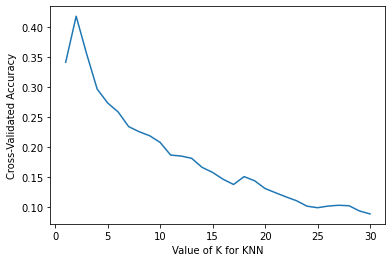

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

y = known_train["Deviation of training year"]
X = known_train.drop(columns=["Deviation of training year"])


cv = ShuffleSplit(n_splits= 2, test_size=0.20,random_state= 39)
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv= cv)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits= 2, test_size=0.20,random_state= 39)

y = known_train["Deviation of training year"]
X = known_train.drop(columns=["Deviation of training year"])

KNN = KNeighborsRegressor(n_neighbors = 2)
knn = cross_val_score(KNN, X, y,cv=cv)
y_pred = cross_val_predict(KNN, X, y, cv=2)
knn_rmse = np.sqrt(mean_squared_error(y,y_pred))
knn_mse = mean_squared_error(y,y_pred)
knn_mae = mean_absolute_error(y,y_pred)


print(knn)
print("Accuracy of knn :",knn.mean())
print("knn of Model with Cross Validation is:",knn.mean() * 100)


print("knn_mse:",knn_mse)
print("knn_rmse: ",knn_rmse)
print("knn_mae: ",knn_mae)



[0.39849223 0.43765417]
Accuracy of knn : 0.4180731996175115
knn of Model with Cross Validation is: 41.80731996175115
knn_mse: 0.2319027815836299
knn_rmse:  0.4815628532015628
knn_mae:  0.4106076512455516


In [ ]:
unknown_train =train_n.loc[(train_n['Deviation of training year']==0)]
unknown_df = unknown_train.drop(columns=["Deviation of training year"])


**RandomForest**

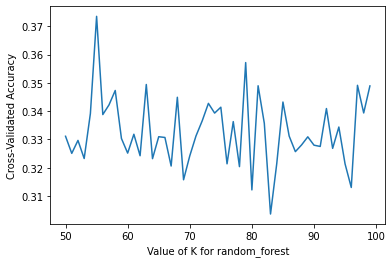

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

cv = ShuffleSplit(n_splits= 2, test_size=0.20,random_state= 41)
# choose k between 1 to 31
k_range = range(50,100)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = RandomForestRegressor(n_estimators =k,)
    scores = cross_val_score(knn, X, y, cv= cv)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for random_forest')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
y = known_train["Deviation of training year"]
X = known_train.drop(columns=["Deviation of training year"])

cv = ShuffleSplit(n_splits= 2, test_size=0.20,random_state= 39)
RandomForest = RandomForestRegressor(n_estimators= 97,random_state= 92)

rt = cross_val_score(RandomForest ,X, y, cv=cv)
#Knn =cross_val_score(KNeighborsRegressor(n_neighbors= 2), X, y, cv=cv)
y_pred = cross_val_predict(RandomForest, X, y, cv=2)
rt_rmse = np.sqrt(mean_squared_error(y,y_pred))
mse=mean_squared_error(y,y_pred)

print(rt)

print("rt of Model with Cross Validation is:",rt.mean() * 100)
print("rt_rmse: ",rt_rmse)
mse


[0.34162172 0.4610881 ]
rt of Model with Cross Validation is: 40.13549113153631
rt_rmse:  0.46034893389633064


0.21192114093948822

In [ ]:
known_train =train_n.loc[(train_n['Deviation of training year']!=0)]
TRAIN_SIZE = 0.80
# Create boolean mask
# np.random creates a vector of random values between 0 and 1
# Those values are filtered to create a binary mask
msk = np.random.rand(len(known_train)) < TRAIN_SIZE

train = known_train[msk]  
test20 = known_train[~msk] 


**original**

In [ ]:
train_n= train_n.round({"Deviation of training year":3}) 
known_train =train_n.loc[(train_n['Deviation of training year']!=0)]

ytn = known_train["Deviation of training year"]
Xtn = known_train.drop(columns=["Deviation of training year"])


X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.2,random_state= 39)

#X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.2,random_state= 39)
#model=  LinearRegression()
#model =RandomForestRegressor(n_estimators= 100,random_state= 41)
model = KNeighborsRegressor(n_neighbors= 2)
model.fit(X_train,y_train)
model.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print(model.score(X_test,y_test))
print(rmse)


unknown_df = unknown_train.drop(columns=["Deviation of training year"])
y_pred = model.predict(unknown_df) 
y_pred  = pd.DataFrame(y_pred)
y_pred = y_pred.rename({0: 'Deviation of training year'}, axis=1)
y_pred
unknown_df=unknown_df.reset_index()
unknown_df=unknown_df.drop('index',axis=1)
unknown_df
df_out = pd.merge(unknown_df, y_pred, how = 'left', left_index = True, right_index = True)
df_out
known_train =known_train.reset_index()
known_train=known_train.drop('index',axis=1)
known_train
train_frame =[known_train,df_out]
reco_train =pd.concat(train_frame)
original_train = reco_train.pivot(columns='CATEGORY',index='INST_.1',values='Deviation of training year')
original_train


0.39849223148343416
0.29692042153692244


CATEGORY,1,2,3,4,5,11,12,13,14,15,16,19,20,21,22,23,28,29,30,31,32,38,39,40,41,42,43,47,48,49,50
INST_.1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000,-0.7060,-0.9930,-1.0700,-0.8495,-0.8495,-0.4530,-0.4550,-0.7030,-0.7400,-0.836,-0.8360,-0.8275,-0.9040,-0.6970,-0.9640,-0.9640,-0.9425,-1.0240,-0.8610,-0.9425,-0.9425,-0.5485,-0.5730,-0.5240,-0.8315,-0.3795,-0.3795,-0.3795,-0.3795,-0.3795,-0.3795
1001,-0.8495,-0.8495,-0.8495,-0.8495,-0.8495,-0.4540,-0.8655,-1.2760,-0.9210,-0.751,-0.8360,-0.8275,-0.8275,-0.8275,-0.8275,-0.9640,-0.9425,-0.9425,-0.9425,-0.9425,-0.9425,-0.8560,-0.8560,-1.1390,-0.9470,-0.6460,-0.6870,-0.6870,-0.6870,-0.6870,-0.6870
1002,-0.5110,-0.6555,-0.6555,-0.6555,-0.6555,-0.8645,-0.8655,-1.0985,-1.0985,-0.836,-0.8360,-0.8275,-0.8275,-0.8275,-0.8275,-0.9640,-0.9425,-0.9425,-0.9425,-0.9425,-0.9425,-0.5675,-0.8505,-0.5620,-0.3960,-0.2350,-0.3985,-0.3985,-0.3985,-0.3985,-0.3985
1004,-0.3160,-0.3180,-0.3170,-0.3170,-0.3170,-0.8645,-1.0985,-1.0985,-1.0985,-0.836,-0.8360,-0.8275,-0.8275,-0.8275,-0.8275,-0.9640,-0.9425,-0.9425,-0.9425,-0.9425,-0.9425,-0.8505,-0.8505,-0.3985,-0.3985,-0.3985,-0.3985,-0.3985,-0.3985,-0.3985,-0.3985
1025,-0.2200,-0.5280,-0.7395,-0.7395,-0.7395,-0.1650,-0.1650,-0.1650,-0.1650,-0.165,-0.1650,-0.1650,-0.1650,-0.1205,-0.3725,-0.3725,-0.0930,-0.3725,-0.3725,-0.3725,-0.3725,-0.5340,-0.5340,-0.5340,-0.5340,-0.5340,-0.5340,-0.5340,-0.5340,-0.5340,-0.5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,0.0235,0.0235,0.0235,0.0235,0.0235,0.0235,0.0235,0.0235,0.0235,0.790,0.1935,0.5460,0.5460,0.5460,0.5460,0.5460,0.5460,0.3435,0.3435,0.3435,0.3435,0.3435,0.3435,0.3435,0.3020,0.3850,0.3435,0.3435,0.3435,0.3435,0.3435
2650,-0.2145,-0.2145,-0.2145,-0.2145,-0.2145,-0.2145,-0.2145,-0.7430,-0.9090,-0.822,-0.2540,-0.2540,-0.2540,-0.2540,-0.2540,-0.2540,-0.2375,-0.2375,-0.2375,-0.2375,-0.2375,-0.2375,-0.9295,-0.9120,-0.9470,-0.6060,-0.7765,0.0350,0.0350,0.0350,0.0350
2651,-0.2145,-0.2145,-0.2145,-0.2145,-0.2145,-0.2145,-0.2145,-0.2145,-0.2145,-0.254,-0.2540,-0.2540,-0.2540,-0.2540,-0.2540,-0.2540,-0.2375,-0.2375,-0.2375,-0.2375,-0.2375,-0.2375,-0.2375,-0.4200,-0.2550,0.0350,0.0350,0.0350,0.0350,0.0350,0.0350


In [ ]:
test_n=test_n.round({"Deviation of testing year":3}) 
known_test =test_n.loc[(test_n['Deviation of testing year']!=0)]

yts = known_test["Deviation of testing year"]
Xts = known_test.drop(columns=["Deviation of testing year"])

X_train, X_test, y_train, y_test = train_test_split(Xts,yts,test_size=0.2,random_state= 51)
#model=  LinearRegression()
model =RandomForestRegressor(n_estimators= 33,random_state= 51)
#model = KNeighborsRegressor(n_neighbors= 2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print(model.score(X_test,y_test))
print(rmse)


unknown_df = unknown_test.drop(columns=["Deviation of testing year"])
y_pred = model.predict(unknown_df) 
y_pred

y_pred  = pd.DataFrame(y_pred)
y_pred = y_pred.rename({0: 'Deviation of testing year'}, axis=1)
y_pred
unknown_df=unknown_df.reset_index()
unknown_df=unknown_df.drop('index',axis=1)
unknown_df
df_out = pd.merge(unknown_df, y_pred, how = 'left', left_index = True, right_index = True)
df_out
known_test  =known_test.reset_index()
known_test =known_test.drop('index',axis=1)
test_frame =[known_test ,df_out]
reco_test =pd.concat(test_frame)
original_test = reco_test.pivot(columns='CATEGORY',index='INST_.1',values='Deviation of testing year')
original_test


0.4737617651917917
0.2583707238208978


CATEGORY,1,2,3,4,11,12,13,14,15,16,19,20,21,22,23,24,28,29,30,31,32,37,38,39,40,41,42,43,47,48,49,50
INST_.1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000,-0.844000,-0.934000,-0.866000,-0.864879,-0.720000,-0.744000,-0.767212,-0.926848,-0.911727,-0.908818,-0.943091,-1.043000,-0.938000,-0.914333,-0.906152,-0.888727,-0.801939,-0.916000,-0.808818,-0.751606,-0.751606,-0.545606,-0.545606,-0.372000,-0.707818,-0.761939,-0.718424,-0.649909,-0.655879,-0.689000,-0.656939,-0.632273
1001,-0.887758,-0.903394,-0.892091,-0.889606,-0.792576,-0.799121,-1.198000,-0.986000,-0.986000,-0.955424,-0.977939,-0.977939,-0.977939,-0.947727,-0.939545,-0.924576,-0.861970,-0.910333,-0.886909,-0.845394,-0.845394,-0.694727,-0.694727,-0.715667,-0.997000,-0.972000,-0.846000,-0.712030,-0.708394,-0.709455,-0.709455,-0.684788
1002,-0.834727,-0.844667,-0.825303,-0.822818,-0.743788,-0.750333,-0.770000,-0.909000,-0.825970,-0.800455,-0.822970,-0.822970,-0.854212,-0.818545,-0.791788,-0.769273,-0.716424,-0.757667,-0.736030,-0.694182,-0.694182,-0.549000,-0.549000,-0.570788,-0.748000,-0.574000,-0.678273,-0.557121,-0.581485,-0.582545,-0.582545,-0.557788
1004,-0.400000,-0.491000,-0.674485,-0.683364,-0.620364,-0.631667,-0.633576,-0.739545,-0.725818,-0.700303,-0.717667,-0.717667,-0.748909,-0.711697,-0.684939,-0.675515,-0.622333,-0.681121,-0.660091,-0.641152,-0.641152,-0.514333,-0.514333,-0.536121,-0.657939,-0.664061,-0.678273,-0.557121,-0.581485,-0.582545,-0.582545,-0.557788
1010,-0.516667,-0.484545,-0.605000,-0.633667,-0.557242,-0.567818,-0.519364,-0.554000,-0.550636,-0.542667,-0.596242,-0.596242,-0.631182,-0.592485,-0.569970,-0.560545,-0.507697,-0.566485,-0.570121,-0.551182,-0.551182,-0.484606,-0.484606,-0.509909,-0.608939,-0.658636,-0.672848,-0.552909,-0.577273,-0.578333,-0.578333,-0.553576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,-0.234970,-0.276364,-0.225879,-0.245545,-0.286242,-0.286242,-0.332818,0.456000,0.067485,0.186788,0.192970,0.175455,0.175455,0.117000,0.094273,0.118515,0.090364,-0.014061,-0.115636,-0.139333,-0.171879,-0.091424,-0.091424,-0.035303,-0.046667,0.560000,0.226909,0.737000,0.431061,0.431061,0.431061,0.459970
2650,-0.745242,-0.786636,-0.736152,-0.797818,-0.880515,-0.880515,-1.005000,-0.770000,-0.737000,-0.621667,-0.423121,-0.425364,-0.425364,-0.360000,-0.437000,-0.396182,-0.417212,-0.498788,-0.615727,-0.645030,-0.776758,-0.725636,-0.725636,-0.640000,-0.848000,-0.732000,-0.539000,-0.397000,-0.319212,-0.319212,-0.319212,-0.290303
2651,-0.753879,-0.795273,-0.744788,-0.806455,-0.889152,-0.889152,-0.625000,-0.865000,-0.739303,-0.656333,-0.456606,-0.458848,-0.458848,-0.404970,-0.448697,-0.409152,-0.422697,-0.504273,-0.614242,-0.629606,-0.719515,-0.658455,-0.658455,-0.606121,-0.618000,-0.683000,-0.582000,-0.313242,-0.328545,-0.328545,-0.328545,-0.299636


In [ ]:
for i in range(1,1):
  print("train_f"+str(i)+" = original_train["+str(i)+"]","\n"
"train_f"+str(i)+"= train_f"+str(i)+".reset_index()","\n"
"train_f"+str(i)+" =train_f"+str(i)+".sort_values(by="+str(i)+", ascending= False)","\n"
"train_f"+str(i)+" =train_f"+str(i)+".reset_index()","\n"
"train_f"+str(i)+" =train_f"+str(i)+".drop('index',axis=1)","\n")

In [ ]:
for i in range(1,1):
  print("test_f"+str(i)+" = original_test["+str(i)+"]","\n"
"test_f"+str(i)+"= test_f"+str(i)+".reset_index()","\n"
"test_f"+str(i)+" =test_f"+str(i)+".sort_values(by="+str(i)+", ascending= False)","\n"
"test_f"+str(i)+" =test_f"+str(i)+".reset_index()","\n"
"test_f"+str(i)+" =test_f"+str(i)+".drop('index',axis=1)","\n")

In [ ]:
for i in range(1,1):
  print("f_df"+str(i)+" = pd.merge(train_f"+str(i)+",test_hsc"+str(i)+",how='inner',on='INST_.1')")

In [ ]:
 def lcs(s1, s2, s1Index, s2Index, arr):
    
    if s1Index ==-1 or s2Index == -1:
        return 0
    if(arr[s1Index][s2Index] != None):
        return arr[s1Index][s2Index]

    if s1[s1Index] == s2 [s2Index]:
        result = 1+ lcs(s1, s2, s1Index -1, s2Index -1, arr)
    else:
        result= max(lcs(s1, s2, s1Index -1, s2Index, arr), lcs(s1, s2, s1Index, s2Index -1, arr))
    arr[s1Index][s2Index] = result
    return result

In [ ]:
for number in range(1,1) : 
    print("s1 = train_f"+str(number)+"['INST_.1'].astype(str)","\n"+
          "s2= test_hsc"+str(number)+"['INST_.1'].astype(str)","\n"+
"a = [[None for i in range(len(s2))] for j in range(len(s1))]","\n"+
"print('Category:',"+str(number)+")","\n"+

"print('Length of LCS is :',lcs(s1, s2, len(s1)-1, len(s2)-1, a))","\n"+
"print('Number of colleges common in both strings :',len(f_df"+str(number)+"))","\n"+                     
"print('Length of string 1 :',len(train_f"+str(number)+"))","\n"+
"print('Length of string 2 :',len(test_hsc"+str(number)+"))","\n"+         
 "print('\\n')","\n")

In [ ]:
for number in range(1,1) : 
    print("s1 = train_f"+str(number)+"['INST_.1'].astype(str)","\n"+
          "s2= test_hsc"+str(number)+"['INST_.1'].astype(str)","\n"+
"a = [[None for i in range(len(s2))] for j in range(len(s1))]","\n"+
"print('Category:',"+str(number)+")","\n"+
"accuracy"+str(number)+"= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df"+str(number)+")","\n"+
"print('Length of LCS is :',lcs(s1, s2, len(s1)-1, len(s2)-1, a))","\n"+
"print('Number of colleges common in both strings :',len(f_df"+str(number)+"))","\n"+ 
"print('accuracy"+str(number)+":',accuracy"+str(number)+")","\n"+                        
"print('\\n')","\n")

In [ ]:
for number in range(1,1):
        print("s1 = train_f"+str(number)+"['INST_.1'].astype(str)","\n"+
          "s2= test_hsc"+str(number)+"['INST_.1'].astype(str)","\n"+
"a = [[None for i in range(len(s2))] for j in range(len(s1))]","\n"+   
"print("+str(number)+" ,',',len(f_df"+str(number)+"),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',accuracy"+str(number)+")","\n")


In [ ]:
test_matrix.columns

Index(['INST_.1',         1,         2,         3,         4,        11,
              12,        13,        14,        15,        16,        19,
              20,        21,        22,        23,        24,        28,
              29,        30,        31,        32,        37,        38,
              39,        40,        41,        42,        43,        47,
              48,        49,        50],
      dtype='object', name='CATEGORY')

In [ ]:
train_matrix.columns

Index(['INST_.1',         1,         2,         3,         4,         5,
              11,        12,        13,        14,        15,        16,
              19,        20,        21,        22,        23,        28,
              29,        30,        31,        32,        38,        39,
              40,        41,        42,        43,        47,        48,
              49,        50],
      dtype='object', name='CATEGORY')

**Start**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

**KNN model**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

train_n= train_n.round({"Deviation of training year":3}) 
known_train =train_n.loc[(train_n['Deviation of training year']!=0)]

ytn = known_train["Deviation of training year"]
Xtn = known_train.drop(columns=["Deviation of training year"])


X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.2,random_state= 0)

#X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.2,random_state= 39)
#model=  LinearRegression()
#model = DecisionTreeRegressor(max_depth=2)
#model =RandomForestRegressor(n_estimators= 100,random_state= 41)
model = KNeighborsRegressor(n_neighbors= 2)
model.fit(X_train,y_train)
model.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print(model.score(X_test,y_test))
print(rmse)


unknown_df = unknown_train.drop(columns=["Deviation of training year"])
y_pred = model.predict(unknown_df) 
y_pred  = pd.DataFrame(y_pred)
y_pred = y_pred.rename({0: 'Deviation of training year'}, axis=1)
y_pred
unknown_df=unknown_df.reset_index()
unknown_df=unknown_df.drop('index',axis=1)
unknown_df
df_out = pd.merge(unknown_df, y_pred, how = 'left', left_index = True, right_index = True)
df_out
known_train =known_train.reset_index()
known_train=known_train.drop('index',axis=1)
known_train
train_frame =[known_train,df_out]
reco_train =pd.concat(train_frame)
original_train = reco_train.pivot(columns='CATEGORY',index='INST_.1',values='Deviation of training year')
original_train


0.37575091188585685
0.2921579877788879


CATEGORY,1,2,3,4,5,11,12,13,14,15,16,19,20,21,22,23,28,29,30,31,32,38,39,40,41,42,43,47,48,49,50
INST_.1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000,-0.7060,-0.9930,-1.0700,-0.8880,-0.8880,-0.4530,-0.4550,-0.7030,-0.7400,-0.8305,-0.8305,-0.8005,-0.9040,-0.6970,-0.8005,-0.8005,-0.8605,-1.0240,-0.8610,-0.7985,-0.7985,-0.8560,-0.5730,-0.5240,-0.8925,-0.521,-0.5210,-0.5210,-0.5210,-0.5210,-0.5210
1001,-0.8880,-0.8880,-0.8880,-0.8880,-0.8880,-0.4540,-0.8655,-1.2760,-0.9210,-0.7510,-0.8305,-0.8005,-0.8005,-0.8005,-0.8005,-0.8005,-0.8605,-0.8605,-0.8605,-0.7985,-0.7985,-0.8560,-0.8560,-1.1390,-0.9470,-0.646,-0.5210,-0.5210,-0.5210,-0.5210,-0.5210
1002,-0.5110,-0.3170,-0.6940,-0.6940,-0.6940,-0.4540,-0.8655,-1.0985,-1.0985,-0.8305,-0.8305,-0.8005,-0.8005,-0.8005,-0.8005,-0.8005,-0.8605,-0.8605,-0.8605,-0.7985,-0.7985,-0.8505,-0.8505,-0.5620,-0.3960,-0.235,-0.5210,-0.5210,-0.5210,-0.5210,-0.5210
1004,-0.3160,-0.3180,-0.3170,-0.3170,-0.3170,-0.8645,-1.0985,-1.0985,-1.0985,-1.0985,-1.0985,-0.8005,-0.8005,-0.8005,-0.8005,-0.8005,-0.8605,-0.8605,-0.8605,-0.7985,-0.7985,-0.4790,-0.4790,-0.4790,-0.4790,-0.479,-0.5210,-0.5210,-0.5210,-0.5210,-0.5210
1025,-0.2200,-0.5280,-0.7395,-0.7395,-0.7395,-0.1650,-0.1650,-0.1650,-0.1650,-0.1650,-0.1650,-0.1650,-0.1650,-0.1205,-0.3725,-0.3725,-0.0930,-0.3725,-0.3725,-0.3725,-0.3725,-0.5340,-0.5340,-0.5340,-0.5340,-0.534,-0.5340,-0.5340,-0.5340,-0.5340,-0.5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,0.0235,0.0235,0.0235,0.0235,0.0235,0.0235,0.0235,0.0235,0.0880,0.7900,0.5460,0.5460,0.5460,0.5460,0.5460,0.5460,0.5460,0.3435,0.3435,0.3435,0.3435,0.3435,0.3435,0.3435,0.3020,0.385,0.3435,0.3435,0.3435,0.3435,0.3435
2650,-0.8260,-0.8260,-0.8260,-0.8260,-0.8260,-0.8260,-0.8260,-0.7430,-0.9090,-0.8220,-0.8655,-0.8655,-0.8655,-0.8655,-0.8655,-0.8655,0.0085,0.0085,0.0085,0.0085,0.0085,0.0085,-0.6835,-0.9120,-0.9470,-0.606,-0.7765,0.0350,0.0350,0.0350,0.0350
2651,-0.8260,-0.8260,-0.8260,-0.8260,-0.8260,-0.8260,-0.8260,-0.8260,-0.8655,-0.8655,-0.8655,-0.8655,-0.8655,-0.8655,-0.8655,-0.8655,0.0085,0.0085,0.0085,0.0085,0.0085,0.0085,0.0085,-0.4200,-0.6835,0.035,0.0350,0.0350,0.0350,0.0350,0.0350


In [ ]:
a= (train_matrix.columns)&(test_matrix.columns)
print(a)
print(len(a))

Index(['INST_.1',         1,         2,         3,         4,        11,
              12,        13,        14,        15,        16,        19,
              20,        21,        22,        23,        28,        29,
              30,        31,        32,        38,        39,        40,
              41,        42,        43,        47,        48,        49,
              50],
      dtype='object', name='CATEGORY')
31


In [ ]:
for i in range(1,1):
  print("train_f"+str(i)+" = original_train["+str(i)+"]","\n"
"train_f"+str(i)+"= train_f"+str(i)+".reset_index()","\n"
"train_f"+str(i)+" =train_f"+str(i)+".sort_values(by="+str(i)+", ascending= False)","\n"
"train_f"+str(i)+" =train_f"+str(i)+".reset_index()","\n"
"train_f"+str(i)+" =train_f"+str(i)+".drop('index',axis=1)","\n")

In [ ]:
for i in range(1,1):
  print("f_df"+str(i)+" = pd.merge(train_f"+str(i)+",test_hsc"+str(i)+",how='inner',on='INST_.1')")

In [ ]:
for number in range(34,35):
        print("s1 = train_f"+str(number)+"['INST_.1'].astype(str)","\n"+
          "s2= test_hsc"+str(number)+"['INST_.1'].astype(str)","\n"+
"a = [[None for i in range(len(s2))] for j in range(len(s1))]","\n"+
"accuracy"+str(number)+"= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df"+str(number)+")","\n"+   
"print("+str(number)+" ,',',len(f_df"+str(number)+"),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy"+str(number)+",2))","\n")


s1 = train_f34['INST_.1'].astype(str) 
s2= test_hsc34['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy34= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df34) 
print(34 ,',',len(f_df34),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy34,2)) 



In [ ]:
train_f1 = original_train[1] 
train_f1= train_f1.reset_index() 
train_f1 =train_f1.sort_values(by=1, ascending= False) 
train_f1 =train_f1.reset_index() 
train_f1 =train_f1.drop('index',axis=1) 

train_f2 = original_train[2] 
train_f2= train_f2.reset_index() 
train_f2 =train_f2.sort_values(by=2, ascending= False) 
train_f2 =train_f2.reset_index() 
train_f2 =train_f2.drop('index',axis=1) 

train_f3 = original_train[3] 
train_f3= train_f3.reset_index() 
train_f3 =train_f3.sort_values(by=3, ascending= False) 
train_f3 =train_f3.reset_index() 
train_f3 =train_f3.drop('index',axis=1) 

train_f4 = original_train[4] 
train_f4= train_f4.reset_index() 
train_f4 =train_f4.sort_values(by=4, ascending= False) 
train_f4 =train_f4.reset_index() 
train_f4 =train_f4.drop('index',axis=1) 

train_f11 = original_train[11] 
train_f11= train_f11.reset_index() 
train_f11 =train_f11.sort_values(by=11, ascending= False) 
train_f11 =train_f11.reset_index() 
train_f11 =train_f11.drop('index',axis=1) 

train_f12 = original_train[12] 
train_f12= train_f12.reset_index() 
train_f12 =train_f12.sort_values(by=12, ascending= False) 
train_f12 =train_f12.reset_index() 
train_f12 =train_f12.drop('index',axis=1) 

train_f13 = original_train[13] 
train_f13= train_f13.reset_index() 
train_f13 =train_f13.sort_values(by=13, ascending= False) 
train_f13 =train_f13.reset_index() 
train_f13 =train_f13.drop('index',axis=1) 

train_f14 = original_train[14] 
train_f14= train_f14.reset_index() 
train_f14 =train_f14.sort_values(by=14, ascending= False) 
train_f14 =train_f14.reset_index() 
train_f14 =train_f14.drop('index',axis=1) 

train_f15 = original_train[15] 
train_f15= train_f15.reset_index() 
train_f15 =train_f15.sort_values(by=15, ascending= False) 
train_f15 =train_f15.reset_index() 
train_f15 =train_f15.drop('index',axis=1) 

train_f16 = original_train[16] 
train_f16= train_f16.reset_index() 
train_f16 =train_f16.sort_values(by=16, ascending= False) 
train_f16 =train_f16.reset_index() 
train_f16 =train_f16.drop('index',axis=1) 


train_f19 = original_train[19] 
train_f19= train_f19.reset_index() 
train_f19 =train_f19.sort_values(by=19, ascending= False) 
train_f19 =train_f19.reset_index() 
train_f19 =train_f19.drop('index',axis=1) 

train_f20 = original_train[20] 
train_f20= train_f20.reset_index() 
train_f20 =train_f20.sort_values(by=20, ascending= False) 
train_f20 =train_f20.reset_index() 
train_f20 =train_f20.drop('index',axis=1) 

train_f21 = original_train[21] 
train_f21= train_f21.reset_index() 
train_f21 =train_f21.sort_values(by=21, ascending= False) 
train_f21 =train_f21.reset_index() 
train_f21 =train_f21.drop('index',axis=1) 

train_f22 = original_train[22] 
train_f22= train_f22.reset_index() 
train_f22 =train_f22.sort_values(by=22, ascending= False) 
train_f22 =train_f22.reset_index() 
train_f22 =train_f22.drop('index',axis=1) 

train_f23 = original_train[23] 
train_f23= train_f23.reset_index() 
train_f23 =train_f23.sort_values(by=23, ascending= False) 
train_f23 =train_f23.reset_index() 
train_f23 =train_f23.drop('index',axis=1) 


train_f28 = original_train[28] 
train_f28= train_f28.reset_index() 
train_f28 =train_f28.sort_values(by=28, ascending= False) 
train_f28 =train_f28.reset_index() 
train_f28 =train_f28.drop('index',axis=1) 

train_f29 = original_train[29] 
train_f29= train_f29.reset_index() 
train_f29 =train_f29.sort_values(by=29, ascending= False) 
train_f29 =train_f29.reset_index() 
train_f29 =train_f29.drop('index',axis=1) 

train_f30 = original_train[30] 
train_f30= train_f30.reset_index() 
train_f30 =train_f30.sort_values(by=30, ascending= False) 
train_f30 =train_f30.reset_index() 
train_f30 =train_f30.drop('index',axis=1) 

train_f31 = original_train[31] 
train_f31= train_f31.reset_index() 
train_f31 =train_f31.sort_values(by=31, ascending= False) 
train_f31 =train_f31.reset_index() 
train_f31 =train_f31.drop('index',axis=1) 

train_f32 = original_train[32] 
train_f32= train_f32.reset_index() 
train_f32 =train_f32.sort_values(by=32, ascending= False) 
train_f32 =train_f32.reset_index() 
train_f32 =train_f32.drop('index',axis=1) 


train_f38 = original_train[38] 
train_f38= train_f38.reset_index() 
train_f38 =train_f38.sort_values(by=38, ascending= False) 
train_f38 =train_f38.reset_index() 
train_f38 =train_f38.drop('index',axis=1) 

train_f39 = original_train[39] 
train_f39= train_f39.reset_index() 
train_f39 =train_f39.sort_values(by=39, ascending= False) 
train_f39 =train_f39.reset_index() 
train_f39 =train_f39.drop('index',axis=1) 

train_f40 = original_train[40] 
train_f40= train_f40.reset_index() 
train_f40 =train_f40.sort_values(by=40, ascending= False) 
train_f40 =train_f40.reset_index() 
train_f40 =train_f40.drop('index',axis=1) 

train_f41 = original_train[41] 
train_f41= train_f41.reset_index() 
train_f41 =train_f41.sort_values(by=41, ascending= False) 
train_f41 =train_f41.reset_index() 
train_f41 =train_f41.drop('index',axis=1) 

train_f42 = original_train[42] 
train_f42= train_f42.reset_index() 
train_f42 =train_f42.sort_values(by=42, ascending= False) 
train_f42 =train_f42.reset_index() 
train_f42 =train_f42.drop('index',axis=1) 

train_f43 = original_train[43] 
train_f43= train_f43.reset_index() 
train_f43 =train_f43.sort_values(by=43, ascending= False) 
train_f43 =train_f43.reset_index() 
train_f43 =train_f43.drop('index',axis=1) 


train_f47 = original_train[47] 
train_f47= train_f47.reset_index() 
train_f47 =train_f47.sort_values(by=47, ascending= False) 
train_f47 =train_f47.reset_index() 
train_f47 =train_f47.drop('index',axis=1) 

train_f48 = original_train[48] 
train_f48= train_f48.reset_index() 
train_f48 =train_f48.sort_values(by=48, ascending= False) 
train_f48 =train_f48.reset_index() 
train_f48 =train_f48.drop('index',axis=1) 

train_f49 = original_train[49] 
train_f49= train_f49.reset_index() 
train_f49 =train_f49.sort_values(by=49, ascending= False) 
train_f49 =train_f49.reset_index() 
train_f49 =train_f49.drop('index',axis=1) 

train_f50 = original_train[50] 
train_f50= train_f50.reset_index() 
train_f50 =train_f50.sort_values(by=50, ascending= False) 
train_f50 =train_f50.reset_index() 
train_f50 =train_f50.drop('index',axis=1) 
train_f50.shape

(116, 2)

In [ ]:
a

Index(['INST_.1',         1,         2,         3,         4,        11,
              12,        13,        14,        15,        16,        19,
              20,        21,        22,        23,        28,        29,
              30,        31,        32,        38,        39,        40,
              41,        42,        43,        47,        48,        49,
              50],
      dtype='object', name='CATEGORY')

In [ ]:
f_df1 = pd.merge(train_f1,test_hsc1,how='inner',on='INST_.1')
f_df2 = pd.merge(train_f2,test_hsc2,how='inner',on='INST_.1')
f_df3 = pd.merge(train_f3,test_hsc3,how='inner',on='INST_.1')
f_df4 = pd.merge(train_f4,test_hsc4,how='inner',on='INST_.1')

f_df11 = pd.merge(train_f11,test_hsc11,how='inner',on='INST_.1')
f_df12 = pd.merge(train_f12,test_hsc12,how='inner',on='INST_.1')
f_df13 = pd.merge(train_f13,test_hsc13,how='inner',on='INST_.1')
f_df14 = pd.merge(train_f14,test_hsc14,how='inner',on='INST_.1')
f_df15 = pd.merge(train_f15,test_hsc15,how='inner',on='INST_.1')
f_df16 = pd.merge(train_f16,test_hsc16,how='inner',on='INST_.1')

f_df19 = pd.merge(train_f19,test_hsc19,how='inner',on='INST_.1')
f_df20 = pd.merge(train_f20,test_hsc20,how='inner',on='INST_.1')
f_df21 = pd.merge(train_f21,test_hsc21,how='inner',on='INST_.1')
f_df22 = pd.merge(train_f22,test_hsc22,how='inner',on='INST_.1')
f_df23 = pd.merge(train_f23,test_hsc23,how='inner',on='INST_.1')

f_df28 = pd.merge(train_f28,test_hsc28,how='inner',on='INST_.1')
f_df29 = pd.merge(train_f29,test_hsc29,how='inner',on='INST_.1')
f_df30 = pd.merge(train_f30,test_hsc30,how='inner',on='INST_.1')
f_df31 = pd.merge(train_f31,test_hsc31,how='inner',on='INST_.1')
f_df32 = pd.merge(train_f32,test_hsc32,how='inner',on='INST_.1')

f_df38 = pd.merge(train_f38,test_hsc38,how='inner',on='INST_.1')
f_df39 = pd.merge(train_f39,test_hsc39,how='inner',on='INST_.1')
f_df40 = pd.merge(train_f40,test_hsc40,how='inner',on='INST_.1')
f_df41 = pd.merge(train_f41,test_hsc41,how='inner',on='INST_.1')
f_df42 = pd.merge(train_f42,test_hsc42,how='inner',on='INST_.1')
f_df43 = pd.merge(train_f43,test_hsc43,how='inner',on='INST_.1')

f_df47 = pd.merge(train_f47,test_hsc47,how='inner',on='INST_.1')
f_df48 = pd.merge(train_f48,test_hsc48,how='inner',on='INST_.1')
f_df49 = pd.merge(train_f49,test_hsc49,how='inner',on='INST_.1')
f_df50 = pd.merge(train_f50,test_hsc50,how='inner',on='INST_.1')
f_df50.shape

(2, 6)

In [ ]:
train_f1

,INST_.1,1
0,2625,0.0235
1,1078,0.0000
2,1079,0.0000
3,1102,-0.0360
4,1101,-0.1785
...,...,...
111,1028,-1.0340
112,2527,-1.0500
113,2528,-1.0500
114,2526,-1.0500


In [ ]:
f_df1 = pd.merge(train_f3,test_hsc3,on='INST_.1')
f_df1

,INST_.1,3,STUD_GROUP,SEX,CATEGORY,Deviation of testing year
0,1079,0.3070,0,0,3,0.083333
1,1300,-0.4830,0,0,3,-0.636667
2,1031,-0.5910,0,0,3,-0.667576
3,2325,-0.5990,0,0,3,-0.594848
4,1801,-0.5990,0,0,3,-0.378788
5,1026,-0.6430,0,0,3,-0.871250
6,1076,-0.7385,0,0,3,-0.031600
7,1325,-0.7700,0,0,3,-0.695333
8,1125,-1.0035,0,0,3,-0.569167
9,2500,-1.0070,0,0,3,-0.469800


In [ ]:
train_f4

,INST_.1,4
0,2625,0.0235
1,1079,0.0000
2,1078,0.0000
3,1101,-0.1785
4,1100,-0.1785
...,...,...
111,1754,-1.1500
112,1753,-1.1500
113,1752,-1.1500
114,1751,-1.1500


In [ ]:
 def lcs(s1, s2, s1Index, s2Index, arr):
    
    if s1Index ==-1 or s2Index == -1:
        return 0
    if(arr[s1Index][s2Index] != None):
        return arr[s1Index][s2Index]

    if s1[s1Index] == s2 [s2Index]:
        result = 1+ lcs(s1, s2, s1Index -1, s2Index -1, arr)
    else:
        result= max(lcs(s1, s2, s1Index -1, s2Index, arr), lcs(s1, s2, s1Index, s2Index -1, arr))
    arr[s1Index][s2Index] = result
    return result

In [ ]:
s1 = train_f1['INST_.1'].astype(str) 
s2= test_hsc1['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy1= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df1) 
print(1 ,',',len(f_df1),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy1,2)) 

s1 = train_f2['INST_.1'].astype(str) 
s2= test_hsc2['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy2= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df2) 
print(2 ,',',len(f_df2),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy2,2)) 

s1 = train_f3['INST_.1'].astype(str) 
s2= test_hsc3['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy3= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df3) 
print(3 ,',',len(f_df3),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy3,2)) 

s1 = train_f4['INST_.1'].astype(str) 
s2= test_hsc4['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy4= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df4) 
print(4 ,',',len(f_df4),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy4,2)) 


s1 = train_f11['INST_.1'].astype(str) 
s2= test_hsc11['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy11= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df11) 
print(11 ,',',len(f_df11),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy11,2)) 

s1 = train_f12['INST_.1'].astype(str) 
s2= test_hsc12['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy12= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df12) 
print(12 ,',',len(f_df12),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy12,2)) 

s1 = train_f13['INST_.1'].astype(str) 
s2= test_hsc13['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy13= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df13) 
print(13 ,',',len(f_df13),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy13,2)) 

s1 = train_f14['INST_.1'].astype(str) 
s2= test_hsc14['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy14= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df14) 
print(14 ,',',len(f_df14),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy14,2)) 

s1 = train_f15['INST_.1'].astype(str) 
s2= test_hsc15['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy15= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df15) 
print(15 ,',',len(f_df15),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy15,2)) 

s1 = train_f16['INST_.1'].astype(str) 
s2= test_hsc16['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy16= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df16) 
print(16 ,',',len(f_df16),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy16,2)) 


s1 = train_f19['INST_.1'].astype(str) 
s2= test_hsc19['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy19= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df19) 
print(19 ,',',len(f_df19),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy19,2)) 

s1 = train_f20['INST_.1'].astype(str) 
s2= test_hsc20['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy20= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df20) 
print(20 ,',',len(f_df20),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy20,2)) 

s1 = train_f21['INST_.1'].astype(str) 
s2= test_hsc21['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy21= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df21) 
print(21 ,',',len(f_df21),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy21,2)) 

s1 = train_f22['INST_.1'].astype(str) 
s2= test_hsc22['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy22= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df22) 
print(22 ,',',len(f_df22),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy22,2)) 

s1 = train_f23['INST_.1'].astype(str) 
s2= test_hsc23['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy23= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df23) 
print(23 ,',',len(f_df23),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy23,2)) 


s1 = train_f28['INST_.1'].astype(str) 
s2= test_hsc28['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy28= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df28) 
print(28 ,',',len(f_df28),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy28,2)) 

s1 = train_f29['INST_.1'].astype(str) 
s2= test_hsc29['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy29= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df29) 
print(29 ,',',len(f_df29),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy29,2)) 

s1 = train_f30['INST_.1'].astype(str) 
s2= test_hsc30['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy30= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df30) 
print(30 ,',',len(f_df30),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy30,2)) 

s1 = train_f31['INST_.1'].astype(str) 
s2= test_hsc31['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy31= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df31) 
print(31 ,',',len(f_df31),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy31,2)) 

s1 = train_f32['INST_.1'].astype(str) 
s2= test_hsc32['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy32= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df32) 
print(32 ,',',len(f_df32),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy32,2)) 


s1 = train_f38['INST_.1'].astype(str) 
s2= test_hsc38['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy38= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df38) 
print(38 ,',',len(f_df38),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy38,2)) 

s1 = train_f39['INST_.1'].astype(str) 
s2= test_hsc39['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy39= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df39) 
print(39 ,',',len(f_df39),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy39,2)) 

s1 = train_f40['INST_.1'].astype(str) 
s2= test_hsc40['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy40= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df40) 
print(40 ,',',len(f_df40),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy40,2)) 

s1 = train_f41['INST_.1'].astype(str) 
s2= test_hsc41['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy41= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df41) 
print(41 ,',',len(f_df41),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy41,2)) 

s1 = train_f42['INST_.1'].astype(str) 
s2= test_hsc42['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy42= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df42) 
print(42 ,',',len(f_df42),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy42,2)) 

s1 = train_f43['INST_.1'].astype(str) 
s2= test_hsc43['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy43= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df43) 
print(43 ,',',len(f_df43),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy43,2)) 


s1 = train_f47['INST_.1'].astype(str) 
s2= test_hsc47['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy47= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df47) 
print(47 ,',',len(f_df47),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy47,2)) 

s1 = train_f48['INST_.1'].astype(str) 
s2= test_hsc48['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy48= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df48) 
print(48 ,',',len(f_df48),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy48,2)) 

s1 = train_f49['INST_.1'].astype(str) 
s2= test_hsc49['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy49= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df49) 
print(49 ,',',len(f_df49),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy49,2)) 

s1 = train_f50['INST_.1'].astype(str) 
s2= test_hsc50['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy50= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df50) 
print(50 ,',',len(f_df50),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy50,2)) 


1 , 10 , 7 , 0.7
2 , 14 , 7 , 0.5
3 , 14 , 7 , 0.5
4 , 5 , 4 , 0.8
11 , 1 , 1 , 1.0
12 , 23 , 8 , 0.35
13 , 53 , 13 , 0.25
14 , 66 , 15 , 0.23
15 , 43 , 14 , 0.33
16 , 7 , 4 , 0.57
19 , 1 , 1 , 1.0
20 , 7 , 5 , 0.71
21 , 8 , 5 , 0.62
22 , 12 , 5 , 0.42
23 , 7 , 2 , 0.29
28 , 6 , 4 , 0.67
29 , 13 , 8 , 0.62
30 , 14 , 8 , 0.57
31 , 6 , 3 , 0.5
32 , 1 , 1 , 1.0
38 , 9 , 6 , 0.67
39 , 39 , 11 , 0.28
40 , 71 , 18 , 0.25
41 , 88 , 20 , 0.23
42 , 69 , 17 , 0.25
43 , 21 , 9 , 0.43
47 , 2 , 2 , 1.0
48 , 4 , 2 , 0.5
49 , 3 , 2 , 0.67
50 , 2 , 2 , 1.0


In [ ]:
a  = (train_matrix.columns)&(test_matrix.columns)
print(a)
print(len(a))

Index(['INST_.1',         1,         2,         3,         4,        11,
              12,        13,        14,        15,        16,        19,
              20,        21,        22,        23,        28,        29,
              30,        31,        32,        38,        39,        40,
              41,        42,        43,        47,        48,        49,
              50],
      dtype='object', name='CATEGORY')
31


In [ ]:
for i in range(1,50):
  print("accuracy"+str(i),end=" + ")

accuracy1 + accuracy2 + accuracy3 + accuracy4 + accuracy5 + accuracy6 + accuracy7 + accuracy8 + accuracy9 + accuracy10 + accuracy11 + accuracy12 + accuracy13 + accuracy14 + accuracy15 + accuracy16 + accuracy17 + accuracy18 + accuracy19 + accuracy20 + accuracy21 + accuracy22 + accuracy23 + accuracy24 + accuracy25 + accuracy26 + accuracy27 + accuracy28 + accuracy29 + accuracy30 + accuracy31 + accuracy32 + accuracy33 + accuracy34 + accuracy35 + accuracy36 + accuracy37 + accuracy38 + accuracy39 + accuracy40 + accuracy41 + accuracy42 + accuracy43 + accuracy44 + accuracy45 + accuracy46 + accuracy47 + accuracy48 + accuracy49 + 

In [ ]:
accuracy_knn=(accuracy1 + accuracy2 + accuracy3 + accuracy4 + accuracy11 + accuracy12 + accuracy13 + accuracy14 + accuracy15 + accuracy16  + accuracy19 + accuracy20 + accuracy21 + accuracy22 + accuracy23 +  accuracy28 + accuracy29 + accuracy30 + accuracy31 + accuracy32  + accuracy38 + accuracy39 + accuracy40 + accuracy41 + accuracy42 + accuracy43 + +accuracy47 + accuracy48 + accuracy49  + accuracy50)/30
score_knn= accuracy_knn*100
score_knn

56.27888343201547

**break** **knn**

In [ ]:
accuracy17

NameError: ignored

**Random Forest** **Model**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

train_n= train_n.round({"Deviation of training year":3}) 
known_train =train_n.loc[(train_n['Deviation of training year']!=0)]

ytn = known_train["Deviation of training year"]
Xtn = known_train.drop(columns=["Deviation of training year"])


X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.2,random_state= 39)

#X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.2,random_state= 39)
#model=  LinearRegression()
#model = DecisionTreeRegressor(max_depth=2)
model =RandomForestRegressor(n_estimators= 100,random_state= 41)
#model = KNeighborsRegressor(n_neighbors= 3)
model.fit(X_train,y_train)
model.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print(model.score(X_test,y_test))
print(rmse)


unknown_df = unknown_train.drop(columns=["Deviation of training year"])
y_pred = model.predict(unknown_df) 
y_pred  = pd.DataFrame(y_pred)
y_pred = y_pred.rename({0: 'Deviation of training year'}, axis=1)
y_pred
unknown_df=unknown_df.reset_index()
unknown_df=unknown_df.drop('index',axis=1)
unknown_df
df_out = pd.merge(unknown_df, y_pred, how = 'left', left_index = True, right_index = True)
df_out
known_train =known_train.reset_index()
known_train=known_train.drop('index',axis=1)
known_train
train_frame =[known_train,df_out]
reco_train =pd.concat(train_frame)
original_train = reco_train.pivot(columns='CATEGORY',index='INST_.1',values='Deviation of training year')
original_train


In [ ]:
train_f1 = original_train[1] 
train_f1= train_f1.reset_index() 
train_f1 =train_f1.sort_values(by=1, ascending= False) 
train_f1 =train_f1.reset_index() 
train_f1 =train_f1.drop('index',axis=1) 

train_f2 = original_train[2] 
train_f2= train_f2.reset_index() 
train_f2 =train_f2.sort_values(by=2, ascending= False) 
train_f2 =train_f2.reset_index() 
train_f2 =train_f2.drop('index',axis=1) 

train_f3 = original_train[3] 
train_f3= train_f3.reset_index() 
train_f3 =train_f3.sort_values(by=3, ascending= False) 
train_f3 =train_f3.reset_index() 
train_f3 =train_f3.drop('index',axis=1) 

train_f4 = original_train[4] 
train_f4= train_f4.reset_index() 
train_f4 =train_f4.sort_values(by=4, ascending= False) 
train_f4 =train_f4.reset_index() 
train_f4 =train_f4.drop('index',axis=1) 

train_f11 = original_train[11] 
train_f11= train_f11.reset_index() 
train_f11 =train_f11.sort_values(by=11, ascending= False) 
train_f11 =train_f11.reset_index() 
train_f11 =train_f11.drop('index',axis=1) 

train_f12 = original_train[12] 
train_f12= train_f12.reset_index() 
train_f12 =train_f12.sort_values(by=12, ascending= False) 
train_f12 =train_f12.reset_index() 
train_f12 =train_f12.drop('index',axis=1) 

train_f13 = original_train[13] 
train_f13= train_f13.reset_index() 
train_f13 =train_f13.sort_values(by=13, ascending= False) 
train_f13 =train_f13.reset_index() 
train_f13 =train_f13.drop('index',axis=1) 

train_f14 = original_train[14] 
train_f14= train_f14.reset_index() 
train_f14 =train_f14.sort_values(by=14, ascending= False) 
train_f14 =train_f14.reset_index() 
train_f14 =train_f14.drop('index',axis=1) 

train_f15 = original_train[15] 
train_f15= train_f15.reset_index() 
train_f15 =train_f15.sort_values(by=15, ascending= False) 
train_f15 =train_f15.reset_index() 
train_f15 =train_f15.drop('index',axis=1) 

train_f16 = original_train[16] 
train_f16= train_f16.reset_index() 
train_f16 =train_f16.sort_values(by=16, ascending= False) 
train_f16 =train_f16.reset_index() 
train_f16 =train_f16.drop('index',axis=1) 


train_f19 = original_train[19] 
train_f19= train_f19.reset_index() 
train_f19 =train_f19.sort_values(by=19, ascending= False) 
train_f19 =train_f19.reset_index() 
train_f19 =train_f19.drop('index',axis=1) 

train_f20 = original_train[20] 
train_f20= train_f20.reset_index() 
train_f20 =train_f20.sort_values(by=20, ascending= False) 
train_f20 =train_f20.reset_index() 
train_f20 =train_f20.drop('index',axis=1) 

train_f21 = original_train[21] 
train_f21= train_f21.reset_index() 
train_f21 =train_f21.sort_values(by=21, ascending= False) 
train_f21 =train_f21.reset_index() 
train_f21 =train_f21.drop('index',axis=1) 

train_f22 = original_train[22] 
train_f22= train_f22.reset_index() 
train_f22 =train_f22.sort_values(by=22, ascending= False) 
train_f22 =train_f22.reset_index() 
train_f22 =train_f22.drop('index',axis=1) 

train_f23 = original_train[23] 
train_f23= train_f23.reset_index() 
train_f23 =train_f23.sort_values(by=23, ascending= False) 
train_f23 =train_f23.reset_index() 
train_f23 =train_f23.drop('index',axis=1) 


train_f28 = original_train[28] 
train_f28= train_f28.reset_index() 
train_f28 =train_f28.sort_values(by=28, ascending= False) 
train_f28 =train_f28.reset_index() 
train_f28 =train_f28.drop('index',axis=1) 

train_f29 = original_train[29] 
train_f29= train_f29.reset_index() 
train_f29 =train_f29.sort_values(by=29, ascending= False) 
train_f29 =train_f29.reset_index() 
train_f29 =train_f29.drop('index',axis=1) 

train_f30 = original_train[30] 
train_f30= train_f30.reset_index() 
train_f30 =train_f30.sort_values(by=30, ascending= False) 
train_f30 =train_f30.reset_index() 
train_f30 =train_f30.drop('index',axis=1) 

train_f31 = original_train[31] 
train_f31= train_f31.reset_index() 
train_f31 =train_f31.sort_values(by=31, ascending= False) 
train_f31 =train_f31.reset_index() 
train_f31 =train_f31.drop('index',axis=1) 

train_f32 = original_train[32] 
train_f32= train_f32.reset_index() 
train_f32 =train_f32.sort_values(by=32, ascending= False) 
train_f32 =train_f32.reset_index() 
train_f32 =train_f32.drop('index',axis=1) 


train_f38 = original_train[38] 
train_f38= train_f38.reset_index() 
train_f38 =train_f38.sort_values(by=38, ascending= False) 
train_f38 =train_f38.reset_index() 
train_f38 =train_f38.drop('index',axis=1) 

train_f39 = original_train[39] 
train_f39= train_f39.reset_index() 
train_f39 =train_f39.sort_values(by=39, ascending= False) 
train_f39 =train_f39.reset_index() 
train_f39 =train_f39.drop('index',axis=1) 

train_f40 = original_train[40] 
train_f40= train_f40.reset_index() 
train_f40 =train_f40.sort_values(by=40, ascending= False) 
train_f40 =train_f40.reset_index() 
train_f40 =train_f40.drop('index',axis=1) 

train_f41 = original_train[41] 
train_f41= train_f41.reset_index() 
train_f41 =train_f41.sort_values(by=41, ascending= False) 
train_f41 =train_f41.reset_index() 
train_f41 =train_f41.drop('index',axis=1) 

train_f42 = original_train[42] 
train_f42= train_f42.reset_index() 
train_f42 =train_f42.sort_values(by=42, ascending= False) 
train_f42 =train_f42.reset_index() 
train_f42 =train_f42.drop('index',axis=1) 

train_f43 = original_train[43] 
train_f43= train_f43.reset_index() 
train_f43 =train_f43.sort_values(by=43, ascending= False) 
train_f43 =train_f43.reset_index() 
train_f43 =train_f43.drop('index',axis=1) 


train_f47 = original_train[47] 
train_f47= train_f47.reset_index() 
train_f47 =train_f47.sort_values(by=47, ascending= False) 
train_f47 =train_f47.reset_index() 
train_f47 =train_f47.drop('index',axis=1) 

train_f48 = original_train[48] 
train_f48= train_f48.reset_index() 
train_f48 =train_f48.sort_values(by=48, ascending= False) 
train_f48 =train_f48.reset_index() 
train_f48 =train_f48.drop('index',axis=1) 

train_f49 = original_train[49] 
train_f49= train_f49.reset_index() 
train_f49 =train_f49.sort_values(by=49, ascending= False) 
train_f49 =train_f49.reset_index() 
train_f49 =train_f49.drop('index',axis=1) 

train_f50 = original_train[50] 
train_f50= train_f50.reset_index() 
train_f50 =train_f50.sort_values(by=50, ascending= False) 
train_f50 =train_f50.reset_index() 
train_f50 =train_f50.drop('index',axis=1) 
train_f50.shape

In [ ]:
f_df1 = pd.merge(train_f1,test_hsc1,how='inner',on='INST_.1')
f_df2 = pd.merge(train_f2,test_hsc2,how='inner',on='INST_.1')
f_df3 = pd.merge(train_f3,test_hsc3,how='inner',on='INST_.1')
f_df4 = pd.merge(train_f4,test_hsc4,how='inner',on='INST_.1')

f_df11 = pd.merge(train_f11,test_hsc11,how='inner',on='INST_.1')
f_df12 = pd.merge(train_f12,test_hsc12,how='inner',on='INST_.1')
f_df13 = pd.merge(train_f13,test_hsc13,how='inner',on='INST_.1')
f_df14 = pd.merge(train_f14,test_hsc14,how='inner',on='INST_.1')
f_df15 = pd.merge(train_f15,test_hsc15,how='inner',on='INST_.1')
f_df16 = pd.merge(train_f16,test_hsc16,how='inner',on='INST_.1')

f_df19 = pd.merge(train_f19,test_hsc19,how='inner',on='INST_.1')
f_df20 = pd.merge(train_f20,test_hsc20,how='inner',on='INST_.1')
f_df21 = pd.merge(train_f21,test_hsc21,how='inner',on='INST_.1')
f_df22 = pd.merge(train_f22,test_hsc22,how='inner',on='INST_.1')
f_df23 = pd.merge(train_f23,test_hsc23,how='inner',on='INST_.1')

f_df28 = pd.merge(train_f28,test_hsc28,how='inner',on='INST_.1')
f_df29 = pd.merge(train_f29,test_hsc29,how='inner',on='INST_.1')
f_df30 = pd.merge(train_f30,test_hsc30,how='inner',on='INST_.1')
f_df31 = pd.merge(train_f31,test_hsc31,how='inner',on='INST_.1')
f_df32 = pd.merge(train_f32,test_hsc32,how='inner',on='INST_.1')

f_df38 = pd.merge(train_f38,test_hsc38,how='inner',on='INST_.1')
f_df39 = pd.merge(train_f39,test_hsc39,how='inner',on='INST_.1')
f_df40 = pd.merge(train_f40,test_hsc40,how='inner',on='INST_.1')
f_df41 = pd.merge(train_f41,test_hsc41,how='inner',on='INST_.1')
f_df42 = pd.merge(train_f42,test_hsc42,how='inner',on='INST_.1')
f_df43 = pd.merge(train_f43,test_hsc43,how='inner',on='INST_.1')

f_df47 = pd.merge(train_f47,test_hsc47,how='inner',on='INST_.1')
f_df48 = pd.merge(train_f48,test_hsc48,how='inner',on='INST_.1')
f_df49 = pd.merge(train_f49,test_hsc49,how='inner',on='INST_.1')
f_df50 = pd.merge(train_f50,test_hsc50,how='inner',on='INST_.1')
f_df50.shape

In [ ]:
 def lcs(s1, s2, s1Index, s2Index, arr):
    
    if s1Index ==-1 or s2Index == -1:
        return 0
    if(arr[s1Index][s2Index] != None):
        return arr[s1Index][s2Index]

    if s1[s1Index] == s2 [s2Index]:
        result = 1+ lcs(s1, s2, s1Index -1, s2Index -1, arr)
    else:
        result= max(lcs(s1, s2, s1Index -1, s2Index, arr), lcs(s1, s2, s1Index, s2Index -1, arr))
    arr[s1Index][s2Index] = result
    return result

In [ ]:
s1 = train_f1['INST_.1'].astype(str) 
s2= test_hsc1['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy1= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df1) 
print(1 ,',',len(f_df1),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy1,2)) 

s1 = train_f2['INST_.1'].astype(str) 
s2= test_hsc2['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy2= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df2) 
print(2 ,',',len(f_df2),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy2,2)) 

s1 = train_f3['INST_.1'].astype(str) 
s2= test_hsc3['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy3= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df3) 
print(3 ,',',len(f_df3),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy3,2)) 

s1 = train_f4['INST_.1'].astype(str) 
s2= test_hsc4['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy4= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df4) 
print(4 ,',',len(f_df4),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy4,2)) 


s1 = train_f11['INST_.1'].astype(str) 
s2= test_hsc11['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy11= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df11) 
print(11 ,',',len(f_df11),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy11,2)) 

s1 = train_f12['INST_.1'].astype(str) 
s2= test_hsc12['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy12= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df12) 
print(12 ,',',len(f_df12),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy12,2)) 

s1 = train_f13['INST_.1'].astype(str) 
s2= test_hsc13['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy13= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df13) 
print(13 ,',',len(f_df13),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy13,2)) 

s1 = train_f14['INST_.1'].astype(str) 
s2= test_hsc14['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy14= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df14) 
print(14 ,',',len(f_df14),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy14,2)) 

s1 = train_f15['INST_.1'].astype(str) 
s2= test_hsc15['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy15= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df15) 
print(15 ,',',len(f_df15),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy15,2)) 

s1 = train_f16['INST_.1'].astype(str) 
s2= test_hsc16['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy16= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df16) 
print(16 ,',',len(f_df16),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy16,2)) 


s1 = train_f19['INST_.1'].astype(str) 
s2= test_hsc19['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy19= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df19) 
print(19 ,',',len(f_df19),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy19,2)) 

s1 = train_f20['INST_.1'].astype(str) 
s2= test_hsc20['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy20= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df20) 
print(20 ,',',len(f_df20),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy20,2)) 

s1 = train_f21['INST_.1'].astype(str) 
s2= test_hsc21['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy21= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df21) 
print(21 ,',',len(f_df21),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy21,2)) 

s1 = train_f22['INST_.1'].astype(str) 
s2= test_hsc22['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy22= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df22) 
print(22 ,',',len(f_df22),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy22,2)) 

s1 = train_f23['INST_.1'].astype(str) 
s2= test_hsc23['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy23= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df23) 
print(23 ,',',len(f_df23),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy23,2)) 


s1 = train_f28['INST_.1'].astype(str) 
s2= test_hsc28['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy28= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df28) 
print(28 ,',',len(f_df28),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy28,2)) 

s1 = train_f29['INST_.1'].astype(str) 
s2= test_hsc29['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy29= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df29) 
print(29 ,',',len(f_df29),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy29,2)) 

s1 = train_f30['INST_.1'].astype(str) 
s2= test_hsc30['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy30= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df30) 
print(30 ,',',len(f_df30),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy30,2)) 

s1 = train_f31['INST_.1'].astype(str) 
s2= test_hsc31['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy31= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df31) 
print(31 ,',',len(f_df31),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy31,2)) 

s1 = train_f32['INST_.1'].astype(str) 
s2= test_hsc32['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy32= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df32) 
print(32 ,',',len(f_df32),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy32,2)) 


s1 = train_f38['INST_.1'].astype(str) 
s2= test_hsc38['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy38= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df38) 
print(38 ,',',len(f_df38),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy38,2)) 

s1 = train_f39['INST_.1'].astype(str) 
s2= test_hsc39['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy39= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df39) 
print(39 ,',',len(f_df39),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy39,2)) 

s1 = train_f40['INST_.1'].astype(str) 
s2= test_hsc40['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy40= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df40) 
print(40 ,',',len(f_df40),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy40,2)) 

s1 = train_f41['INST_.1'].astype(str) 
s2= test_hsc41['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy41= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df41) 
print(41 ,',',len(f_df41),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy41,2)) 

s1 = train_f42['INST_.1'].astype(str) 
s2= test_hsc42['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy42= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df42) 
print(42 ,',',len(f_df42),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy42,2)) 

s1 = train_f43['INST_.1'].astype(str) 
s2= test_hsc43['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy43= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df43) 
print(43 ,',',len(f_df43),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy43,2)) 


s1 = train_f47['INST_.1'].astype(str) 
s2= test_hsc47['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy47= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df47) 
print(47 ,',',len(f_df47),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy47,2)) 

s1 = train_f48['INST_.1'].astype(str) 
s2= test_hsc48['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy48= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df48) 
print(48 ,',',len(f_df48),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy48,2)) 

s1 = train_f49['INST_.1'].astype(str) 
s2= test_hsc49['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy49= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df49) 
print(49 ,',',len(f_df49),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy49,2)) 

s1 = train_f50['INST_.1'].astype(str) 
s2= test_hsc50['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy50= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df50) 
print(50 ,',',len(f_df50),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy50,2)) 


In [ ]:
accuracy_rt=(accuracy1 + accuracy2 + accuracy3 + accuracy4 + accuracy11 + accuracy12 + accuracy13 + accuracy14 + accuracy15 + accuracy16  + accuracy19 + accuracy20 + accuracy21 + accuracy22 + accuracy23 +  accuracy28 + accuracy29 + accuracy30 + accuracy31 + accuracy32  + accuracy38 + accuracy39 + accuracy40 + accuracy41 + accuracy42 + accuracy43 +accuracy47+ accuracy48 +accuracy49 +accuracy50)
score_rt = (accuracy_rt/30)*100
score_rt


**break** **rt**

In [ ]:
score_knn

In [ ]:
#accuracy17

**SVR** **model**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


train_n= train_n.round({"Deviation of training year":3}) 
known_train =train_n.loc[(train_n['Deviation of training year']!=0)]

ytn = known_train["Deviation of training year"]
Xtn = known_train.drop(columns=["Deviation of training year"])


X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.2,random_state= 40)

#X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.2,random_state= 39)
#model=  LinearRegression()
model = SVR()
#model = DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print(model.score(X_test,y_test))
print(rmse)


unknown_df = unknown_train.drop(columns=["Deviation of training year"])
y_pred = model.predict(unknown_df) 
y_pred  = pd.DataFrame(y_pred)
y_pred = y_pred.rename({0: 'Deviation of training year'}, axis=1)
y_pred
unknown_df=unknown_df.reset_index()
unknown_df=unknown_df.drop('index',axis=1)
unknown_df
df_out = pd.merge(unknown_df, y_pred, how = 'left', left_index = True, right_index = True)
df_out
known_train =known_train.reset_index()
known_train=known_train.drop('index',axis=1)
known_train
train_frame =[known_train,df_out]
reco_train =pd.concat(train_frame)
original_train = reco_train.pivot(columns='CATEGORY',index='INST_.1',values='Deviation of training year')
original_train


In [ ]:
train_f1 = original_train[1] 
train_f1= train_f1.reset_index() 
train_f1 =train_f1.sort_values(by=1, ascending= False) 
train_f1 =train_f1.reset_index() 
train_f1 =train_f1.drop('index',axis=1) 

train_f2 = original_train[2] 
train_f2= train_f2.reset_index() 
train_f2 =train_f2.sort_values(by=2, ascending= False) 
train_f2 =train_f2.reset_index() 
train_f2 =train_f2.drop('index',axis=1) 

train_f3 = original_train[3] 
train_f3= train_f3.reset_index() 
train_f3 =train_f3.sort_values(by=3, ascending= False) 
train_f3 =train_f3.reset_index() 
train_f3 =train_f3.drop('index',axis=1) 

train_f4 = original_train[4] 
train_f4= train_f4.reset_index() 
train_f4 =train_f4.sort_values(by=4, ascending= False) 
train_f4 =train_f4.reset_index() 
train_f4 =train_f4.drop('index',axis=1) 

train_f11 = original_train[11] 
train_f11= train_f11.reset_index() 
train_f11 =train_f11.sort_values(by=11, ascending= False) 
train_f11 =train_f11.reset_index() 
train_f11 =train_f11.drop('index',axis=1) 

train_f12 = original_train[12] 
train_f12= train_f12.reset_index() 
train_f12 =train_f12.sort_values(by=12, ascending= False) 
train_f12 =train_f12.reset_index() 
train_f12 =train_f12.drop('index',axis=1) 

train_f13 = original_train[13] 
train_f13= train_f13.reset_index() 
train_f13 =train_f13.sort_values(by=13, ascending= False) 
train_f13 =train_f13.reset_index() 
train_f13 =train_f13.drop('index',axis=1) 

train_f14 = original_train[14] 
train_f14= train_f14.reset_index() 
train_f14 =train_f14.sort_values(by=14, ascending= False) 
train_f14 =train_f14.reset_index() 
train_f14 =train_f14.drop('index',axis=1) 

train_f15 = original_train[15] 
train_f15= train_f15.reset_index() 
train_f15 =train_f15.sort_values(by=15, ascending= False) 
train_f15 =train_f15.reset_index() 
train_f15 =train_f15.drop('index',axis=1) 

train_f16 = original_train[16] 
train_f16= train_f16.reset_index() 
train_f16 =train_f16.sort_values(by=16, ascending= False) 
train_f16 =train_f16.reset_index() 
train_f16 =train_f16.drop('index',axis=1) 


train_f19 = original_train[19] 
train_f19= train_f19.reset_index() 
train_f19 =train_f19.sort_values(by=19, ascending= False) 
train_f19 =train_f19.reset_index() 
train_f19 =train_f19.drop('index',axis=1) 

train_f20 = original_train[20] 
train_f20= train_f20.reset_index() 
train_f20 =train_f20.sort_values(by=20, ascending= False) 
train_f20 =train_f20.reset_index() 
train_f20 =train_f20.drop('index',axis=1) 

train_f21 = original_train[21] 
train_f21= train_f21.reset_index() 
train_f21 =train_f21.sort_values(by=21, ascending= False) 
train_f21 =train_f21.reset_index() 
train_f21 =train_f21.drop('index',axis=1) 

train_f22 = original_train[22] 
train_f22= train_f22.reset_index() 
train_f22 =train_f22.sort_values(by=22, ascending= False) 
train_f22 =train_f22.reset_index() 
train_f22 =train_f22.drop('index',axis=1) 

train_f23 = original_train[23] 
train_f23= train_f23.reset_index() 
train_f23 =train_f23.sort_values(by=23, ascending= False) 
train_f23 =train_f23.reset_index() 
train_f23 =train_f23.drop('index',axis=1) 


train_f28 = original_train[28] 
train_f28= train_f28.reset_index() 
train_f28 =train_f28.sort_values(by=28, ascending= False) 
train_f28 =train_f28.reset_index() 
train_f28 =train_f28.drop('index',axis=1) 

train_f29 = original_train[29] 
train_f29= train_f29.reset_index() 
train_f29 =train_f29.sort_values(by=29, ascending= False) 
train_f29 =train_f29.reset_index() 
train_f29 =train_f29.drop('index',axis=1) 

train_f30 = original_train[30] 
train_f30= train_f30.reset_index() 
train_f30 =train_f30.sort_values(by=30, ascending= False) 
train_f30 =train_f30.reset_index() 
train_f30 =train_f30.drop('index',axis=1) 

train_f31 = original_train[31] 
train_f31= train_f31.reset_index() 
train_f31 =train_f31.sort_values(by=31, ascending= False) 
train_f31 =train_f31.reset_index() 
train_f31 =train_f31.drop('index',axis=1) 

train_f32 = original_train[32] 
train_f32= train_f32.reset_index() 
train_f32 =train_f32.sort_values(by=32, ascending= False) 
train_f32 =train_f32.reset_index() 
train_f32 =train_f32.drop('index',axis=1) 


train_f38 = original_train[38] 
train_f38= train_f38.reset_index() 
train_f38 =train_f38.sort_values(by=38, ascending= False) 
train_f38 =train_f38.reset_index() 
train_f38 =train_f38.drop('index',axis=1) 

train_f39 = original_train[39] 
train_f39= train_f39.reset_index() 
train_f39 =train_f39.sort_values(by=39, ascending= False) 
train_f39 =train_f39.reset_index() 
train_f39 =train_f39.drop('index',axis=1) 

train_f40 = original_train[40] 
train_f40= train_f40.reset_index() 
train_f40 =train_f40.sort_values(by=40, ascending= False) 
train_f40 =train_f40.reset_index() 
train_f40 =train_f40.drop('index',axis=1) 

train_f41 = original_train[41] 
train_f41= train_f41.reset_index() 
train_f41 =train_f41.sort_values(by=41, ascending= False) 
train_f41 =train_f41.reset_index() 
train_f41 =train_f41.drop('index',axis=1) 

train_f42 = original_train[42] 
train_f42= train_f42.reset_index() 
train_f42 =train_f42.sort_values(by=42, ascending= False) 
train_f42 =train_f42.reset_index() 
train_f42 =train_f42.drop('index',axis=1) 

train_f43 = original_train[43] 
train_f43= train_f43.reset_index() 
train_f43 =train_f43.sort_values(by=43, ascending= False) 
train_f43 =train_f43.reset_index() 
train_f43 =train_f43.drop('index',axis=1) 


train_f47 = original_train[47] 
train_f47= train_f47.reset_index() 
train_f47 =train_f47.sort_values(by=47, ascending= False) 
train_f47 =train_f47.reset_index() 
train_f47 =train_f47.drop('index',axis=1) 

train_f48 = original_train[48] 
train_f48= train_f48.reset_index() 
train_f48 =train_f48.sort_values(by=48, ascending= False) 
train_f48 =train_f48.reset_index() 
train_f48 =train_f48.drop('index',axis=1) 

train_f49 = original_train[49] 
train_f49= train_f49.reset_index() 
train_f49 =train_f49.sort_values(by=49, ascending= False) 
train_f49 =train_f49.reset_index() 
train_f49 =train_f49.drop('index',axis=1) 

train_f50 = original_train[50] 
train_f50= train_f50.reset_index() 
train_f50 =train_f50.sort_values(by=50, ascending= False) 
train_f50 =train_f50.reset_index() 
train_f50 =train_f50.drop('index',axis=1) 
train_f50.shape

In [ ]:
f_df1 = pd.merge(train_f1,test_hsc1,how='inner',on='INST_.1')
f_df2 = pd.merge(train_f2,test_hsc2,how='inner',on='INST_.1')
f_df3 = pd.merge(train_f3,test_hsc3,how='inner',on='INST_.1')
f_df4 = pd.merge(train_f4,test_hsc4,how='inner',on='INST_.1')

f_df11 = pd.merge(train_f11,test_hsc11,how='inner',on='INST_.1')
f_df12 = pd.merge(train_f12,test_hsc12,how='inner',on='INST_.1')
f_df13 = pd.merge(train_f13,test_hsc13,how='inner',on='INST_.1')
f_df14 = pd.merge(train_f14,test_hsc14,how='inner',on='INST_.1')
f_df15 = pd.merge(train_f15,test_hsc15,how='inner',on='INST_.1')
f_df16 = pd.merge(train_f16,test_hsc16,how='inner',on='INST_.1')

f_df19 = pd.merge(train_f19,test_hsc19,how='inner',on='INST_.1')
f_df20 = pd.merge(train_f20,test_hsc20,how='inner',on='INST_.1')
f_df21 = pd.merge(train_f21,test_hsc21,how='inner',on='INST_.1')
f_df22 = pd.merge(train_f22,test_hsc22,how='inner',on='INST_.1')
f_df23 = pd.merge(train_f23,test_hsc23,how='inner',on='INST_.1')

f_df28 = pd.merge(train_f28,test_hsc28,how='inner',on='INST_.1')
f_df29 = pd.merge(train_f29,test_hsc29,how='inner',on='INST_.1')
f_df30 = pd.merge(train_f30,test_hsc30,how='inner',on='INST_.1')
f_df31 = pd.merge(train_f31,test_hsc31,how='inner',on='INST_.1')
f_df32 = pd.merge(train_f32,test_hsc32,how='inner',on='INST_.1')

f_df38 = pd.merge(train_f38,test_hsc38,how='inner',on='INST_.1')
f_df39 = pd.merge(train_f39,test_hsc39,how='inner',on='INST_.1')
f_df40 = pd.merge(train_f40,test_hsc40,how='inner',on='INST_.1')
f_df41 = pd.merge(train_f41,test_hsc41,how='inner',on='INST_.1')
f_df42 = pd.merge(train_f42,test_hsc42,how='inner',on='INST_.1')
f_df43 = pd.merge(train_f43,test_hsc43,how='inner',on='INST_.1')

f_df47 = pd.merge(train_f47,test_hsc47,how='inner',on='INST_.1')
f_df48 = pd.merge(train_f48,test_hsc48,how='inner',on='INST_.1')
f_df49 = pd.merge(train_f49,test_hsc49,how='inner',on='INST_.1')
f_df50 = pd.merge(train_f50,test_hsc50,how='inner',on='INST_.1')
f_df50.shape

In [ ]:
 def lcs(s1, s2, s1Index, s2Index, arr):
    
    if s1Index ==-1 or s2Index == -1:
        return 0
    if(arr[s1Index][s2Index] != None):
        return arr[s1Index][s2Index]

    if s1[s1Index] == s2 [s2Index]:
        result = 1+ lcs(s1, s2, s1Index -1, s2Index -1, arr)
    else:
        result= max(lcs(s1, s2, s1Index -1, s2Index, arr), lcs(s1, s2, s1Index, s2Index -1, arr))
    arr[s1Index][s2Index] = result
    return result

In [ ]:
s1 = train_f1['INST_.1'].astype(str) 
s2= test_hsc1['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy1= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df1) 
print(1 ,',',len(f_df1),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy1,2)) 

s1 = train_f2['INST_.1'].astype(str) 
s2= test_hsc2['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy2= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df2) 
print(2 ,',',len(f_df2),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy2,2)) 

s1 = train_f3['INST_.1'].astype(str) 
s2= test_hsc3['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy3= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df3) 
print(3 ,',',len(f_df3),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy3,2)) 

s1 = train_f4['INST_.1'].astype(str) 
s2= test_hsc4['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy4= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df4) 
print(4 ,',',len(f_df4),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy4,2)) 


s1 = train_f11['INST_.1'].astype(str) 
s2= test_hsc11['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy11= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df11) 
print(11 ,',',len(f_df11),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy11,2)) 

s1 = train_f12['INST_.1'].astype(str) 
s2= test_hsc12['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy12= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df12) 
print(12 ,',',len(f_df12),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy12,2)) 

s1 = train_f13['INST_.1'].astype(str) 
s2= test_hsc13['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy13= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df13) 
print(13 ,',',len(f_df13),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy13,2)) 

s1 = train_f14['INST_.1'].astype(str) 
s2= test_hsc14['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy14= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df14) 
print(14 ,',',len(f_df14),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy14,2)) 

s1 = train_f15['INST_.1'].astype(str) 
s2= test_hsc15['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy15= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df15) 
print(15 ,',',len(f_df15),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy15,2)) 

s1 = train_f16['INST_.1'].astype(str) 
s2= test_hsc16['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy16= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df16) 
print(16 ,',',len(f_df16),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy16,2)) 


s1 = train_f19['INST_.1'].astype(str) 
s2= test_hsc19['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy19= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df19) 
print(19 ,',',len(f_df19),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy19,2)) 

s1 = train_f20['INST_.1'].astype(str) 
s2= test_hsc20['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy20= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df20) 
print(20 ,',',len(f_df20),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy20,2)) 

s1 = train_f21['INST_.1'].astype(str) 
s2= test_hsc21['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy21= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df21) 
print(21 ,',',len(f_df21),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy21,2)) 

s1 = train_f22['INST_.1'].astype(str) 
s2= test_hsc22['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy22= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df22) 
print(22 ,',',len(f_df22),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy22,2)) 

s1 = train_f23['INST_.1'].astype(str) 
s2= test_hsc23['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy23= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df23) 
print(23 ,',',len(f_df23),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy23,2)) 


s1 = train_f28['INST_.1'].astype(str) 
s2= test_hsc28['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy28= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df28) 
print(28 ,',',len(f_df28),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy28,2)) 

s1 = train_f29['INST_.1'].astype(str) 
s2= test_hsc29['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy29= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df29) 
print(29 ,',',len(f_df29),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy29,2)) 

s1 = train_f30['INST_.1'].astype(str) 
s2= test_hsc30['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy30= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df30) 
print(30 ,',',len(f_df30),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy30,2)) 

s1 = train_f31['INST_.1'].astype(str) 
s2= test_hsc31['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy31= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df31) 
print(31 ,',',len(f_df31),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy31,2)) 

s1 = train_f32['INST_.1'].astype(str) 
s2= test_hsc32['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy32= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df32) 
print(32 ,',',len(f_df32),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy32,2)) 


s1 = train_f38['INST_.1'].astype(str) 
s2= test_hsc38['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy38= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df38) 
print(38 ,',',len(f_df38),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy38,2)) 

s1 = train_f39['INST_.1'].astype(str) 
s2= test_hsc39['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy39= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df39) 
print(39 ,',',len(f_df39),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy39,2)) 

s1 = train_f40['INST_.1'].astype(str) 
s2= test_hsc40['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy40= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df40) 
print(40 ,',',len(f_df40),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy40,2)) 

s1 = train_f41['INST_.1'].astype(str) 
s2= test_hsc41['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy41= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df41) 
print(41 ,',',len(f_df41),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy41,2)) 

s1 = train_f42['INST_.1'].astype(str) 
s2= test_hsc42['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy42= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df42) 
print(42 ,',',len(f_df42),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy42,2)) 

s1 = train_f43['INST_.1'].astype(str) 
s2= test_hsc43['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy43= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df43) 
print(43 ,',',len(f_df43),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy43,2)) 


s1 = train_f47['INST_.1'].astype(str) 
s2= test_hsc47['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy47= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df47) 
print(47 ,',',len(f_df47),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy47,2)) 

s1 = train_f48['INST_.1'].astype(str) 
s2= test_hsc48['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy48= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df48) 
print(48 ,',',len(f_df48),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy48,2)) 

s1 = train_f49['INST_.1'].astype(str) 
s2= test_hsc49['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy49= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df49) 
print(49 ,',',len(f_df49),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy49,2)) 

s1 = train_f50['INST_.1'].astype(str) 
s2= test_hsc50['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy50= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df50) 
print(50 ,',',len(f_df50),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy50,2)) 


In [ ]:
accuracy_svr=(accuracy1 + accuracy2 + accuracy3 + accuracy4 + accuracy11 + accuracy12 + accuracy13 + accuracy14 + accuracy15 + accuracy16  + accuracy19 + accuracy20 + accuracy21 + accuracy22 + accuracy23 +  accuracy28 + accuracy29 + accuracy30 + accuracy31 + accuracy32  + accuracy38 + accuracy39 + accuracy40 + accuracy41 + accuracy42 + accuracy43 +accuracy47+ accuracy48 +accuracy49 +accuracy50)
score_svr = (accuracy_svr/30)*100
score_svr


In [ ]:
'''accuracy_dt=(accuracy1 + accuracy2 + accuracy3 + accuracy4 + accuracy11 + accuracy12 + accuracy13 + accuracy14 + accuracy15 + accuracy16  + accuracy19 + accuracy20 + accuracy21 + accuracy22 + accuracy23 +  accuracy28 + accuracy29 + accuracy30 + accuracy31 + accuracy32  + accuracy38 + accuracy39 + accuracy40 + accuracy41 + accuracy42 + accuracy43 +accuracy47+ accuracy48 +accuracy49 +accuracy50)
score_dt = (accuracy_dt/30)*100
score_dt'''


**break** **svr**

In [ ]:
#accuracy17

In [ ]:
lcs13to15 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lcs dataset/lcs13to15.csv')
lcs13to15
         

In [ ]:
accuracy_of_13_14_15 = lcs13to15['Accuracy'].sum()
accuracy_of_13_14_15


**DT** **Model**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


train_n= train_n.round({"Deviation of training year":3}) 
known_train =train_n.loc[(train_n['Deviation of training year']!=0)]

ytn = known_train["Deviation of training year"]
Xtn = known_train.drop(columns=["Deviation of training year"])


X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.2,random_state= 41)

#X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.2,random_state= 39)
#model=  LinearRegression()
#model = SVR()
model = DecisionTreeRegressor(random_state= 41)
model.fit(X_train,y_train)
model.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print(model.score(X_test,y_test))
print(rmse)


unknown_df = unknown_train.drop(columns=["Deviation of training year"])
y_pred = model.predict(unknown_df) 
y_pred  = pd.DataFrame(y_pred)
y_pred = y_pred.rename({0: 'Deviation of training year'}, axis=1)
y_pred
unknown_df=unknown_df.reset_index()
unknown_df=unknown_df.drop('index',axis=1)
unknown_df
df_out = pd.merge(unknown_df, y_pred, how = 'left', left_index = True, right_index = True)
df_out
known_train =known_train.reset_index()
known_train=known_train.drop('index',axis=1)
known_train
train_frame =[known_train,df_out]
reco_train =pd.concat(train_frame)
original_train = reco_train.pivot(columns='CATEGORY',index='INST_.1',values='Deviation of training year')
original_train


In [ ]:
train_f1 = original_train[1] 
train_f1= train_f1.reset_index() 
train_f1 =train_f1.sort_values(by=1, ascending= False) 
train_f1 =train_f1.reset_index() 
train_f1 =train_f1.drop('index',axis=1) 

train_f2 = original_train[2] 
train_f2= train_f2.reset_index() 
train_f2 =train_f2.sort_values(by=2, ascending= False) 
train_f2 =train_f2.reset_index() 
train_f2 =train_f2.drop('index',axis=1) 

train_f3 = original_train[3] 
train_f3= train_f3.reset_index() 
train_f3 =train_f3.sort_values(by=3, ascending= False) 
train_f3 =train_f3.reset_index() 
train_f3 =train_f3.drop('index',axis=1) 

train_f4 = original_train[4] 
train_f4= train_f4.reset_index() 
train_f4 =train_f4.sort_values(by=4, ascending= False) 
train_f4 =train_f4.reset_index() 
train_f4 =train_f4.drop('index',axis=1) 

train_f11 = original_train[11] 
train_f11= train_f11.reset_index() 
train_f11 =train_f11.sort_values(by=11, ascending= False) 
train_f11 =train_f11.reset_index() 
train_f11 =train_f11.drop('index',axis=1) 

train_f12 = original_train[12] 
train_f12= train_f12.reset_index() 
train_f12 =train_f12.sort_values(by=12, ascending= False) 
train_f12 =train_f12.reset_index() 
train_f12 =train_f12.drop('index',axis=1) 

train_f13 = original_train[13] 
train_f13= train_f13.reset_index() 
train_f13 =train_f13.sort_values(by=13, ascending= False) 
train_f13 =train_f13.reset_index() 
train_f13 =train_f13.drop('index',axis=1) 

train_f14 = original_train[14] 
train_f14= train_f14.reset_index() 
train_f14 =train_f14.sort_values(by=14, ascending= False) 
train_f14 =train_f14.reset_index() 
train_f14 =train_f14.drop('index',axis=1) 

train_f15 = original_train[15] 
train_f15= train_f15.reset_index() 
train_f15 =train_f15.sort_values(by=15, ascending= False) 
train_f15 =train_f15.reset_index() 
train_f15 =train_f15.drop('index',axis=1) 

train_f16 = original_train[16] 
train_f16= train_f16.reset_index() 
train_f16 =train_f16.sort_values(by=16, ascending= False) 
train_f16 =train_f16.reset_index() 
train_f16 =train_f16.drop('index',axis=1) 


train_f19 = original_train[19] 
train_f19= train_f19.reset_index() 
train_f19 =train_f19.sort_values(by=19, ascending= False) 
train_f19 =train_f19.reset_index() 
train_f19 =train_f19.drop('index',axis=1) 

train_f20 = original_train[20] 
train_f20= train_f20.reset_index() 
train_f20 =train_f20.sort_values(by=20, ascending= False) 
train_f20 =train_f20.reset_index() 
train_f20 =train_f20.drop('index',axis=1) 

train_f21 = original_train[21] 
train_f21= train_f21.reset_index() 
train_f21 =train_f21.sort_values(by=21, ascending= False) 
train_f21 =train_f21.reset_index() 
train_f21 =train_f21.drop('index',axis=1) 

train_f22 = original_train[22] 
train_f22= train_f22.reset_index() 
train_f22 =train_f22.sort_values(by=22, ascending= False) 
train_f22 =train_f22.reset_index() 
train_f22 =train_f22.drop('index',axis=1) 

train_f23 = original_train[23] 
train_f23= train_f23.reset_index() 
train_f23 =train_f23.sort_values(by=23, ascending= False) 
train_f23 =train_f23.reset_index() 
train_f23 =train_f23.drop('index',axis=1) 


train_f28 = original_train[28] 
train_f28= train_f28.reset_index() 
train_f28 =train_f28.sort_values(by=28, ascending= False) 
train_f28 =train_f28.reset_index() 
train_f28 =train_f28.drop('index',axis=1) 

train_f29 = original_train[29] 
train_f29= train_f29.reset_index() 
train_f29 =train_f29.sort_values(by=29, ascending= False) 
train_f29 =train_f29.reset_index() 
train_f29 =train_f29.drop('index',axis=1) 

train_f30 = original_train[30] 
train_f30= train_f30.reset_index() 
train_f30 =train_f30.sort_values(by=30, ascending= False) 
train_f30 =train_f30.reset_index() 
train_f30 =train_f30.drop('index',axis=1) 

train_f31 = original_train[31] 
train_f31= train_f31.reset_index() 
train_f31 =train_f31.sort_values(by=31, ascending= False) 
train_f31 =train_f31.reset_index() 
train_f31 =train_f31.drop('index',axis=1) 

train_f32 = original_train[32] 
train_f32= train_f32.reset_index() 
train_f32 =train_f32.sort_values(by=32, ascending= False) 
train_f32 =train_f32.reset_index() 
train_f32 =train_f32.drop('index',axis=1) 


train_f38 = original_train[38] 
train_f38= train_f38.reset_index() 
train_f38 =train_f38.sort_values(by=38, ascending= False) 
train_f38 =train_f38.reset_index() 
train_f38 =train_f38.drop('index',axis=1) 

train_f39 = original_train[39] 
train_f39= train_f39.reset_index() 
train_f39 =train_f39.sort_values(by=39, ascending= False) 
train_f39 =train_f39.reset_index() 
train_f39 =train_f39.drop('index',axis=1) 

train_f40 = original_train[40] 
train_f40= train_f40.reset_index() 
train_f40 =train_f40.sort_values(by=40, ascending= False) 
train_f40 =train_f40.reset_index() 
train_f40 =train_f40.drop('index',axis=1) 

train_f41 = original_train[41] 
train_f41= train_f41.reset_index() 
train_f41 =train_f41.sort_values(by=41, ascending= False) 
train_f41 =train_f41.reset_index() 
train_f41 =train_f41.drop('index',axis=1) 

train_f42 = original_train[42] 
train_f42= train_f42.reset_index() 
train_f42 =train_f42.sort_values(by=42, ascending= False) 
train_f42 =train_f42.reset_index() 
train_f42 =train_f42.drop('index',axis=1) 

train_f43 = original_train[43] 
train_f43= train_f43.reset_index() 
train_f43 =train_f43.sort_values(by=43, ascending= False) 
train_f43 =train_f43.reset_index() 
train_f43 =train_f43.drop('index',axis=1) 


train_f47 = original_train[47] 
train_f47= train_f47.reset_index() 
train_f47 =train_f47.sort_values(by=47, ascending= False) 
train_f47 =train_f47.reset_index() 
train_f47 =train_f47.drop('index',axis=1) 

train_f48 = original_train[48] 
train_f48= train_f48.reset_index() 
train_f48 =train_f48.sort_values(by=48, ascending= False) 
train_f48 =train_f48.reset_index() 
train_f48 =train_f48.drop('index',axis=1) 

train_f49 = original_train[49] 
train_f49= train_f49.reset_index() 
train_f49 =train_f49.sort_values(by=49, ascending= False) 
train_f49 =train_f49.reset_index() 
train_f49 =train_f49.drop('index',axis=1) 

train_f50 = original_train[50] 
train_f50= train_f50.reset_index() 
train_f50 =train_f50.sort_values(by=50, ascending= False) 
train_f50 =train_f50.reset_index() 
train_f50 =train_f50.drop('index',axis=1) 
train_f50.shape

In [ ]:
f_df1 = pd.merge(train_f1,test_hsc1,how='inner',on='INST_.1')
f_df2 = pd.merge(train_f2,test_hsc2,how='inner',on='INST_.1')
f_df3 = pd.merge(train_f3,test_hsc3,how='inner',on='INST_.1')
f_df4 = pd.merge(train_f4,test_hsc4,how='inner',on='INST_.1')

f_df11 = pd.merge(train_f11,test_hsc11,how='inner',on='INST_.1')
f_df12 = pd.merge(train_f12,test_hsc12,how='inner',on='INST_.1')
f_df13 = pd.merge(train_f13,test_hsc13,how='inner',on='INST_.1')
f_df14 = pd.merge(train_f14,test_hsc14,how='inner',on='INST_.1')
f_df15 = pd.merge(train_f15,test_hsc15,how='inner',on='INST_.1')
f_df16 = pd.merge(train_f16,test_hsc16,how='inner',on='INST_.1')

f_df19 = pd.merge(train_f19,test_hsc19,how='inner',on='INST_.1')
f_df20 = pd.merge(train_f20,test_hsc20,how='inner',on='INST_.1')
f_df21 = pd.merge(train_f21,test_hsc21,how='inner',on='INST_.1')
f_df22 = pd.merge(train_f22,test_hsc22,how='inner',on='INST_.1')
f_df23 = pd.merge(train_f23,test_hsc23,how='inner',on='INST_.1')

f_df28 = pd.merge(train_f28,test_hsc28,how='inner',on='INST_.1')
f_df29 = pd.merge(train_f29,test_hsc29,how='inner',on='INST_.1')
f_df30 = pd.merge(train_f30,test_hsc30,how='inner',on='INST_.1')
f_df31 = pd.merge(train_f31,test_hsc31,how='inner',on='INST_.1')
f_df32 = pd.merge(train_f32,test_hsc32,how='inner',on='INST_.1')

f_df38 = pd.merge(train_f38,test_hsc38,how='inner',on='INST_.1')
f_df39 = pd.merge(train_f39,test_hsc39,how='inner',on='INST_.1')
f_df40 = pd.merge(train_f40,test_hsc40,how='inner',on='INST_.1')
f_df41 = pd.merge(train_f41,test_hsc41,how='inner',on='INST_.1')
f_df42 = pd.merge(train_f42,test_hsc42,how='inner',on='INST_.1')
f_df43 = pd.merge(train_f43,test_hsc43,how='inner',on='INST_.1')

f_df47 = pd.merge(train_f47,test_hsc47,how='inner',on='INST_.1')
f_df48 = pd.merge(train_f48,test_hsc48,how='inner',on='INST_.1')
f_df49 = pd.merge(train_f49,test_hsc49,how='inner',on='INST_.1')
f_df50 = pd.merge(train_f50,test_hsc50,how='inner',on='INST_.1')
f_df50.shape

In [ ]:
 def lcs(s1, s2, s1Index, s2Index, arr):
    
    if s1Index ==-1 or s2Index == -1:
        return 0
    if(arr[s1Index][s2Index] != None):
        return arr[s1Index][s2Index]

    if s1[s1Index] == s2 [s2Index]:
        result = 1+ lcs(s1, s2, s1Index -1, s2Index -1, arr)
    else:
        result= max(lcs(s1, s2, s1Index -1, s2Index, arr), lcs(s1, s2, s1Index, s2Index -1, arr))
    arr[s1Index][s2Index] = result
    return result

In [ ]:
s1 = train_f1['INST_.1'].astype(str) 
s2= test_hsc1['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy1= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df1) 
print(1 ,',',len(f_df1),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy1,2)) 

s1 = train_f2['INST_.1'].astype(str) 
s2= test_hsc2['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy2= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df2) 
print(2 ,',',len(f_df2),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy2,2)) 

s1 = train_f3['INST_.1'].astype(str) 
s2= test_hsc3['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy3= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df3) 
print(3 ,',',len(f_df3),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy3,2)) 

s1 = train_f4['INST_.1'].astype(str) 
s2= test_hsc4['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy4= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df4) 
print(4 ,',',len(f_df4),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy4,2)) 


s1 = train_f11['INST_.1'].astype(str) 
s2= test_hsc11['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy11= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df11) 
print(11 ,',',len(f_df11),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy11,2)) 

s1 = train_f12['INST_.1'].astype(str) 
s2= test_hsc12['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy12= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df12) 
print(12 ,',',len(f_df12),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy12,2)) 

s1 = train_f13['INST_.1'].astype(str) 
s2= test_hsc13['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy13= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df13) 
print(13 ,',',len(f_df13),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy13,2)) 

s1 = train_f14['INST_.1'].astype(str) 
s2= test_hsc14['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy14= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df14) 
print(14 ,',',len(f_df14),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy14,2)) 

s1 = train_f15['INST_.1'].astype(str) 
s2= test_hsc15['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy15= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df15) 
print(15 ,',',len(f_df15),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy15,2)) 

s1 = train_f16['INST_.1'].astype(str) 
s2= test_hsc16['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy16= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df16) 
print(16 ,',',len(f_df16),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy16,2)) 


s1 = train_f19['INST_.1'].astype(str) 
s2= test_hsc19['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy19= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df19) 
print(19 ,',',len(f_df19),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy19,2)) 

s1 = train_f20['INST_.1'].astype(str) 
s2= test_hsc20['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy20= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df20) 
print(20 ,',',len(f_df20),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy20,2)) 

s1 = train_f21['INST_.1'].astype(str) 
s2= test_hsc21['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy21= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df21) 
print(21 ,',',len(f_df21),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy21,2)) 

s1 = train_f22['INST_.1'].astype(str) 
s2= test_hsc22['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy22= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df22) 
print(22 ,',',len(f_df22),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy22,2)) 

s1 = train_f23['INST_.1'].astype(str) 
s2= test_hsc23['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy23= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df23) 
print(23 ,',',len(f_df23),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy23,2)) 


s1 = train_f28['INST_.1'].astype(str) 
s2= test_hsc28['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy28= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df28) 
print(28 ,',',len(f_df28),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy28,2)) 

s1 = train_f29['INST_.1'].astype(str) 
s2= test_hsc29['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy29= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df29) 
print(29 ,',',len(f_df29),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy29,2)) 

s1 = train_f30['INST_.1'].astype(str) 
s2= test_hsc30['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy30= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df30) 
print(30 ,',',len(f_df30),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy30,2)) 

s1 = train_f31['INST_.1'].astype(str) 
s2= test_hsc31['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy31= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df31) 
print(31 ,',',len(f_df31),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy31,2)) 

s1 = train_f32['INST_.1'].astype(str) 
s2= test_hsc32['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy32= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df32) 
print(32 ,',',len(f_df32),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy32,2)) 


s1 = train_f38['INST_.1'].astype(str) 
s2= test_hsc38['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy38= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df38) 
print(38 ,',',len(f_df38),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy38,2)) 

s1 = train_f39['INST_.1'].astype(str) 
s2= test_hsc39['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy39= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df39) 
print(39 ,',',len(f_df39),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy39,2)) 

s1 = train_f40['INST_.1'].astype(str) 
s2= test_hsc40['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy40= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df40) 
print(40 ,',',len(f_df40),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy40,2)) 

s1 = train_f41['INST_.1'].astype(str) 
s2= test_hsc41['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy41= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df41) 
print(41 ,',',len(f_df41),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy41,2)) 

s1 = train_f42['INST_.1'].astype(str) 
s2= test_hsc42['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy42= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df42) 
print(42 ,',',len(f_df42),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy42,2)) 

s1 = train_f43['INST_.1'].astype(str) 
s2= test_hsc43['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy43= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df43) 
print(43 ,',',len(f_df43),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy43,2)) 


s1 = train_f47['INST_.1'].astype(str) 
s2= test_hsc47['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy47= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df47) 
print(47 ,',',len(f_df47),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy47,2)) 

s1 = train_f48['INST_.1'].astype(str) 
s2= test_hsc48['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy48= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df48) 
print(48 ,',',len(f_df48),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy48,2)) 

s1 = train_f49['INST_.1'].astype(str) 
s2= test_hsc49['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy49= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df49) 
print(49 ,',',len(f_df49),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy49,2)) 

s1 = train_f50['INST_.1'].astype(str) 
s2= test_hsc50['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy50= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df50) 
print(50 ,',',len(f_df50),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy50,2)) 


In [ ]:
accuracy_dt=(accuracy1 + accuracy2 + accuracy3 + accuracy4 + accuracy11 + accuracy12 + accuracy13 + accuracy14 + accuracy15 + accuracy16  + accuracy19 + accuracy20 + accuracy21 + accuracy22 + accuracy23 +  accuracy28 + accuracy29 + accuracy30 + accuracy31 + accuracy32  + accuracy38 + accuracy39 + accuracy40 + accuracy41 + accuracy42 + accuracy43 +accuracy47+ accuracy48 +accuracy49 +accuracy50)
score_dt = (accuracy_dt/30)*100
score_dt


In [ ]:
#accuracy17

**break** **dt**

**LCS** **code**

**Predicted**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
train_n= train_n.round({"Deviation of training year":3}) 
known_train =train_n.loc[(train_n['Deviation of training year']!=0)]

ytn = known_train["Deviation of training year"]
Xtn = known_train.drop(columns=["Deviation of training year"])

X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.1,random_state= 51)

X_train, X_test, y_train, y_test = train_test_split(Xtn,ytn,test_size=0.2,random_state= 39)
#model=  LinearRegression()
model =RandomForestRegressor(n_estimators= 100,random_state= 41)
#model = KNeighborsRegressor(n_neighbors= 2)
model.fit(X_train,y_train)
model.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print(model.score(X_test,y_test))
print(rmse)

unknown_df1 = train_n.drop(columns=["Deviation of training year"])
unknown_df1
y_pred = model.predict(unknown_df1) 
y_pred  = pd.DataFrame(y_pred)
y_pred = y_pred.rename({0: 'Deviation of training year'}, axis=1)
y_pred
df_out = pd.merge(unknown_df1, y_pred, how = 'left', left_index = True, right_index = True)
matrix_train = df_out.pivot(columns='CATEGORY',index='INST_.1',values='Deviation of training year')
matrix_train


In [ ]:
train_matrix

In [ ]:
test_n=test_n.round({"Deviation of testing year":3}) 
known_test =test_n.loc[(test_n['Deviation of testing year']!=0)]

yts = known_test["Deviation of testing year"]
Xts = known_test.drop(columns=["Deviation of testing year"])

X_train, X_test, y_train, y_test = train_test_split(Xts,yts,test_size=0.2,random_state= 51)
#model=  LinearRegression()
model =RandomForestRegressor(n_estimators= 33,random_state= 51)
#model = KNeighborsRegressor(n_neighbors= 2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print(model.score(X_test,y_test))
print(rmse)

unknown_df1 = test_n.drop(columns=["Deviation of testing year"])
unknown_df1
y_pred = model.predict(unknown_df1) 
y_pred  = pd.DataFrame(y_pred)
y_pred = y_pred.rename({0: 'Deviation of testing year'}, axis=1)
y_pred
df_test = pd.merge(unknown_df1, y_pred, how = 'left', left_index = True, right_index = True)
print(df_test.shape)
print(test_n.shape)
matrix_test = df_test.pivot(columns='CATEGORY',index='INST_.1',values='Deviation of testing year')
matrix_test


**LCS**

In [ ]:
 def lcs(s1, s2, s1Index, s2Index, arr):
    
    if s1Index ==-1 or s2Index == -1:
        return 0
    if(arr[s1Index][s2Index] != None):
        return arr[s1Index][s2Index]

    if s1[s1Index] == s2 [s2Index]:
        result = 1+ lcs(s1, s2, s1Index -1, s2Index -1, arr)
    else:
        result= max(lcs(s1, s2, s1Index -1, s2Index, arr), lcs(s1, s2, s1Index, s2Index -1, arr))
    arr[s1Index][s2Index] = result
    return result

**GridsearchCV**

In [ ]:
train_n=train_n.round({"Deviation of training year":3}) 
test_n=test_n.round({"Deviation of testing year":3}) 
known_train =train_n.loc[(train_n['Deviation of training year']!=0)]
known_test =test_n.loc[(test_n['Deviation of testing year']!=0)]


In [ ]:
TRAIN_SIZE = 0.80
# Create boolean mask
# np.random creates a vector of random values between 0 and 1
# Those values are filtered to create a binary mask
msk = np.random.rand(len(known_train)) < TRAIN_SIZE

train80 = known_train[msk]  
test20 = known_train[~msk] 

***Cosine similarity***

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.sparse as sp
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = train_df.pivot(columns='INST_.1',index='CATEGORY',values='Deviation of training year')
#df=df.reset_index()
df.head()

In [ ]:
df1 = test_df.pivot(columns='INST_.1',index='CATEGORY',values='Deviation of testing year')
df1.head()

**Memory** **based** **CF**

In [ ]:
n_users = train_df["INST_.1"].unique().shape[0]
n_items = train_df.CATEGORY.unique().shape[0]
print( str(n_users) + ' users')
print( str(n_items) + ' items')

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.sparse as sp
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def predict(l):
    # finds the userIds corresponding to the top 5 similarities
    # calculate the prediction according to the formula
    return (df[l.index] * l).sum(axis=1) / l.sum()
df = train_df.pivot(columns='CATEGORY',index='INST_.1',values='Deviation of training year')


# use userID as columns for convinience when interpretering the forumla
similarity = pd.DataFrame(cosine_similarity(
    scale(df.T.fillna(-1000))),
    index=df.columns,
    columns=df.columns)
# iterate each column (userID),
# for each userID find the highest five similarities
# and use to calculate the prediction for that user,
# use fillna so that original ratings dont change

res = df.apply(lambda col: ' '.join('{}'.format(mid) for mid in col.fillna(
    predict(similarity[col.name].nlargest(7).iloc[1:])).nlargest(10).index))
print(res)

In [ ]:
train_f1.head(10)

In [ ]:
res=res.reset_index()
res = res.rename({0: 'Category'}, axis=1)
res

In [ ]:
def predict(l):
    # finds the userIds corresponding to the top 5 similarities
    # calculate the prediction according to the formula
    return (df[l.index] * l).sum(axis=1) / l.sum()

df = test_df.pivot(columns='CATEGORY',index='INST_.1',values='Deviation of testing year')
# use userID as columns for convinience when interpretering the forumla
similarity = pd.DataFrame(cosine_similarity(
    scale(df.T.fillna(-1000))),
    index=df.columns,
    columns=df.columns)
# iterate each column (userID),
# for each userID find the highest five similarities
# and use to calculate the prediction for that user,
# use fillna so that original ratings dont change

res1 = df.apply(lambda col: ' '.join('{}'.format(mid) for mid in col.fillna(
    predict(similarity[col.name].nlargest(7).iloc[1:])).nlargest(10).index))
print(res1)

In [ ]:
res1 =res1.reset_index()
res1 = res1.rename({0: 'Category'}, axis=1)
res1

In [ ]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [ ]:
sim_user_30_u = find_n_neighbours(similarity,28)
sim_user_30_u.shape

**SVD** **model**

In [ ]:
train_svd = train_df.pivot(columns='CATEGORY',index=['INST_.1'],values='Deviation of training year').fillna(0)
#train_svd=train_svd.reset_index()
train_svd

In [ ]:
test_svd = test_df.pivot(columns='CATEGORY',index=['INST_.1'],values='Deviation of testing year').fillna(0)
#test_svd=test_svd.reset_index()
test_svd.shape

In [ ]:
train_r = train_svd.values
train_college_deviations_mean = np.mean(train_r, axis = 1)
R_demeaned_train = train_r - train_college_deviations_mean.reshape(-1, 1)

from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned_train, k = 21)
sigma = np.diag(sigma)
train_colleges_predicted_deviations = np.dot(np.dot(U, sigma), Vt)+train_college_deviations_mean.reshape(-1, 1)
train_colleges_predicted_deviations
original_train = pd.DataFrame(train_colleges_predicted_deviations, columns = train_svd.columns)
original_train.index= train_svd.index
original_train


In [ ]:
test_r = test_svd.values
test_college_deviations_mean = np.mean(test_r, axis = 1)
R_demeaned_test = test_r - test_college_deviations_mean.reshape(-1, 1)
R_demeaned_test
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned_test, k = 23)
sigma = np.diag(sigma)
test_colleges_predicted_deviations = np.dot(np.dot(U, sigma), Vt)+test_college_deviations_mean.reshape(-1, 1)
test_colleges_predicted_deviations
test_pred = pd.DataFrame(test_colleges_predicted_deviations, columns = test_svd.columns)
test_pred
test_pred.index= test_svd.index
test_pred.shape


In [ ]:
train_f1 = original_train[1] 
train_f1= train_f1.reset_index() 
train_f1 =train_f1.sort_values(by=1, ascending= False) 
train_f1 =train_f1.reset_index() 
train_f1 =train_f1.drop('index',axis=1) 

train_f2 = original_train[2] 
train_f2= train_f2.reset_index() 
train_f2 =train_f2.sort_values(by=2, ascending= False) 
train_f2 =train_f2.reset_index() 
train_f2 =train_f2.drop('index',axis=1) 

train_f3 = original_train[3] 
train_f3= train_f3.reset_index() 
train_f3 =train_f3.sort_values(by=3, ascending= False) 
train_f3 =train_f3.reset_index() 
train_f3 =train_f3.drop('index',axis=1) 

train_f4 = original_train[4] 
train_f4= train_f4.reset_index() 
train_f4 =train_f4.sort_values(by=4, ascending= False) 
train_f4 =train_f4.reset_index() 
train_f4 =train_f4.drop('index',axis=1) 

train_f11 = original_train[11] 
train_f11= train_f11.reset_index() 
train_f11 =train_f11.sort_values(by=11, ascending= False) 
train_f11 =train_f11.reset_index() 
train_f11 =train_f11.drop('index',axis=1) 

train_f12 = original_train[12] 
train_f12= train_f12.reset_index() 
train_f12 =train_f12.sort_values(by=12, ascending= False) 
train_f12 =train_f12.reset_index() 
train_f12 =train_f12.drop('index',axis=1) 

train_f13 = original_train[13] 
train_f13= train_f13.reset_index() 
train_f13 =train_f13.sort_values(by=13, ascending= False) 
train_f13 =train_f13.reset_index() 
train_f13 =train_f13.drop('index',axis=1) 

train_f14 = original_train[14] 
train_f14= train_f14.reset_index() 
train_f14 =train_f14.sort_values(by=14, ascending= False) 
train_f14 =train_f14.reset_index() 
train_f14 =train_f14.drop('index',axis=1) 

train_f15 = original_train[15] 
train_f15= train_f15.reset_index() 
train_f15 =train_f15.sort_values(by=15, ascending= False) 
train_f15 =train_f15.reset_index() 
train_f15 =train_f15.drop('index',axis=1) 

train_f16 = original_train[16] 
train_f16= train_f16.reset_index() 
train_f16 =train_f16.sort_values(by=16, ascending= False) 
train_f16 =train_f16.reset_index() 
train_f16 =train_f16.drop('index',axis=1) 


train_f19 = original_train[19] 
train_f19= train_f19.reset_index() 
train_f19 =train_f19.sort_values(by=19, ascending= False) 
train_f19 =train_f19.reset_index() 
train_f19 =train_f19.drop('index',axis=1) 

train_f20 = original_train[20] 
train_f20= train_f20.reset_index() 
train_f20 =train_f20.sort_values(by=20, ascending= False) 
train_f20 =train_f20.reset_index() 
train_f20 =train_f20.drop('index',axis=1) 

train_f21 = original_train[21] 
train_f21= train_f21.reset_index() 
train_f21 =train_f21.sort_values(by=21, ascending= False) 
train_f21 =train_f21.reset_index() 
train_f21 =train_f21.drop('index',axis=1) 

train_f22 = original_train[22] 
train_f22= train_f22.reset_index() 
train_f22 =train_f22.sort_values(by=22, ascending= False) 
train_f22 =train_f22.reset_index() 
train_f22 =train_f22.drop('index',axis=1) 

train_f23 = original_train[23] 
train_f23= train_f23.reset_index() 
train_f23 =train_f23.sort_values(by=23, ascending= False) 
train_f23 =train_f23.reset_index() 
train_f23 =train_f23.drop('index',axis=1) 


train_f28 = original_train[28] 
train_f28= train_f28.reset_index() 
train_f28 =train_f28.sort_values(by=28, ascending= False) 
train_f28 =train_f28.reset_index() 
train_f28 =train_f28.drop('index',axis=1) 

train_f29 = original_train[29] 
train_f29= train_f29.reset_index() 
train_f29 =train_f29.sort_values(by=29, ascending= False) 
train_f29 =train_f29.reset_index() 
train_f29 =train_f29.drop('index',axis=1) 

train_f30 = original_train[30] 
train_f30= train_f30.reset_index() 
train_f30 =train_f30.sort_values(by=30, ascending= False) 
train_f30 =train_f30.reset_index() 
train_f30 =train_f30.drop('index',axis=1) 

train_f31 = original_train[31] 
train_f31= train_f31.reset_index() 
train_f31 =train_f31.sort_values(by=31, ascending= False) 
train_f31 =train_f31.reset_index() 
train_f31 =train_f31.drop('index',axis=1) 

train_f32 = original_train[32] 
train_f32= train_f32.reset_index() 
train_f32 =train_f32.sort_values(by=32, ascending= False) 
train_f32 =train_f32.reset_index() 
train_f32 =train_f32.drop('index',axis=1) 


train_f38 = original_train[38] 
train_f38= train_f38.reset_index() 
train_f38 =train_f38.sort_values(by=38, ascending= False) 
train_f38 =train_f38.reset_index() 
train_f38 =train_f38.drop('index',axis=1) 

train_f39 = original_train[39] 
train_f39= train_f39.reset_index() 
train_f39 =train_f39.sort_values(by=39, ascending= False) 
train_f39 =train_f39.reset_index() 
train_f39 =train_f39.drop('index',axis=1) 

train_f40 = original_train[40] 
train_f40= train_f40.reset_index() 
train_f40 =train_f40.sort_values(by=40, ascending= False) 
train_f40 =train_f40.reset_index() 
train_f40 =train_f40.drop('index',axis=1) 

train_f41 = original_train[41] 
train_f41= train_f41.reset_index() 
train_f41 =train_f41.sort_values(by=41, ascending= False) 
train_f41 =train_f41.reset_index() 
train_f41 =train_f41.drop('index',axis=1) 

train_f42 = original_train[42] 
train_f42= train_f42.reset_index() 
train_f42 =train_f42.sort_values(by=42, ascending= False) 
train_f42 =train_f42.reset_index() 
train_f42 =train_f42.drop('index',axis=1) 

train_f43 = original_train[43] 
train_f43= train_f43.reset_index() 
train_f43 =train_f43.sort_values(by=43, ascending= False) 
train_f43 =train_f43.reset_index() 
train_f43 =train_f43.drop('index',axis=1) 


train_f47 = original_train[47] 
train_f47= train_f47.reset_index() 
train_f47 =train_f47.sort_values(by=47, ascending= False) 
train_f47 =train_f47.reset_index() 
train_f47 =train_f47.drop('index',axis=1) 

train_f48 = original_train[48] 
train_f48= train_f48.reset_index() 
train_f48 =train_f48.sort_values(by=48, ascending= False) 
train_f48 =train_f48.reset_index() 
train_f48 =train_f48.drop('index',axis=1) 

train_f49 = original_train[49] 
train_f49= train_f49.reset_index() 
train_f49 =train_f49.sort_values(by=49, ascending= False) 
train_f49 =train_f49.reset_index() 
train_f49 =train_f49.drop('index',axis=1) 

train_f50 = original_train[50] 
train_f50= train_f50.reset_index() 
train_f50 =train_f50.sort_values(by=50, ascending= False) 
train_f50 =train_f50.reset_index() 
train_f50 =train_f50.drop('index',axis=1) 
train_f50.shape

In [ ]:
f_df1 = pd.merge(train_f1,test_hsc1,how='inner',on='INST_.1')
f_df2 = pd.merge(train_f2,test_hsc2,how='inner',on='INST_.1')
f_df3 = pd.merge(train_f3,test_hsc3,how='inner',on='INST_.1')
f_df4 = pd.merge(train_f4,test_hsc4,how='inner',on='INST_.1')

f_df11 = pd.merge(train_f11,test_hsc11,how='inner',on='INST_.1')
f_df12 = pd.merge(train_f12,test_hsc12,how='inner',on='INST_.1')
f_df13 = pd.merge(train_f13,test_hsc13,how='inner',on='INST_.1')
f_df14 = pd.merge(train_f14,test_hsc14,how='inner',on='INST_.1')
f_df15 = pd.merge(train_f15,test_hsc15,how='inner',on='INST_.1')
f_df16 = pd.merge(train_f16,test_hsc16,how='inner',on='INST_.1')

f_df19 = pd.merge(train_f19,test_hsc19,how='inner',on='INST_.1')
f_df20 = pd.merge(train_f20,test_hsc20,how='inner',on='INST_.1')
f_df21 = pd.merge(train_f21,test_hsc21,how='inner',on='INST_.1')
f_df22 = pd.merge(train_f22,test_hsc22,how='inner',on='INST_.1')
f_df23 = pd.merge(train_f23,test_hsc23,how='inner',on='INST_.1')

f_df28 = pd.merge(train_f28,test_hsc28,how='inner',on='INST_.1')
f_df29 = pd.merge(train_f29,test_hsc29,how='inner',on='INST_.1')
f_df30 = pd.merge(train_f30,test_hsc30,how='inner',on='INST_.1')
f_df31 = pd.merge(train_f31,test_hsc31,how='inner',on='INST_.1')
f_df32 = pd.merge(train_f32,test_hsc32,how='inner',on='INST_.1')

f_df38 = pd.merge(train_f38,test_hsc38,how='inner',on='INST_.1')
f_df39 = pd.merge(train_f39,test_hsc39,how='inner',on='INST_.1')
f_df40 = pd.merge(train_f40,test_hsc40,how='inner',on='INST_.1')
f_df41 = pd.merge(train_f41,test_hsc41,how='inner',on='INST_.1')
f_df42 = pd.merge(train_f42,test_hsc42,how='inner',on='INST_.1')
f_df43 = pd.merge(train_f43,test_hsc43,how='inner',on='INST_.1')

f_df47 = pd.merge(train_f47,test_hsc47,how='inner',on='INST_.1')
f_df48 = pd.merge(train_f48,test_hsc48,how='inner',on='INST_.1')
f_df49 = pd.merge(train_f49,test_hsc49,how='inner',on='INST_.1')
f_df50 = pd.merge(train_f50,test_hsc50,how='inner',on='INST_.1')
f_df50.shape

In [ ]:
 def lcs(s1, s2, s1Index, s2Index, arr):
    
    if s1Index ==-1 or s2Index == -1:
        return 0
    if(arr[s1Index][s2Index] != None):
        return arr[s1Index][s2Index]

    if s1[s1Index] == s2 [s2Index]:
        result = 1+ lcs(s1, s2, s1Index -1, s2Index -1, arr)
    else:
        result= max(lcs(s1, s2, s1Index -1, s2Index, arr), lcs(s1, s2, s1Index, s2Index -1, arr))
    arr[s1Index][s2Index] = result
    return result

In [ ]:
s1 = train_f1['INST_.1'].astype(str) 
s2= test_hsc1['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy1= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df1) 
print(1 ,',',len(f_df1),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy1,2)) 

s1 = train_f2['INST_.1'].astype(str) 
s2= test_hsc2['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy2= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df2) 
print(2 ,',',len(f_df2),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy2,2)) 

s1 = train_f3['INST_.1'].astype(str) 
s2= test_hsc3['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy3= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df3) 
print(3 ,',',len(f_df3),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy3,2)) 

s1 = train_f4['INST_.1'].astype(str) 
s2= test_hsc4['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy4= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df4) 
print(4 ,',',len(f_df4),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy4,2)) 


s1 = train_f11['INST_.1'].astype(str) 
s2= test_hsc11['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy11= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df11) 
print(11 ,',',len(f_df11),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy11,2)) 

s1 = train_f12['INST_.1'].astype(str) 
s2= test_hsc12['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy12= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df12) 
print(12 ,',',len(f_df12),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy12,2)) 

s1 = train_f13['INST_.1'].astype(str) 
s2= test_hsc13['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy13= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df13) 
print(13 ,',',len(f_df13),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy13,2)) 

s1 = train_f14['INST_.1'].astype(str) 
s2= test_hsc14['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy14= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df14) 
print(14 ,',',len(f_df14),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy14,2)) 

s1 = train_f15['INST_.1'].astype(str) 
s2= test_hsc15['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy15= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df15) 
print(15 ,',',len(f_df15),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy15,2)) 

s1 = train_f16['INST_.1'].astype(str) 
s2= test_hsc16['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy16= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df16) 
print(16 ,',',len(f_df16),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy16,2)) 


s1 = train_f19['INST_.1'].astype(str) 
s2= test_hsc19['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy19= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df19) 
print(19 ,',',len(f_df19),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy19,2)) 

s1 = train_f20['INST_.1'].astype(str) 
s2= test_hsc20['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy20= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df20) 
print(20 ,',',len(f_df20),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy20,2)) 

s1 = train_f21['INST_.1'].astype(str) 
s2= test_hsc21['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy21= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df21) 
print(21 ,',',len(f_df21),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy21,2)) 

s1 = train_f22['INST_.1'].astype(str) 
s2= test_hsc22['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy22= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df22) 
print(22 ,',',len(f_df22),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy22,2)) 

s1 = train_f23['INST_.1'].astype(str) 
s2= test_hsc23['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy23= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df23) 
print(23 ,',',len(f_df23),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy23,2)) 


s1 = train_f28['INST_.1'].astype(str) 
s2= test_hsc28['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy28= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df28) 
print(28 ,',',len(f_df28),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy28,2)) 

s1 = train_f29['INST_.1'].astype(str) 
s2= test_hsc29['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy29= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df29) 
print(29 ,',',len(f_df29),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy29,2)) 

s1 = train_f30['INST_.1'].astype(str) 
s2= test_hsc30['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy30= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df30) 
print(30 ,',',len(f_df30),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy30,2)) 

s1 = train_f31['INST_.1'].astype(str) 
s2= test_hsc31['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy31= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df31) 
print(31 ,',',len(f_df31),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy31,2)) 

s1 = train_f32['INST_.1'].astype(str) 
s2= test_hsc32['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy32= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df32) 
print(32 ,',',len(f_df32),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy32,2)) 


s1 = train_f38['INST_.1'].astype(str) 
s2= test_hsc38['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy38= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df38) 
print(38 ,',',len(f_df38),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy38,2)) 

s1 = train_f39['INST_.1'].astype(str) 
s2= test_hsc39['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy39= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df39) 
print(39 ,',',len(f_df39),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy39,2)) 

s1 = train_f40['INST_.1'].astype(str) 
s2= test_hsc40['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy40= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df40) 
print(40 ,',',len(f_df40),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy40,2)) 

s1 = train_f41['INST_.1'].astype(str) 
s2= test_hsc41['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy41= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df41) 
print(41 ,',',len(f_df41),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy41,2)) 

s1 = train_f42['INST_.1'].astype(str) 
s2= test_hsc42['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy42= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df42) 
print(42 ,',',len(f_df42),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy42,2)) 

s1 = train_f43['INST_.1'].astype(str) 
s2= test_hsc43['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy43= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df43) 
print(43 ,',',len(f_df43),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy43,2)) 


s1 = train_f47['INST_.1'].astype(str) 
s2= test_hsc47['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy47= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df47) 
print(47 ,',',len(f_df47),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy47,2)) 

s1 = train_f48['INST_.1'].astype(str) 
s2= test_hsc48['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy48= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df48) 
print(48 ,',',len(f_df48),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy48,2)) 

s1 = train_f49['INST_.1'].astype(str) 
s2= test_hsc49['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy49= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df49) 
print(49 ,',',len(f_df49),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy49,2)) 

s1 = train_f50['INST_.1'].astype(str) 
s2= test_hsc50['INST_.1'].astype(str) 
a = [[None for i in range(len(s2))] for j in range(len(s1))] 
accuracy50= lcs(s1, s2, len(s1)-1, len(s2)-1, a)/len(f_df50) 
print(50 ,',',len(f_df50),',',lcs(s1, s2, len(s1)-1, len(s2)-1, a),',',round(accuracy50,2)) 


In [ ]:
accuracy_svd =(accuracy1 + accuracy2 + accuracy3 + accuracy4 + accuracy11 + accuracy12 + accuracy13 + accuracy14 + accuracy15 + accuracy16  + accuracy19 + accuracy20 + accuracy21 + accuracy22 + accuracy23 +  accuracy28 + accuracy29 + accuracy30 + accuracy31 + accuracy32  + accuracy38 + accuracy39 + accuracy40 + accuracy41 + accuracy42 + accuracy43 + +accuracy47 + accuracy48 + accuracy49  + accuracy50)/30
score_svd= accuracy_svd*100
score_svd

In [ ]:
print("knn:",round(score_knn,2))
print("rt: ",round(score_rt,2))
print("dt: ",round(score_dt,2))
print("svr: ",round(score_svr,2))
print("svd ",round(score_svd,2))
